# Ideas and Thoughts from Cleaning

### Features to Possibly Create or Alter:
* *Fixed in shelter column*
* *Time in shelter*
* Possibly split sex from fixed status
* *Outcome success?*
* *Basic color categories (brown, blue, tan...)*
* *Simplify breeds*

### Groupings to Evaluate:
* Outcome by Breed/Age/Sex
* Length of Stay by IntakeType/Condition/Breed/Age/Sex
* Outcome by Intake Condition
* Seasonal trends in intake and outcome types, Seasonal trends in adoptions

# Setup

In [1]:
# Imports

# Basics
import pandas as pd
import numpy as np

# Basic plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import LogLocator
import seaborn as sns

# Plotly plotting
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Testing
from scipy.stats import chi2_contingency

# Extras
from pprint import pprint

In [2]:
# Dataframes

ins = pd.read_csv('../Data/Clean/intakes_clean.csv')
outs = pd.read_csv('../Data/Clean/outcomes_clean.csv')  # Just in case we need to reference
imported_aac = pd.read_csv('../Data/Clean/joined_clean.csv')  # Again, just in case

In [3]:
# Set Seaborn style

sns.set_theme(style = 'whitegrid')
sns.set_palette('Set2')

# The Basics

### intakes (ins)

In [4]:
# Shape

ins.shape

(173257, 15)

In [5]:
# Columns

ins.columns

Index(['AnimalID', 'Name', 'IntakeDT', 'IntakeType', 'IntakeCondition',
       'IntakeSex', 'AnimalType', 'Breed', 'PrimaryBreed', 'IsMix', 'Color',
       'ColorClean', 'IntakeAge', 'AgeYears', 'AgeCategory'],
      dtype='object')

In [6]:
# Info

ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173257 entries, 0 to 173256
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   AnimalID         173257 non-null  object
 1   Name             123514 non-null  object
 2   IntakeDT         173257 non-null  object
 3   IntakeType       173257 non-null  object
 4   IntakeCondition  173257 non-null  object
 5   IntakeSex        173257 non-null  object
 6   AnimalType       173257 non-null  object
 7   Breed            173257 non-null  object
 8   PrimaryBreed     173257 non-null  object
 9   IsMix            173257 non-null  bool  
 10  Color            173257 non-null  object
 11  ColorClean       173257 non-null  object
 12  IntakeAge        173257 non-null  object
 13  AgeYears         173257 non-null  int64 
 14  AgeCategory      173257 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 18.7+ MB


In [7]:
# Datatypes

ins.dtypes

AnimalID           object
Name               object
IntakeDT           object
IntakeType         object
IntakeCondition    object
IntakeSex          object
AnimalType         object
Breed              object
PrimaryBreed       object
IsMix                bool
Color              object
ColorClean         object
IntakeAge          object
AgeYears            int64
AgeCategory        object
dtype: object

In [8]:
# Somehow my datetime column got objectified. Let's fix it

ins['IntakeDT'] = pd.to_datetime(ins['IntakeDT'])

In [9]:
# And check it

ins.dtypes

AnimalID                   object
Name                       object
IntakeDT           datetime64[ns]
IntakeType                 object
IntakeCondition            object
IntakeSex                  object
AnimalType                 object
Breed                      object
PrimaryBreed               object
IsMix                        bool
Color                      object
ColorClean                 object
IntakeAge                  object
AgeYears                    int64
AgeCategory                object
dtype: object

In [10]:
# Describe

ins.describe()

,IntakeDT,AgeYears
count,173257,173257.000000
mean,2018-11-23 06:21:58.759530496,1.893159
min,2013-10-01 07:51:00,0.000000
25%,2016-02-15 11:06:00,0.000000
50%,2018-07-28 13:21:00,1.000000
75%,2021-08-15 10:33:00,2.000000
max,2025-04-19 13:22:00,30.000000
std,NaN,2.819839


In [11]:
# Nulls

ins.isna().sum()

AnimalID               0
Name               49743
IntakeDT               0
IntakeType             0
IntakeCondition        0
IntakeSex              0
AnimalType             0
Breed                  0
PrimaryBreed           0
IsMix                  0
Color                  0
ColorClean             0
IntakeAge              0
AgeYears               0
AgeCategory            0
dtype: int64

In [12]:
# Fill those empty names in with "Unnamed"

ins['Name'] = ins['Name'].fillna('Unnamed')

In [13]:
# Check nulls again

ins.isna().sum()

AnimalID           0
Name               0
IntakeDT           0
IntakeType         0
IntakeCondition    0
IntakeSex          0
AnimalType         0
Breed              0
PrimaryBreed       0
IsMix              0
Color              0
ColorClean         0
IntakeAge          0
AgeYears           0
AgeCategory        0
dtype: int64

In [14]:
# Header

ins.head(10)

,AnimalID,Name,IntakeDT,IntakeType,IntakeCondition,IntakeSex,AnimalType,Breed,PrimaryBreed,IsMix,Color,ColorClean,IntakeAge,AgeYears,AgeCategory
0,A521520,Nina,2013-10-01 07:51:00,Stray,Normal,Spayed Female,Dog,Border Terrier/Border Collie,Border Terrier,True,White/Tan,White,7 years,7,Adult
1,A664235,Unnamed,2013-10-01 08:33:00,Stray,Normal,Unknown,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Orange/White,Orange,1 week,0,Infant
2,A664236,Unnamed,2013-10-01 08:33:00,Stray,Normal,Unknown,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Orange/White,Orange,1 week,0,Infant
3,A664237,Unnamed,2013-10-01 08:33:00,Stray,Normal,Unknown,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Orange/White,Orange,1 week,0,Infant
4,A664233,Stevie,2013-10-01 08:53:00,Stray,Injured,Intact Female,Dog,Pit Bull Mix,American Pit Bull Terrier,True,Blue/White,Blue,3 years,3,Adult
5,A664238,Unnamed,2013-10-01 09:33:00,Stray,Normal,Unknown,Cat,American Shorthair Mix,American Shorthair,True,Black/White,Black/White,4 months,0,Infant
6,A664234,Unnamed,2013-10-01 10:37:00,Stray,Injured,Intact Male,Dog,Border Collie Mix,Border Collie,True,Black/White,Black/White,8 years,8,Senior
7,A664256,Donnie,2013-10-01 10:59:00,Owner Surrender,Normal,Neutered Male,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Brown Tabby/White,Brown Tabby,17 years,17,Senior
8,A664257,Pippin,2013-10-01 11:01:00,Stray,Normal,Intact Female,Dog,Podengo Pequeno Mix,Podengo Pequeno,True,Black,Black,4 years,4,Adult
9,A664266,Unnamed,2013-10-01 11:09:00,Stray,Normal,Intact Female,Dog,Chihuahua Shorthair Mix,Chihuahua,True,Buff,Buff,1 year,1,Young


### outcomes (outs)

In [15]:
# Shape

outs.shape

(173052, 15)

In [16]:
# Columns

outs.columns

Index(['AnimalID', 'Name', 'OutcomeDT', 'OutcomeType', 'AnimalType', 'Breed',
       'PrimaryBreed', 'IsMix', 'Color', 'ColorClean', 'OutcomeSex',
       'BirthDate', 'OutcomeAge', 'AgeYears', 'AgeCategory'],
      dtype='object')

In [17]:
# Info

outs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173052 entries, 0 to 173051
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AnimalID      173052 non-null  object
 1   Name          123516 non-null  object
 2   OutcomeDT     173052 non-null  object
 3   OutcomeType   173052 non-null  object
 4   AnimalType    173052 non-null  object
 5   Breed         173052 non-null  object
 6   PrimaryBreed  173052 non-null  object
 7   IsMix         173052 non-null  bool  
 8   Color         173052 non-null  object
 9   ColorClean    173052 non-null  object
 10  OutcomeSex    173052 non-null  object
 11  BirthDate     173052 non-null  object
 12  OutcomeAge    173052 non-null  object
 13  AgeYears      173052 non-null  int64 
 14  AgeCategory   173052 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 18.6+ MB


In [18]:
# Datatypes

outs.dtypes

AnimalID        object
Name            object
OutcomeDT       object
OutcomeType     object
AnimalType      object
Breed           object
PrimaryBreed    object
IsMix             bool
Color           object
ColorClean      object
OutcomeSex      object
BirthDate       object
OutcomeAge      object
AgeYears         int64
AgeCategory     object
dtype: object

In [19]:
# Fix those columns which are supposed to be datetimes

outs['OutcomeDT'] = pd.to_datetime(outs['OutcomeDT'])
outs['BirthDate'] = pd.to_datetime(outs['BirthDate'])

In [20]:
# Check those dtypes again

outs.dtypes

AnimalID                object
Name                    object
OutcomeDT       datetime64[ns]
OutcomeType             object
AnimalType              object
Breed                   object
PrimaryBreed            object
IsMix                     bool
Color                   object
ColorClean              object
OutcomeSex              object
BirthDate       datetime64[ns]
OutcomeAge              object
AgeYears                 int64
AgeCategory             object
dtype: object

In [21]:
# Describe

outs.describe()

,OutcomeDT,BirthDate,AgeYears
count,173052,173052,173052.000000
mean,2018-11-19 10:46:01.047084288,2016-10-17 11:17:48.691491328,1.923133
min,2013-10-01 09:31:00,1991-09-22 00:00:00,0.000000
25%,2016-02-07 18:11:00,2014-03-16 00:00:00,0.000000
50%,2018-07-30 16:21:00,2016-11-02 00:00:00,1.000000
75%,2021-08-11 17:47:00,2019-12-05 00:00:00,2.000000
max,2025-04-09 14:50:00,2028-05-01 00:00:00,30.000000
std,NaN,NaN,2.841958


In [22]:
# Nulls

outs.isna().sum()

AnimalID            0
Name            49536
OutcomeDT           0
OutcomeType         0
AnimalType          0
Breed               0
PrimaryBreed        0
IsMix               0
Color               0
ColorClean          0
OutcomeSex          0
BirthDate           0
OutcomeAge          0
AgeYears            0
AgeCategory         0
dtype: int64

In [23]:
# Fill those names as well

outs['Name'] = outs['Name'].fillna('Unnamed')

In [24]:
# Check it again

outs.isna().sum()

AnimalID        0
Name            0
OutcomeDT       0
OutcomeType     0
AnimalType      0
Breed           0
PrimaryBreed    0
IsMix           0
Color           0
ColorClean      0
OutcomeSex      0
BirthDate       0
OutcomeAge      0
AgeYears        0
AgeCategory     0
dtype: int64

In [25]:
# Header

outs.head(10)

,AnimalID,Name,OutcomeDT,OutcomeType,AnimalType,Breed,PrimaryBreed,IsMix,Color,ColorClean,OutcomeSex,BirthDate,OutcomeAge,AgeYears,AgeCategory
0,A882831,Hamilton,2023-07-01 18:12:00,Adoption,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Black/White,Black/White,Neutered Male,2023-03-25,3 months,0,Infant
1,A794011,Chunk,2019-05-08 18:20:00,Return to Owner,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Brown Tabby/White,Brown Tabby,Neutered Male,2017-05-02,2 years,2,Young
2,A776359,Gizmo,2018-07-18 16:02:00,Adoption,Dog,Chihuahua Shorthair Mix,Chihuahua,True,White/Brown,White,Neutered Male,2017-07-12,1 year,1,Young
3,A821648,Unnamed,2020-08-16 11:38:00,Euthanasia,Wildlife,Raccoon,Raccoon,False,Gray,Gray,Unknown,2019-08-16,1 year,1,Young
4,A720371,Moose,2016-02-13 17:59:00,Adoption,Dog,Anatol Shepherd/Labrador Retriever,Anatolian Shepherd,True,Buff,Buff,Neutered Male,2015-10-08,4 months,0,Infant
5,A674754,Unnamed,2014-03-18 11:47:00,Transfer,Cat,Domestic Shorthair Mix,Domestic Shorthair,True,Orange Tabby,Orange Tabby,Intact Male,2014-03-12,6 days,0,Infant
6,A659412,Princess,2020-10-05 14:37:00,Adoption,Dog,Chihuahua Shorthair Mix,Chihuahua,True,Brown,Brown,Spayed Female,2013-03-24,7 years,7,Adult
7,A814515,Quentin,2020-05-06 07:59:00,Adoption,Dog,American Foxhound/Labrador Retriever,American Foxhound,True,White/Brown,White,Neutered Male,2018-03-01,2 years,2,Young
8,A902098,Unnamed,2024-07-18 12:07:00,Adoption,Cat,Domestic Shorthair,Domestic Shorthair,False,Blue Tabby,Blue Tabby,Neutered Male,2024-04-10,3 months,0,Infant
9,A860161,Lalo,2022-07-19 15:53:00,Adoption,Cat,Domestic Shorthair,Domestic Shorthair,False,Brown Tabby,Brown Tabby,Neutered Male,2022-05-04,2 months,0,Infant


### imported_aac

In [26]:
# Shape

imported_aac.shape

(171459, 19)

A couple thousand rows shorter, because the join I used previously omitted any rows that did not have matches between datasets. Since this dataset is so large, I think that is fine.

In [27]:
# Columns

imported_aac.columns

Index(['AnimalID', 'Name', 'AnimalType', 'BreedOG', 'PrimaryBreed', 'IsMix',
       'ColorOG', 'ColorClean', 'BirthDate', 'OutcomeAge', 'AgeYears',
       'AgeCategory', 'IntakeSex', 'IntakeType', 'IntakeCondition',
       'OutcomeType', 'OutcomeSex', 'IntakeDT', 'OutcomeDT'],
      dtype='object')

I still have some of the original messy columns here, in case I needed to reference them. I will make a new dataset dropping them, however, to cut down on the number of columns I am working with.

In [28]:
# Drops

aac = imported_aac.drop(columns = ['BreedOG', 'ColorOG', 'OutcomeAge'])

print(aac.columns)

Index(['AnimalID', 'Name', 'AnimalType', 'PrimaryBreed', 'IsMix', 'ColorClean',
       'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeSex', 'IntakeType',
       'IntakeCondition', 'OutcomeType', 'OutcomeSex', 'IntakeDT',
       'OutcomeDT'],
      dtype='object')


In [29]:
# I will also change the names of the corresponding columns for simplicity

# A small dictionary
col_names = {
    'PrimaryBreed' : 'Breed',
    'ColorClean' : 'Color'
}

aac = aac.rename(columns = col_names)
print(aac.columns)

Index(['AnimalID', 'Name', 'AnimalType', 'Breed', 'IsMix', 'Color',
       'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeSex', 'IntakeType',
       'IntakeCondition', 'OutcomeType', 'OutcomeSex', 'IntakeDT',
       'OutcomeDT'],
      dtype='object')


In [30]:
# Info

aac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171459 entries, 0 to 171458
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   AnimalID         171459 non-null  object
 1   Name             122470 non-null  object
 2   AnimalType       171459 non-null  object
 3   Breed            171459 non-null  object
 4   IsMix            171459 non-null  bool  
 5   Color            171459 non-null  object
 6   BirthDate        171459 non-null  object
 7   AgeYears         171459 non-null  int64 
 8   AgeCategory      171459 non-null  object
 9   IntakeSex        171459 non-null  object
 10  IntakeType       171459 non-null  object
 11  IntakeCondition  171459 non-null  object
 12  OutcomeType      171459 non-null  object
 13  OutcomeSex       171459 non-null  object
 14  IntakeDT         171459 non-null  object
 15  OutcomeDT        171459 non-null  object
dtypes: bool(1), int64(1), object(14)
memory usage: 19.8+ MB


In [31]:
# Datatypes

aac.dtypes

AnimalID           object
Name               object
AnimalType         object
Breed              object
IsMix                bool
Color              object
BirthDate          object
AgeYears            int64
AgeCategory        object
IntakeSex          object
IntakeType         object
IntakeCondition    object
OutcomeType        object
OutcomeSex         object
IntakeDT           object
OutcomeDT          object
dtype: object

In [32]:
# Change those datetimes again

aac['IntakeDT'] = pd.to_datetime(aac['IntakeDT'])
aac['OutcomeDT'] = pd.to_datetime(aac['OutcomeDT'])
aac['BirthDate'] = pd.to_datetime(aac['BirthDate'])

In [33]:
# Check dtypes again

aac.dtypes

AnimalID                   object
Name                       object
AnimalType                 object
Breed                      object
IsMix                        bool
Color                      object
BirthDate          datetime64[ns]
AgeYears                    int64
AgeCategory                object
IntakeSex                  object
IntakeType                 object
IntakeCondition            object
OutcomeType                object
OutcomeSex                 object
IntakeDT           datetime64[ns]
OutcomeDT          datetime64[ns]
dtype: object

In [34]:
# Describe

aac.describe()

,BirthDate,AgeYears,IntakeDT,OutcomeDT
count,171459,171459.000000,171459,171459
mean,2016-10-27 03:05:13.243399424,1.925195,2018-11-08 17:42:41.083407616,2018-11-29 20:07:43.260371456
min,1991-09-22 00:00:00,0.000000,2013-10-01 07:51:00,2013-10-01 10:39:00
25%,2014-03-26 00:00:00,0.000000,2016-02-07 12:25:00,2016-02-24 08:07:30
50%,2016-11-13 00:00:00,1.000000,2018-07-18 13:17:00,2018-08-10 16:15:00
75%,2019-12-19 00:00:00,2.000000,2021-07-27 21:01:00,2021-08-19 04:02:30
max,2025-04-02 00:00:00,30.000000,2025-04-09 07:26:00,2025-04-09 14:50:00
std,NaN,2.843033,NaN,NaN


In [35]:
# Nulls

aac.isna().sum()

AnimalID               0
Name               48989
AnimalType             0
Breed                  0
IsMix                  0
Color                  0
BirthDate              0
AgeYears               0
AgeCategory            0
IntakeSex              0
IntakeType             0
IntakeCondition        0
OutcomeType            0
OutcomeSex             0
IntakeDT               0
OutcomeDT              0
dtype: int64

In [36]:
# Fill those names

aac['Name'] = aac['Name'].fillna('Unnamed')

In [37]:
# Check it

aac.isna().sum()

AnimalID           0
Name               0
AnimalType         0
Breed              0
IsMix              0
Color              0
BirthDate          0
AgeYears           0
AgeCategory        0
IntakeSex          0
IntakeType         0
IntakeCondition    0
OutcomeType        0
OutcomeSex         0
IntakeDT           0
OutcomeDT          0
dtype: int64

In [38]:
# Header

aac.head()

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,IntakeType,IntakeCondition,OutcomeType,OutcomeSex,IntakeDT,OutcomeDT
0,A521520,Nina,Dog,Border Terrier,True,White,2006-09-07,7,Adult,Spayed Female,Stray,Normal,Return to Owner,Spayed Female,2013-10-01 07:51:00,2013-10-01 15:39:00
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:39:00
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,2010-09-30,3,Adult,Intact Female,Stray,Injured,Euthanasia,Intact Female,2013-10-01 08:53:00,2013-10-01 15:33:00


# Feature Engineering

## Fixed in Shelter

Let's look at getting some sex and sterilization stats first. This will help evaluate the shelter's activities and add some context to certain visit lengths.

In [39]:
# Get a sample of entries first, to figure out what we're dealing with

aac[['AnimalType', 'IntakeSex', 'OutcomeSex', 'OutcomeType']].head()

,AnimalType,IntakeSex,OutcomeSex,OutcomeType
0,Dog,Spayed Female,Spayed Female,Return to Owner
1,Cat,Unknown,Unknown,Transfer
2,Cat,Unknown,Unknown,Transfer
3,Cat,Unknown,Unknown,Transfer
4,Dog,Intact Female,Intact Female,Euthanasia


In [40]:
# Let's look at Intake/Outcome sexes that do not match

aac.loc[(aac['IntakeSex'] != aac['OutcomeSex']), ['AnimalType', 'IntakeSex', 'OutcomeSex', 'OutcomeType']].head()

,AnimalType,IntakeSex,OutcomeSex,OutcomeType
8,Dog,Intact Female,Spayed Female,Adoption
19,Cat,Intact Male,Neutered Male,Adoption
20,Cat,Intact Male,Neutered Male,Adoption
22,Cat,Intact Female,Spayed Female,Adoption
25,Dog,Intact Female,Spayed Female,Adoption


In [41]:
# It looks like mismatches are generally a result of animals getting fixed in-shelter, which is good
# Let's review the categories in each of those columns, to check that they are the same

# IntakeSex
print(aac['IntakeSex'].value_counts())

IntakeSex
Intact Male      58214
Intact Female    55984
Neutered Male    23976
Spayed Female    20110
Unknown          13175
Name: count, dtype: int64


In [42]:
# And OutcomeSex

print(aac['OutcomeSex'].value_counts())

OutcomeSex
Neutered Male    60227
Spayed Female    54570
Intact Male      21962
Intact Female    21524
Unknown          13176
Name: count, dtype: int64


Perfect--the same categories between columns. It seems one creature somehow lost its sex somehow between intakes and outcomes (there is one more unknown value in the latter), which is amusing. I do think these categories are helpful and good, so I am going to leave them alone; I would like a column representing whether an animal was spayed or neutered in-shelter, however.

First I want to make sure the base sexes do stay the same across columns (a female animal remains female at Outcome, a male at Intake remains a male at Outcome).

In [43]:
# Separate males and females

males = aac.loc[aac['IntakeSex'].str.contains('Male', na=False)]
fems = aac.loc[aac['IntakeSex'].str.contains('Female', na=False)]

# How many "Females" or "Males" are left in the wrong subset?

mis_males = males.loc[males['OutcomeSex'].str.contains('Female', na=False)]
mis_fems = fems.loc[fems['OutcomeSex'].str.contains('Male', na=False)]

print(f'There are {len(mis_males) + len(mis_fems)} animals with mismatched sexes.')

There are 0 animals with mismatched sexes.


That makes sense, since sex is generally fairly easy to determine (especially in domestic animals), but it gives me peace of mind to know anyway. So without any nulls in the dataset and without any mismatched sexes, I can create a function to find out who was fixed in-shelter.

In [44]:
# Separate those sexes

def was_fixed(df): 
    """
    Given a DataFrame with "IntakeSex" and "OutcomeSex" columns, determine which animals were spayed or neutered in-shelter.

    This function evaluates whether an animal's sex changed from "Intact" (either "Intact Male" or "Intact Female") to a fixed status 
    (either "Neutered Male" or "Spayed Female") between intake and outcome.

    The function only considers the following categories: "Neutered Male", "Spayed Female", "Intact Male", and "Intact Female".

    Parameters:
        df (pd.DataFrame): A DataFrame that includes the columns "IntakeSex" and "OutcomeSex", 
                           with at least the categories "Neutered Male", "Spayed Female", "Intact Male", and "Intact Female".

    Returns:
        pd.Series: A Boolean Series indicating whether an animal's sex changed from "Intact" to a fixed status between intake and outcome.
    """
    # Create the 'ShelterFixed' Boolean column:
    
    df['ShelterFixed'] = (
        (df['IntakeSex'].isin(['Intact Male', 'Intact Female'])) &  # IntakeSex is Intact
        (df['OutcomeSex'].isin(['Neutered Male', 'Spayed Female']))  # OutcomeSex is fixed
    )
    return df

In [45]:
# Make that column

aac = was_fixed(aac)

# Check it worked

aac.sample(5)

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,IntakeType,IntakeCondition,OutcomeType,OutcomeSex,IntakeDT,OutcomeDT,ShelterFixed
93515,A786966,Unnamed,Dog,Toy Poodle,False,White,2011-01-05,8,Senior,Intact Female,Stray,Normal,Transfer,Intact Female,2019-01-05 14:36:00,2019-01-09 12:32:00,False
43114,A716168,Atlas,Dog,Pharaoh Hound,True,Yellow,2015-03-19,1,Infant,Neutered Male,Owner Surrender,Normal,Adoption,Neutered Male,2016-02-14 11:00:00,2016-02-19 17:02:00,False
115564,A814848,Nyla,Dog,Labrador Retriever,True,White,2017-03-07,3,Adult,Intact Female,Stray,Normal,Return to Owner,Intact Female,2020-03-07 12:07:00,2020-03-09 12:42:00,False
39269,A715654,Ajax,Dog,German Shorthaired Pointer,True,White,2015-06-07,0,Infant,Intact Male,Stray,Normal,Transfer,Neutered Male,2015-11-07 15:02:00,2015-12-30 16:27:00,True
88033,A779803,Matilda,Dog,Black Mouth Cur,True,Red,2016-09-05,2,Young,Spayed Female,Stray,Normal,Transfer,Spayed Female,2018-09-05 18:06:00,2018-09-18 14:30:00,False


## Sex

While I am uncertain whether this will be more useful than the current sex column(s) (IntakeSex and OutcomeSex, with four (5 including 'Unknown') genders, separating intact from fixed animals), I would like to have the option to use it, to reduce dimensionality.

In [46]:
# I will use some simple mapping for this

sex_map = {
    'Intact Male' : 'Male',
    'Intact Female' : 'Female',
    'Neutered Male' : 'Male',
    'Spayed Female' : 'Female'
}

In [47]:
# Mapping loop

for out_sex, sex in sex_map.items():
    aac.loc[aac['OutcomeSex'] == out_sex, 'Sex'] = sex

In [48]:
# Check what that looks like now

aac.head(10)

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,IntakeType,IntakeCondition,OutcomeType,OutcomeSex,IntakeDT,OutcomeDT,ShelterFixed,Sex
0,A521520,Nina,Dog,Border Terrier,True,White,2006-09-07,7,Adult,Spayed Female,Stray,Normal,Return to Owner,Spayed Female,2013-10-01 07:51:00,2013-10-01 15:39:00,False,Female
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:39:00,False,NaN
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,2010-09-30,3,Adult,Intact Female,Stray,Injured,Euthanasia,Intact Female,2013-10-01 08:53:00,2013-10-01 15:33:00,False,Female
5,A664238,Unnamed,Cat,American Shorthair,True,Black/White,2013-06-01,0,Infant,Unknown,Stray,Normal,Euthanasia,Unknown,2013-10-01 09:33:00,2013-10-01 16:47:00,False,NaN
6,A664234,Unnamed,Dog,Border Collie,True,Black/White,2005-10-01,8,Senior,Intact Male,Stray,Injured,Euthanasia,Intact Male,2013-10-01 10:37:00,2013-10-01 19:09:00,False,Male
7,A664256,Donnie,Cat,Domestic Shorthair,True,Brown Tabby,1996-10-01,17,Senior,Neutered Male,Owner Surrender,Normal,Transfer,Neutered Male,2013-10-01 10:59:00,2013-10-10 13:17:00,False,Male
8,A664257,Pippin,Dog,Podengo Pequeno,True,Black,2009-10-01,4,Adult,Intact Female,Stray,Normal,Adoption,Spayed Female,2013-10-01 11:01:00,2013-10-24 13:31:00,True,Female
9,A664266,Unnamed,Dog,Chihuahua,True,Buff,2012-04-01,1,Young,Intact Female,Stray,Normal,Transfer,Intact Female,2013-10-01 11:09:00,2013-10-05 15:06:00,False,Female


Beautiful!

## Time Spent in Shelter

I would also like to see how long an animal spent in the shelter (per visit). 

In [49]:
# Create the column--simple subtraction of those timedeltas

aac['VisitLength'] = aac['OutcomeDT'] - aac['IntakeDT']

In [50]:
# Check that it is correct

aac[['AnimalID', 'AnimalType', 'IntakeType', 'IntakeCondition', 'OutcomeType', 'IntakeDT', 'OutcomeDT', 'VisitLength']].head(10)

,AnimalID,AnimalType,IntakeType,IntakeCondition,OutcomeType,IntakeDT,OutcomeDT,VisitLength
0,A521520,Dog,Stray,Normal,Return to Owner,2013-10-01 07:51:00,2013-10-01 15:39:00,0 days 07:48:00
1,A664235,Cat,Stray,Normal,Transfer,2013-10-01 08:33:00,2013-10-01 10:39:00,0 days 02:06:00
2,A664236,Cat,Stray,Normal,Transfer,2013-10-01 08:33:00,2013-10-01 10:44:00,0 days 02:11:00
3,A664237,Cat,Stray,Normal,Transfer,2013-10-01 08:33:00,2013-10-01 10:44:00,0 days 02:11:00
4,A664233,Dog,Stray,Injured,Euthanasia,2013-10-01 08:53:00,2013-10-01 15:33:00,0 days 06:40:00
5,A664238,Cat,Stray,Normal,Euthanasia,2013-10-01 09:33:00,2013-10-01 16:47:00,0 days 07:14:00
6,A664234,Dog,Stray,Injured,Euthanasia,2013-10-01 10:37:00,2013-10-01 19:09:00,0 days 08:32:00
7,A664256,Cat,Owner Surrender,Normal,Transfer,2013-10-01 10:59:00,2013-10-10 13:17:00,9 days 02:18:00
8,A664257,Dog,Stray,Normal,Adoption,2013-10-01 11:01:00,2013-10-24 13:31:00,23 days 02:30:00
9,A664266,Dog,Stray,Normal,Transfer,2013-10-01 11:09:00,2013-10-05 15:06:00,4 days 03:57:00


In [51]:
# Describe() method to check outliers for correctness

aac['VisitLength'].describe()

count                        171459
mean     21 days 02:25:02.176963588
std      48 days 11:40:03.426826961
min                 0 days 00:00:00
25%                 2 days 00:38:00
50%                 6 days 00:20:00
75%                19 days 23:31:00
max              1912 days 22:31:00
Name: VisitLength, dtype: object

While it is technically possible, 1912 days is over 5 years, and a stay time of 0 minutes is crazy. Let's dig in to see if that is reasonable.

In [52]:
# For clarity, because Timedelta does not support years, let's make a years float column

aac['VisitYears'] = aac['VisitLength'] / pd.Timedelta(days=365.25)

aac.head()

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,IntakeType,IntakeCondition,OutcomeType,OutcomeSex,IntakeDT,OutcomeDT,ShelterFixed,Sex,VisitLength,VisitYears
0,A521520,Nina,Dog,Border Terrier,True,White,2006-09-07,7,Adult,Spayed Female,Stray,Normal,Return to Owner,Spayed Female,2013-10-01 07:51:00,2013-10-01 15:39:00,False,Female,0 days 07:48:00,0.000890
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:39:00,False,NaN,0 days 02:06:00,0.000240
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN,0 days 02:11:00,0.000249
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,Stray,Normal,Transfer,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN,0 days 02:11:00,0.000249
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,2010-09-30,3,Adult,Intact Female,Stray,Injured,Euthanasia,Intact Female,2013-10-01 08:53:00,2013-10-01 15:33:00,False,Female,0 days 06:40:00,0.000761


In [53]:
# Trying the same filter as before

aac.loc[aac['VisitYears'] > 3, ['AnimalID', 'AnimalType', 'Breed', 'IntakeType', 'IntakeCondition', 
                                'OutcomeType', 'IntakeDT', 'OutcomeDT', 'VisitLength', 'VisitYears']]

,AnimalID,AnimalType,Breed,IntakeType,IntakeCondition,OutcomeType,IntakeDT,OutcomeDT,VisitLength,VisitYears
3605,A669236,Cat,Domestic Shorthair,Owner Surrender,Normal,Adoption,2013-12-17 13:55:00,2016-12-23 08:44:00,1101 days 18:49:00,3.016520
28663,A702369,Cat,Domestic Shorthair,Owner Surrender,Normal,Adoption,2015-05-12 16:45:00,2019-05-21 09:54:00,1469 days 17:09:00,4.023859
33287,A707965,Cat,Domestic Shorthair,Stray,Normal,Adoption,2015-07-20 17:12:00,2019-05-28 09:45:00,1407 days 16:33:00,3.854044
41598,A642712,Dog,American Pit Bull Terrier,Stray,Injured,Adoption,2016-01-05 11:37:00,2021-04-01 10:08:00,1912 days 22:31:00,5.237339
44888,A722987,Dog,American Pit Bull Terrier,Owner Surrender,Normal,Adoption,2016-03-24 16:59:00,2020-05-24 16:30:00,1521 days 23:31:00,4.166954
56526,A737705,Dog,Labrador Retriever,Stray,Normal,Transfer,2016-11-02 20:15:00,2020-07-16 16:35:00,1351 days 20:20:00,3.701156
74783,A762152,Cat,Domestic Shorthair,Stray,Normal,Adoption,2017-11-15 13:09:00,2021-04-03 14:01:00,1235 days 00:52:00,3.381345
76265,A764237,Cat,Domestic Shorthair,Owner Surrender,Normal,Adoption,2017-12-26 12:08:00,2022-10-06 10:41:00,1744 days 22:33:00,4.777384
77912,A766472,Dog,American Pit Bull Terrier,Owner Surrender,Normal,Adoption,2018-02-09 16:33:00,2021-02-19 05:58:00,1105 days 13:25:00,3.026856
80194,A769484,Dog,Boxer,Stray,Normal,Adoption,2018-04-05 14:39:00,2021-06-16 10:34:00,1167 days 19:55:00,3.197344


Those seem legitimate, from what I can tell, and most of them have positive outcomes even! Notably, most of the dogs are pit bulls, which can be notoriously difficult to get adoped.

In [54]:
# Looking at those very brief stays

aac.loc[aac['VisitLength'] < pd.Timedelta(minutes = 5), ['AnimalID', 'AnimalType', 'IntakeType', 'IntakeCondition', 
                                                        'OutcomeType', 'IntakeDT', 'OutcomeDT', 'VisitLength']]

,AnimalID,AnimalType,IntakeType,IntakeCondition,OutcomeType,IntakeDT,OutcomeDT,VisitLength
556,A664977,Dog,Stray,Injured,Euthanasia,2013-10-11 18:38:00,2013-10-11 18:41:00,0 days 00:03:00
776,A665247,Wildlife,Wildlife,Sick,Euthanasia,2013-10-15 16:06:00,2013-10-15 16:09:00,0 days 00:03:00
1178,A665840,Dog,Stray,Normal,Transfer,2013-10-23 13:31:00,2013-10-23 13:33:00,0 days 00:02:00
1407,A493291,Dog,Stray,Normal,Return to Owner,2013-10-27 22:42:00,2013-10-27 22:43:00,0 days 00:01:00
3086,A668514,Wildlife,Wildlife,Sick,Euthanasia,2013-12-04 18:39:00,2013-12-04 18:42:00,0 days 00:03:00
...,...,...,...,...,...,...,...,...
164281,A905468,Dog,Owner Surrender,Normal,Adoption,2024-07-16 11:41:00,2024-07-16 11:42:00,0 days 00:01:00
166266,A913679,Cat,Stray,Neonatal,Transfer,2024-09-19 14:01:00,2024-09-19 14:05:00,0 days 00:04:00
166469,A914090,Dog,Owner Surrender,Sick,Transfer,2024-09-25 16:00:00,2024-09-25 16:00:00,0 days 00:00:00
166669,A914499,Cat,Stray,Neonatal,Transfer,2024-10-01 18:37:00,2024-10-01 18:40:00,0 days 00:03:00


There are weirdly a whole lot of stays under 5 minutes. I'm going to look at outcome types.

In [55]:
short_visits = aac.loc[aac['VisitLength'] < pd.Timedelta(minutes = 5), ['AnimalID', 'AnimalType', 'IntakeType', 'IntakeCondition', 
                                                                        'OutcomeType', 'IntakeDT', 'OutcomeDT', 'VisitLength']]
print(short_visits['OutcomeType'].value_counts())

OutcomeType
Transfer           232
Euthanasia          97
Return to Owner     14
Died                11
Adoption             9
Missing              1
Name: count, dtype: int64


I suspect most of these were in-field or discussed prior to check-in. In the end, I'm going to chalk this mostly up to inexact check-in times, likely during times when the shelter was especially busy, and/or check-in times for animals that went directly to a foster or partner without actually entering the shelter itself.

## Basic Colors

In [56]:
# Let's look back at our color categories

aac['Color'].value_counts()

Color
Black                  23803
Black/White            22506
Brown                  17279
White                  17065
Brown Tabby            16116
Tan                    11259
Blue                    8159
Orange Tabby            7613
Brown Brindle           4454
Red                     4132
Tricolor                4119
Blue Tabby              4069
Tortoiseshell           3379
Calico                  3283
Gray                    2650
Torbie                  2588
Chocolate               2271
Cream Tabby             1855
Cream                   1592
Fawn                    1253
Sable                   1251
Yellow                  1052
Lynx Point              1024
Buff                     937
Gray Tabby               731
Blue Merle               710
Seal Point               701
Black Brindle            568
Orange                   501
Flame Point              452
Gold                     394
Black Tabby              382
Brown Merle              364
Blue Tick                347
Black Sm

In [57]:
print(aac['Color'].nunique())

59


Ultimately, 59 is just a lot of color categories, especially since there are so many with relatively few entries. I could drop the smaller categories, or I can create basic color groupings. I think for now, basic color groupings (especially for smaller categories) may be helpful, so let's try that. I also want to do this by species, since a lot of cat colorings especially are quite specific (even though that is a bit extra work). I will keep colors with a significant number of entries (what is "significant" will depend on species) and group the rest, including colors that are very similar or unclear.

In [58]:
# Let's look at dog colors, probably the largest category

dog_colors = aac.loc[aac['AnimalType'] == 'Dog', 'Color'].value_counts()
print(dog_colors)

Color
Black/White       14445
White             13528
Black             13337
Brown             12920
Tan               11121
Brown Brindle      4448
Tricolor           3882
Blue               3746
Red                3728
Chocolate          2199
Cream              1395
Fawn               1240
Sable              1187
Gray               1092
Yellow              956
Buff                884
Blue Merle          709
Black Brindle       564
Gold                381
Brown Merle         361
Blue Tick           347
Red Tick            228
Silver              161
Red Merle           160
Yellow Brindle      126
Apricot             112
Blue Tiger           61
Liver                47
Brown Tiger          37
Black Smoke          31
Liver Tick           18
Blue Cream           17
Orange               11
Blue Smoke            5
Black Tiger           5
Agouti                4
Calico                2
Ruddy                 1
Unknown               1
Name: count, dtype: int64


In [59]:
# There are a lot of colors, so this will be a long dictionary

dog_bases = {
    'Black/White' : 'Black/White',
    'White' : 'White',
    'Black' : 'Black',
    'Brown' : 'Brown',
    'Tan' : 'Tan',
    'Brown Brindle' : 'Brindle/Ticked',
    'Tricolor' : 'Tricolor',
    'Blue' : 'Gray',
    'Red' : 'Red',
    'Chocolate' : 'Brown',
    'Cream' : 'White',
    'Fawn' : 'Tan',
    'Sable' : 'Sable',
    'Gray' : 'Gray',
    'Yellow' : 'Tan',
    'Buff' : 'Tan',
    'Blue Merle' : 'Merle',
    'Black Brindle' : 'Brindle/Ticked',
    'Gold' : 'Tan',
    'Brown Merle' : 'Merle',
    'Blue Tick' : 'Brindle/Ticked',
    'Red Tick' : 'Brindle/Ticked',
    'Silver' : 'Gray',
    'Red Merle' : 'Merle',
    'Yellow Brindle' : 'Brindle/Ticked',
    'Apricot' : 'Tan',
    'Blue Tiger' : 'Brindle/Ticked',
    'Liver' : 'Brown',
    'Brown Tiger' : 'Brindle/Ticked',
    'Black Smoke' : 'Black',
    'Liver Tick' : 'Brindle/Ticked',
    'Blue Cream' : 'Gray',
    'Orange' : 'Tan',
    'Blue Smoke' : 'Gray',
    'Black Tiger' : 'Brindle/Ticked',
    'Agouti' : 'Tan',
    'Calico' : 'Tricolor',
    'Ruddy' : 'Brown',
    'Unknown' : 'Unknown'
}

That should narrow dogs down significantly; onto cats!

In [60]:
cat_colors = aac.loc[aac['AnimalType'] == 'Cat', 'Color'].value_counts()
print(cat_colors)

Color
Brown Tabby            16113
Black                   9011
Orange Tabby            7613
Black/White             7294
Blue                    4315
Blue Tabby              4069
Tortoiseshell           3362
Calico                  3227
White                   2824
Torbie                  2588
Cream Tabby             1855
Lynx Point              1024
Gray Tabby               731
Seal Point               694
Flame Point              452
Orange                   439
Gray                     401
Black Tabby              382
Black Smoke              280
Lilac Point              208
Tortoiseshell Point      199
Silver Tabby             186
Cream                    181
Blue Point               133
Brown                    119
Chocolate Point          112
Blue Cream                99
Calico Point              79
Chocolate                 39
Buff                      39
Silver Lynx Point         35
Agouti                    28
Blue Smoke                23
Silver                    21
Tan     

In [61]:
# Cat color dictionary!

cat_bases = {
    'Brown Tabby' : 'Brown Tabby', # Tabby is such a significant color in the cat world that I am going to leave its base colors as well as the pattern
    'Black' : 'Black',
    'Orange Tabby' : 'Orange Tabby',
    'Black/White' : 'Black/White',
    'Blue' : 'Gray',
    'Blue Tabby' : 'Gray Tabby',
    'Tortoiseshell' : 'Tortoiseshell',
    'Calico' : 'Calico',
    'White' : 'White',
    'Torbie' : 'Torbie',  # Torbie refers to a tabby tortoiseshell cat
    'Cream Tabby' : 'White Tabby',
    'Lynx Point' : 'Point',  # There are a lot of these, many of them very specific, so I'm going to condense them
    'Gray Tabby' : 'Gray Tabby',
    'Seal Point' : 'Point',
    'Flame Point' : 'Point',
    'Orange' : 'Orange',  # There may not be many of them in this dataset, but orange (and orange tabby) cats are a species unto themselves
    'Gray' : 'Gray',
    'Black Tabby' : 'Black Tabby',
    'Black Smoke' : 'Smokey',  # There is another "Smoke" color further down, and a decent number of entries, so I'm giving it this
    'Lilac Point' : 'Point',
    'Tortoiseshell Point' : 'Point',
    'Silver Tabby' : 'Gray Tabby',
    'Cream' : 'White',
    'Blue Point' : 'Point',
    'Brown' : 'Brown',
    'Chocolate Point' : 'Point',
    'Blue Cream' : 'Mottled',  # This and brown merle, I'm unsure what to call
    'Calico Point' : 'Point',
    'Chocolate' : 'Brown',
    'Buff' : 'Tan',
    'Silver Lynx Point' : 'Point',
    'Agouti' : 'Tan',
    'Blue Smoke' : 'Smokey',
    'Silver' : 'Gray',
    'Tan' : 'Tan',
    'Tricolor' : 'Calico',
    'Yellow' : 'Orange',
    'Fawn' : 'Tan',
    'Red' : 'Orange',
    'Apricot' : 'Tan',
    'Brown Merle' : 'Mottled',
    'Pink' : 'White',  # Maybe very light and thin fur exposing pink skin? Or possibly just a mistake
    'Black Brindle' : 'Black Tabby',
    'Sable' : 'Brown',  # In cats, not a significant enough color to get its own category
    'Brown Brindle' : 'Brown Tabby',
    'Red Tick' : 'Orange Tabby',
    'Ruddy' : 'Orange'
}


In [62]:
# Moving on to the rabbits 

bun_colors = aac.loc[aac['AnimalType'] == 'Rabbit', 'Color'].value_counts()
print(bun_colors)

Color
White            299
Black/White      225
Black            161
Brown            148
Gray              62
Blue              40
Tan               27
Sable             18
Chocolate         12
Orange            10
Tricolor           9
Agouti             8
Seal Point         7
Tortoiseshell      7
Pink               4
Brown Brindle      4
Black Smoke        4
Buff               3
Apricot            3
Calico             2
Cream              2
Red                2
Fawn               2
Lilac Point        2
Silver             1
Black Brindle      1
Blue Merle         1
Gold               1
Name: count, dtype: int64


Each animal I expect to have fewer colors as we go down the list, but somehow, this does not seem to be the case; onto the rabbit dictionary we go, though. I am less familiar with rabbit colors (and it appears there are many), so wish me luck.

In [63]:
bun_bases = {
    'White' : 'White',
    'Black/White' : 'Black/White',
    'Black' : 'Black',
    'Brown' : 'Brown',
    'Gray' : 'Gray',
    'Blue' : 'Gray',
    'Tan' : 'Tan',
    'Sable' : 'Sable',  # Unsure whether it really warrants its own category, but it is quite a unique color
    'Chocolate' : 'Brown',
    'Orange' : 'Tan',
    'Tricolor' : 'Tricolor',
    'Agouti' : 'Tan',
    'Seal Point' : 'Point',  # There are a bunch of these, with only a few entries each, so I am going to condense them
    'Tortoiseshell' : 'Tricolor',  # It's close enough
    'Pink' : 'White',  # Again, maybe white fur with pink skin?
    'Brown Brindle' : 'Brindle',  # Also unsure whether it should have its own category, but it does exist
    'Black Smoke' : 'Black',
    'Buff' : 'Tan',
    'Apricot' : 'Tan',
    'Calico' : 'Tricolor',
    'Cream' : 'White',
    'Red' : 'Brown',
    'Fawn' : 'Tan',
    'Lilac Point' : 'Point',
    'Silver' : 'Gray',
    'Black Brindle' : 'Brindle',
    'Blue Merle' : 'Gray',
    'Gold' : 'Tan'
}

In [64]:
# Praying the next category has fewer colors...

wild_colors = aac.loc[aac['AnimalType'] == 'Wildlife', 'Color'].value_counts()
print(wild_colors)

Color
Brown            3829
Black            1113
Gray              942
Black/White       397
Red               260
White             136
Green              41
Tan                38
Pink               29
Sable              19
Yellow             13
Orange             12
Gold                7
Chocolate           7
Fawn                3
Silver              3
Agouti              2
Tricolor            2
Buff                2
Blue                2
Liver               1
Cream               1
Black Smoke         1
Tortoiseshell       1
Brown Tabby         1
Name: count, dtype: int64


In [65]:
wild_bases = {
    'Brown' : 'Brown',
    'Black' : 'Black',
    'Gray' : 'Gray',
    'Black/White' : 'Black/White',
    'Red' : 'Red',  # Since wildlife likely includes foxes, I will leave red for them
    'White' : 'White',
    'Green' : 'Green',
    'Tan' : 'Tan',
    'Pink' : 'Gray',  # Some investigation showed a couple mice, lots of oppossums, and a couple rats--I'm going with gray here
    'Sable' : 'Gray',  # This is mostly raccoons, so I'm using gray again. How helpful color will be with "Other" animals is debatable
    'Yellow' : 'Yellow',  # Snakes and lizards
    'Orange' : 'Orange',  # Probably mostly tan, but there is a fish and a few lizards
    'Gold' : 'Orange',  # Combining these two, since they are close
    'Chocolate' : 'Brown',
    'Fawn' : 'Tan',
    'Silver' : 'Gray',
    'Agouti' : 'Tan',  # A squirrel and a rabbit--I think I can change this without guilt
    'Tricolor' : 'Multicolor',  # A coyote and a lizard--I genuinely don't know
    'Buff' : 'Tan',
    'Blue' : 'Gray',  # Thankfully just some rats, so this does mean gray
    'Liver' : 'Brown',
    'Cream' : 'White',
    'Black Smoke' : 'Gray',  # This is a raccoon. I have come to truly hate this color
    'Tortoiseshell' : 'Multicolor',  # This is, funnily enough, actually a tortoise
    'Brown Tabby' : 'Brown'  # It's a snake, so it's certainly not tabby, and a group "Patterned" with only one entry would be unhelpful
}

In [66]:
# Next we have some birds. Certainly they don't have too many colors...

bird_colors = aac.loc[aac['AnimalType'] == 'Bird', 'Color'].value_counts()
print(bird_colors)

Color
White            133
Brown            119
Red              116
Black            108
Gray             100
Yellow            74
Green             64
Blue              48
Black/White       46
Tricolor          22
Tan               10
Cream              6
Buff               4
Gold               3
Orange             3
Silver             3
Sable              1
Fawn               1
Black Brindle      1
Name: count, dtype: int64


In [67]:
bird_bases = {
    'White' : 'White',
    'Brown' : 'Brown',
    'Red' : 'Red',  # Leaving because birds can indeed be very red
    'Black' : 'Black',
    'Gray' : 'Gray',
    'Yellow' : 'Yellow',  # I imagine these are pet birds
    'Green' : 'Green',  # Again, pets
    'Blue' : 'Blue',  # These probably are actually blue, not gray as other animals have been
    'Black/White' : 'Black/White',
    'Tricolor' : 'Multicolor',
    'Tan' : 'Tan', 
    'Cream' : 'White',
    'Buff' : 'Tan',
    'Gold' : 'Tan',  # Some chickens and a pheasant--they are almost certainly tan
    'Orange' : 'Tan',  # While it is a fairly distinct color, it is quite close to tan, and I will lump it with tan
    'Silver' : 'Gray',
    'Sable' : 'Tan',  # There's only 1
    'Fawn' : 'Tan', 
    'Black Brindle' : 'Black'  # It's a duck
}

In [68]:
live_colors = aac.loc[aac['AnimalType'] == 'Livestock', 'Color'].value_counts()
print(live_colors)

Color
Black/White    10
Black           6
Pink            5
Gray            4
White           3
Tan             3
Brown           1
Tricolor        1
Name: count, dtype: int64


Yay, an animal type with few colors! Frankly, these are distinct and few enough that I'm just going to leave them alone; however, they do need a dictionary, so the function I am going to make can map them properly to the new column.

In [69]:
live_bases = {
    'Black/White' : 'Black/White',
    'Black' : 'Black',
    'Pink' : 'Pink',
    'Gray' : 'Gray',
    'White' : 'White',
    'Tan' : 'Tan',
    'Brown' : 'Brown',
    'Tricolor' : 'Tricolor'
}

In [70]:
other_colors = aac.loc[aac['AnimalType'] == 'Other', 'Color'].value_counts()
print(other_colors)

Color
Tricolor           193
Brown              143
White              142
Black/White         89
Black               67
Calico              52
Gray                49
Tan                 43
Orange              26
Sable               24
Red                 22
Chocolate           14
Tortoiseshell        9
Blue                 8
Cream                7
Buff                 5
Fawn                 3
Silver               2
Gold                 2
Brown Tabby          2
Agouti               2
Chocolate Point      1
Name: count, dtype: int64


In [71]:
# These will, however, need some adjusting again

other_bases = {
    'Tricolor' : 'Tricolor',  # Lots of guinea pigs
    'Brown' : 'Brown',
    'White' : 'White',
    'Black/White' : 'Black/White',
    'Black' : 'Black',
    'Calico' : 'Tricolor',  # More guinea pigs--lumping with Tricolor
    'Gray' : 'Gray',
    'Tan' : 'Tan',
    'Orange' : 'Tan',  # Guinea pigs and hamsters
    'Sable' : 'Sable',  # A lot of ferrets, for whom this actually is an important coat color...it stays (for now)
    'Red' : 'Red',  # Mostly guinea pigs--I would change it, but unfortunately there is also a hermit crab and some fish in there
    'Chocolate' : 'Brown',  # Why is this always a separate color?
    'Tortoiseshell' : 'Tricolor',  # Still guinea pigs--lumping with Tricolor and Calico
    'Blue' : 'Blue',  # I would like to make this just gray, but unfortunately it also refers to some fish, which probably are genuinely blue
    'Cream' : 'White',
    'Buff' : 'Tan',
    'Fawn' : 'Tan',
    'Silver' : 'Gray',
    'Gold' : 'Tan',  # Guinea pig and hamster--tan!
    'Brown Tabby' : 'Brown',  # Not a thing for guinea pigs
    'Agouti' : 'Tan',
    'Chocolate Point' : 'Sable'  # Refers to a single ferret, who will join the rest of his buddies to avoid this staying a 1-animal category
}

In [72]:
# I'm going to alter and reuse my function from replacing breeds in the Cleaning phase of this project

def map_colors (df, animal_type, color_categories):
    """
    Simple mapping function to create a new column wherein values from another column are copied or replaced, according to a given dictionary.

    Params: 
        df (pd.DataFrame): pandas DataFrame to reference and create a new column in.
        animal_type (str): String indicating what animal type the mapping should focus on.
        color_categories (dict): dictionary with the form {"old_color" : "new_color"}.

    Returns:
        pd.DataFrame: the modified DataFrame, with the new column "ColorGroup'.
    """
    total_replacements = 0  # For monitoring the changes the function made

    filtered_df = df.loc[df['AnimalType'] == animal_type]  # This way, each animal type can be evaluated individually

    # More debugging/testing: count the number of occurrences in ColorClean

    for old_val, new_val in color_categories.items():

        # Debugging information
        
        old_count = df.loc[(df['AnimalType'] == animal_type) & (df['Color'] == old_val), 'Color'].shape[0]
        print(f"Checking for '{old_val}' in 'ColorClean'. Found: {old_count} times.")  # Printed feedback

        # Actual replacement line
        
        df.loc[(df['AnimalType'] == animal_type) & (df['Color'] == old_val), 'ColorGroup'] = new_val

        # More debugging/checking code
        
        total_replacements += old_count  # Keeping track of how many replacements have been made
        print(f"Replaced {old_count} occurrences of '{old_val}' with '{new_val}'.")  # Monitoring changes feedback
        print()

    print(f"Total changes made: {total_replacements}.")

    return df

In [73]:
# Start with the dogs again

aac = map_colors(aac, "Dog", dog_bases)

aac.loc[aac['AnimalType'] == 'Dog'].head()  # Triple check that it worked--ColorClean is intact, and ColorGroup is created and correct

Checking for 'Black/White' in 'ColorClean'. Found: 14445 times.
Replaced 14445 occurrences of 'Black/White' with 'Black/White'.

Checking for 'White' in 'ColorClean'. Found: 13528 times.
Replaced 13528 occurrences of 'White' with 'White'.

Checking for 'Black' in 'ColorClean'. Found: 13337 times.
Replaced 13337 occurrences of 'Black' with 'Black'.

Checking for 'Brown' in 'ColorClean'. Found: 12920 times.
Replaced 12920 occurrences of 'Brown' with 'Brown'.

Checking for 'Tan' in 'ColorClean'. Found: 11121 times.
Replaced 11121 occurrences of 'Tan' with 'Tan'.

Checking for 'Brown Brindle' in 'ColorClean'. Found: 4448 times.
Replaced 4448 occurrences of 'Brown Brindle' with 'Brindle/Ticked'.

Checking for 'Tricolor' in 'ColorClean'. Found: 3882 times.
Replaced 3882 occurrences of 'Tricolor' with 'Tricolor'.

Checking for 'Blue' in 'ColorClean'. Found: 3746 times.
Replaced 3746 occurrences of 'Blue' with 'Gray'.

Checking for 'Red' in 'ColorClean'. Found: 3728 times.
Replaced 3728 occurr

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,...,IntakeCondition,OutcomeType,OutcomeSex,IntakeDT,OutcomeDT,ShelterFixed,Sex,VisitLength,VisitYears,ColorGroup
0,A521520,Nina,Dog,Border Terrier,True,White,2006-09-07,7,Adult,Spayed Female,...,Normal,Return to Owner,Spayed Female,2013-10-01 07:51:00,2013-10-01 15:39:00,False,Female,0 days 07:48:00,0.000890,White
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,2010-09-30,3,Adult,Intact Female,...,Injured,Euthanasia,Intact Female,2013-10-01 08:53:00,2013-10-01 15:33:00,False,Female,0 days 06:40:00,0.000761,Gray
6,A664234,Unnamed,Dog,Border Collie,True,Black/White,2005-10-01,8,Senior,Intact Male,...,Injured,Euthanasia,Intact Male,2013-10-01 10:37:00,2013-10-01 19:09:00,False,Male,0 days 08:32:00,0.000973,Black/White
8,A664257,Pippin,Dog,Podengo Pequeno,True,Black,2009-10-01,4,Adult,Intact Female,...,Normal,Adoption,Spayed Female,2013-10-01 11:01:00,2013-10-24 13:31:00,True,Female,23 days 02:30:00,0.063256,Black
9,A664266,Unnamed,Dog,Chihuahua,True,Buff,2012-04-01,1,Young,Intact Female,...,Normal,Transfer,Intact Female,2013-10-01 11:09:00,2013-10-05 15:06:00,False,Female,4 days 03:57:00,0.011402,Tan


In [74]:
# Going to do these one at a time, because otherwise the printed feedback becomes far too long

aac = map_colors(aac, "Cat", cat_bases)

Checking for 'Brown Tabby' in 'ColorClean'. Found: 16113 times.
Replaced 16113 occurrences of 'Brown Tabby' with 'Brown Tabby'.

Checking for 'Black' in 'ColorClean'. Found: 9011 times.
Replaced 9011 occurrences of 'Black' with 'Black'.

Checking for 'Orange Tabby' in 'ColorClean'. Found: 7613 times.
Replaced 7613 occurrences of 'Orange Tabby' with 'Orange Tabby'.

Checking for 'Black/White' in 'ColorClean'. Found: 7294 times.
Replaced 7294 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Blue' in 'ColorClean'. Found: 4315 times.
Replaced 4315 occurrences of 'Blue' with 'Gray'.

Checking for 'Blue Tabby' in 'ColorClean'. Found: 4069 times.
Replaced 4069 occurrences of 'Blue Tabby' with 'Gray Tabby'.

Checking for 'Tortoiseshell' in 'ColorClean'. Found: 3362 times.
Replaced 3362 occurrences of 'Tortoiseshell' with 'Tortoiseshell'.

Checking for 'Calico' in 'ColorClean'. Found: 3227 times.
Replaced 3227 occurrences of 'Calico' with 'Calico'.

Checking for 'White' in 'Color

In [75]:
aac = map_colors(aac, "Wildlife", wild_bases)

Checking for 'Brown' in 'ColorClean'. Found: 3829 times.
Replaced 3829 occurrences of 'Brown' with 'Brown'.

Checking for 'Black' in 'ColorClean'. Found: 1113 times.
Replaced 1113 occurrences of 'Black' with 'Black'.

Checking for 'Gray' in 'ColorClean'. Found: 942 times.
Replaced 942 occurrences of 'Gray' with 'Gray'.

Checking for 'Black/White' in 'ColorClean'. Found: 397 times.
Replaced 397 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Red' in 'ColorClean'. Found: 260 times.
Replaced 260 occurrences of 'Red' with 'Red'.

Checking for 'White' in 'ColorClean'. Found: 136 times.
Replaced 136 occurrences of 'White' with 'White'.

Checking for 'Green' in 'ColorClean'. Found: 41 times.
Replaced 41 occurrences of 'Green' with 'Green'.

Checking for 'Tan' in 'ColorClean'. Found: 38 times.
Replaced 38 occurrences of 'Tan' with 'Tan'.

Checking for 'Pink' in 'ColorClean'. Found: 29 times.
Replaced 29 occurrences of 'Pink' with 'Gray'.

Checking for 'Sable' in 'ColorClean'. F

In [76]:
aac = map_colors(aac, "Rabbit", bun_bases)

Checking for 'White' in 'ColorClean'. Found: 299 times.
Replaced 299 occurrences of 'White' with 'White'.

Checking for 'Black/White' in 'ColorClean'. Found: 225 times.
Replaced 225 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Black' in 'ColorClean'. Found: 161 times.
Replaced 161 occurrences of 'Black' with 'Black'.

Checking for 'Brown' in 'ColorClean'. Found: 148 times.
Replaced 148 occurrences of 'Brown' with 'Brown'.

Checking for 'Gray' in 'ColorClean'. Found: 62 times.
Replaced 62 occurrences of 'Gray' with 'Gray'.

Checking for 'Blue' in 'ColorClean'. Found: 40 times.
Replaced 40 occurrences of 'Blue' with 'Gray'.

Checking for 'Tan' in 'ColorClean'. Found: 27 times.
Replaced 27 occurrences of 'Tan' with 'Tan'.

Checking for 'Sable' in 'ColorClean'. Found: 18 times.
Replaced 18 occurrences of 'Sable' with 'Sable'.

Checking for 'Chocolate' in 'ColorClean'. Found: 12 times.
Replaced 12 occurrences of 'Chocolate' with 'Brown'.

Checking for 'Orange' in 'ColorCl

In [77]:
aac = map_colors(aac, "Wildlife", wild_bases)

Checking for 'Brown' in 'ColorClean'. Found: 3829 times.
Replaced 3829 occurrences of 'Brown' with 'Brown'.

Checking for 'Black' in 'ColorClean'. Found: 1113 times.
Replaced 1113 occurrences of 'Black' with 'Black'.

Checking for 'Gray' in 'ColorClean'. Found: 942 times.
Replaced 942 occurrences of 'Gray' with 'Gray'.

Checking for 'Black/White' in 'ColorClean'. Found: 397 times.
Replaced 397 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Red' in 'ColorClean'. Found: 260 times.
Replaced 260 occurrences of 'Red' with 'Red'.

Checking for 'White' in 'ColorClean'. Found: 136 times.
Replaced 136 occurrences of 'White' with 'White'.

Checking for 'Green' in 'ColorClean'. Found: 41 times.
Replaced 41 occurrences of 'Green' with 'Green'.

Checking for 'Tan' in 'ColorClean'. Found: 38 times.
Replaced 38 occurrences of 'Tan' with 'Tan'.

Checking for 'Pink' in 'ColorClean'. Found: 29 times.
Replaced 29 occurrences of 'Pink' with 'Gray'.

Checking for 'Sable' in 'ColorClean'. F

In [78]:
aac = map_colors(aac, "Bird", bird_bases)

Checking for 'White' in 'ColorClean'. Found: 133 times.
Replaced 133 occurrences of 'White' with 'White'.

Checking for 'Brown' in 'ColorClean'. Found: 119 times.
Replaced 119 occurrences of 'Brown' with 'Brown'.

Checking for 'Red' in 'ColorClean'. Found: 116 times.
Replaced 116 occurrences of 'Red' with 'Red'.

Checking for 'Black' in 'ColorClean'. Found: 108 times.
Replaced 108 occurrences of 'Black' with 'Black'.

Checking for 'Gray' in 'ColorClean'. Found: 100 times.
Replaced 100 occurrences of 'Gray' with 'Gray'.

Checking for 'Yellow' in 'ColorClean'. Found: 74 times.
Replaced 74 occurrences of 'Yellow' with 'Yellow'.

Checking for 'Green' in 'ColorClean'. Found: 64 times.
Replaced 64 occurrences of 'Green' with 'Green'.

Checking for 'Blue' in 'ColorClean'. Found: 48 times.
Replaced 48 occurrences of 'Blue' with 'Blue'.

Checking for 'Black/White' in 'ColorClean'. Found: 46 times.
Replaced 46 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Tricolor' in 'ColorCle

In [79]:
aac = map_colors(aac, "Other", other_bases)

Checking for 'Tricolor' in 'ColorClean'. Found: 193 times.
Replaced 193 occurrences of 'Tricolor' with 'Tricolor'.

Checking for 'Brown' in 'ColorClean'. Found: 143 times.
Replaced 143 occurrences of 'Brown' with 'Brown'.

Checking for 'White' in 'ColorClean'. Found: 142 times.
Replaced 142 occurrences of 'White' with 'White'.

Checking for 'Black/White' in 'ColorClean'. Found: 89 times.
Replaced 89 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Black' in 'ColorClean'. Found: 67 times.
Replaced 67 occurrences of 'Black' with 'Black'.

Checking for 'Calico' in 'ColorClean'. Found: 52 times.
Replaced 52 occurrences of 'Calico' with 'Tricolor'.

Checking for 'Gray' in 'ColorClean'. Found: 49 times.
Replaced 49 occurrences of 'Gray' with 'Gray'.

Checking for 'Tan' in 'ColorClean'. Found: 43 times.
Replaced 43 occurrences of 'Tan' with 'Tan'.

Checking for 'Orange' in 'ColorClean'. Found: 26 times.
Replaced 26 occurrences of 'Orange' with 'Tan'.

Checking for 'Sable' in 'C

In [80]:
aac = map_colors(aac, "Livestock", live_bases)

Checking for 'Black/White' in 'ColorClean'. Found: 10 times.
Replaced 10 occurrences of 'Black/White' with 'Black/White'.

Checking for 'Black' in 'ColorClean'. Found: 6 times.
Replaced 6 occurrences of 'Black' with 'Black'.

Checking for 'Pink' in 'ColorClean'. Found: 5 times.
Replaced 5 occurrences of 'Pink' with 'Pink'.

Checking for 'Gray' in 'ColorClean'. Found: 4 times.
Replaced 4 occurrences of 'Gray' with 'Gray'.

Checking for 'White' in 'ColorClean'. Found: 3 times.
Replaced 3 occurrences of 'White' with 'White'.

Checking for 'Tan' in 'ColorClean'. Found: 3 times.
Replaced 3 occurrences of 'Tan' with 'Tan'.

Checking for 'Brown' in 'ColorClean'. Found: 1 times.
Replaced 1 occurrences of 'Brown' with 'Brown'.

Checking for 'Tricolor' in 'ColorClean'. Found: 1 times.
Replaced 1 occurrences of 'Tricolor' with 'Tricolor'.

Total changes made: 33.


In [81]:
print(f"There are {aac['ColorGroup'].isna().sum()} values missing in the column ColorGroup.")
print()
print(f"There are {aac.loc[aac['ColorGroup'] == 'Unknown', 'ColorGroup'].shape[0]} 'Unknown's in the column ColorGroup.")

There are 0 values missing in the column ColorGroup.

There are 1 'Unknown's in the column ColorGroup.


That looks perfect! (Almost)

## Outcome Success

In [82]:
aac['OutcomeType'].value_counts()

OutcomeType
Adoption           83566
Transfer           47900
Return to Owner    26747
Euthanasia         11486
Died                1620
Missing              140
Name: count, dtype: int64

I think it could be a decent column, and easy enough to create, so I'll do so now.

In [83]:
# Create a dictionary for mapping

outcome_map = {
    'Adoption' : 'Positive',
    'Transfer' : 'Other',
    'Return to Owner' : 'Positive',
    'Euthanasia' : 'Negative',
    'Died' : 'Negative',
    'Missing' : 'Negative'
}

In [84]:
# Map those categories and create a new column, no function necessary

for old_out, new_out in outcome_map.items():
    aac.loc[aac['OutcomeType'] == old_out, 'OutcomeSuccess'] = new_out

In [85]:
# Check out that new column

aac[['AnimalID', 'OutcomeType', 'OutcomeSuccess']].head(10)

,AnimalID,OutcomeType,OutcomeSuccess
0,A521520,Return to Owner,Positive
1,A664235,Transfer,Other
2,A664236,Transfer,Other
3,A664237,Transfer,Other
4,A664233,Euthanasia,Negative
5,A664238,Euthanasia,Negative
6,A664234,Euthanasia,Negative
7,A664256,Transfer,Other
8,A664257,Adoption,Positive
9,A664266,Transfer,Other


## Returned

I would like to see which animals have visited the shelter more than once, because that is also a reflection of outcome success or failure.

In [86]:
# Create that column by recognizing duplicated IDs as "True"

aac.loc[:, "Returned"] = aac["AnimalID"].duplicated()

In [87]:
# Check it worked, using .sample() because presumably the first ten animals were not return visits

aac[['AnimalID', 'Name', 'IntakeDT', 'IntakeType', 'Returned']].sample(10)

,AnimalID,Name,IntakeDT,IntakeType,Returned
153028,A885627,Reilly,2023-07-22 15:23:00,Stray,False
119641,A822719,Unnamed,2020-09-08 14:14:00,Stray,False
88020,A779777,Miso,2018-09-05 14:53:00,Stray,False
108804,A805923,Unnamed,2019-10-03 17:11:00,Wildlife,False
99817,A795057,Unnamed,2019-05-15 16:05:00,Stray,False
155373,A890429,Milo,2023-10-06 19:10:00,Stray,False
110386,A807971,Zelda,2019-11-02 12:38:00,Owner Surrender,False
163523,A900303,Chata,2024-06-20 15:59:00,Owner Surrender,False
60485,A743234,Bear,2017-02-06 13:47:00,Stray,False
118423,A820641,Cici,2020-07-24 12:02:00,Owner Surrender,False


That's it, I think! A simple enough column that hopefully will be useful to us later.

## Reorder Columns

In [88]:
# Save the original dataframe as "aac_og"

aac_og = aac

aac_og.head()

,AnimalID,Name,AnimalType,Breed,IsMix,Color,BirthDate,AgeYears,AgeCategory,IntakeSex,...,OutcomeSex,IntakeDT,OutcomeDT,ShelterFixed,Sex,VisitLength,VisitYears,ColorGroup,OutcomeSuccess,Returned
0,A521520,Nina,Dog,Border Terrier,True,White,2006-09-07,7,Adult,Spayed Female,...,Spayed Female,2013-10-01 07:51:00,2013-10-01 15:39:00,False,Female,0 days 07:48:00,0.000890,White,Positive,False
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,...,Unknown,2013-10-01 08:33:00,2013-10-01 10:39:00,False,NaN,0 days 02:06:00,0.000240,Orange,Other,False
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,...,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN,0 days 02:11:00,0.000249,Orange,Other,False
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,2013-09-24,0,Infant,Unknown,...,Unknown,2013-10-01 08:33:00,2013-10-01 10:44:00,False,NaN,0 days 02:11:00,0.000249,Orange,Other,False
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,2010-09-30,3,Adult,Intact Female,...,Intact Female,2013-10-01 08:53:00,2013-10-01 15:33:00,False,Female,0 days 06:40:00,0.000761,Gray,Negative,False


In [89]:
aac_og.columns

Index(['AnimalID', 'Name', 'AnimalType', 'Breed', 'IsMix', 'Color',
       'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeSex', 'IntakeType',
       'IntakeCondition', 'OutcomeType', 'OutcomeSex', 'IntakeDT', 'OutcomeDT',
       'ShelterFixed', 'Sex', 'VisitLength', 'VisitYears', 'ColorGroup',
       'OutcomeSuccess', 'Returned'],
      dtype='object')

In [90]:
aac = aac_og[['AnimalID', 'Name', 'AnimalType', 'Breed', 'IsMix', 'Color', 'ColorGroup', 'IntakeSex', 'Sex', 
              'OutcomeSex', 'ShelterFixed', 'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeType', 'IntakeCondition', 
              'IntakeDT', 'VisitLength', 'VisitYears', 'OutcomeDT', 'OutcomeType', 'OutcomeSuccess', 'Returned']]

# Univariate Analysis

In [91]:
# List our columns again

aac.columns

Index(['AnimalID', 'Name', 'AnimalType', 'Breed', 'IsMix', 'Color',
       'ColorGroup', 'IntakeSex', 'Sex', 'OutcomeSex', 'ShelterFixed',
       'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeType', 'IntakeCondition',
       'IntakeDT', 'VisitLength', 'VisitYears', 'OutcomeDT', 'OutcomeType',
       'OutcomeSuccess', 'Returned'],
      dtype='object')

I'll go through these one-by-one, in roughly this order. I will look at distributions, deal with outliers, and generally evaluate what categories need to be engineered or ignored.

## AnimalID

This is really just an identifier column, so there's nothing to analyze here. It will not be part of the model.

## Name

I have already dealt with this column a bit during cleaning; it involves many nulls and many different names, and will mostly be used for data storytelling at the end of this project. Again, nothing really to analyze here. I have already checked out value_counts, and I think there are too many nulls for this to be useful other than for story purposes.

## AnimalType

Finally, this is something we can analyze. I expect this will be mostly dogs, then cats, and then other categories. I know that livestock has only a handful of entries, which may be unhelpful, but let's take a deeper look into this column.

#### Value Counts/Distribution

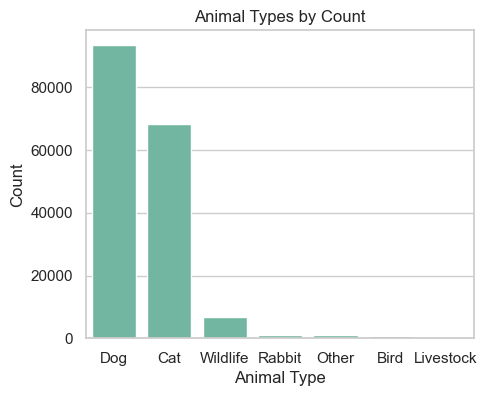

In [92]:
# First I want a plot of value counts for each group

plt.figure(figsize=(5, 4))
plt.title('Animal Types by Count')
plt.ylabel('Count')
plt.xlabel('Animal Type')

sns.countplot(
    data = aac,
    x = 'AnimalType'
)

plt.show()

So by far the majority consists of dogs and cats, which isn't surprising. Wildlife constitutes the next largest category, which makes me glad I separated it from "Other" animals. As for the others, let's see what percentage of the data they actually contribute to.

#### Outliers

In [93]:
# I'm going to make a function to make these prints easier
# Is it overkill? Yes. Hopefully it can be reused later

def category_percent(df, col, value, rounding = 2):
    """
    Calculates how much the given column is comprised of the specified category, in a rounded percentage.

    Params:
        df (pd.DataFrame): The dataframe from which to pull data.
        col (str): A string matching the name of a categorical column within the dataframe.
        value (str): Another string, specifying what category to look for within the column.
        rounding (int): The number of decimal places to round the percentage to.

    Returns:
        Float: A rounded percentage representing how much of the given column is comprised of the given category.
    """
    # Save the length of the dataframe for later calculations
    df_length = df.shape[0]

    # Find the number of matching rows
    matching_rows = len(df.loc[df[col] == value])

    # Calculate the percentage and round the value to the specified number (or 2) 
    percentage = matching_rows / df_length * 100
    rounded = np.round(percentage, rounding)

    # Return call
    return rounded

In [94]:
# Make our print calls for each category other than cats and dogs

# I will use a for loop, to avoid typing out the print call five times

# Our list
species = ['Wildlife', 'Rabbit', 'Other', 'Bird', 'Livestock']

# Our loop
for specie in species:
    print("==========================")
    print(f"|         {specie}:       ")
    print(f"| {len(aac.loc[aac['AnimalType'] == specie])} entries           ")  # How many entries does this specie have?
    print(f"| {category_percent(aac, 'AnimalType', specie, rounding = 4)}% of the dataset")  # What percentage does it constitute?
    print("==========================")

|         Wildlife:       
| 6862 entries           
| 4.0021% of the dataset
|         Rabbit:       
| 1065 entries           
| 0.6211% of the dataset
|         Other:       
| 905 entries           
| 0.5278% of the dataset
|         Bird:       
| 862 entries           
| 0.5027% of the dataset
|         Livestock:       
| 33 entries           
| 0.0192% of the dataset


Here, I am going to take a moment to return to the main point of this project: helping shelters get animals adopted. Wildlife, then, is obviously disqualified. The other three small categories are (I feel) not going to give me enough information to make a truly effective algorithm, and I fear they are going to end up being just noise. So, to avoid spending further hours on categories that will not ultimately be helpful, I will cut them from the dataset for now.

In [95]:
# Eliminate all animal types besides cats and dogs

aac = aac.loc[(aac['AnimalType'] == 'Dog') | (aac['AnimalType'] == 'Cat')]

In [96]:
# Check it worked, by evaluating whether there are still entries for those animal types

for specie in species:
    print("==========================")
    print(f"|         {specie}:       ")
    print(f"| {len(aac.loc[aac['AnimalType'] == specie])} entries           ")  # How many entries does this specie have?
    print(f"| {category_percent(aac, 'AnimalType', specie, rounding = 4)}% of the dataset")  # What percentage does it constitute?
    print("==========================")

|         Wildlife:       
| 0 entries           
| 0.0% of the dataset
|         Rabbit:       
| 0 entries           
| 0.0% of the dataset
|         Other:       
| 0 entries           
| 0.0% of the dataset
|         Bird:       
| 0 entries           
| 0.0% of the dataset
|         Livestock:       
| 0 entries           
| 0.0% of the dataset


It appears to have worked. One more check, just to ease my paranoia...

In [97]:
# What AnimalTypes exist now in the dataset?

print(aac['AnimalType'].unique())

['Dog' 'Cat']


In [98]:
# What is the shape of the remaining dataset?

print(aac.shape)

(161732, 23)


I only lost about 10,000 entries, of 170,000 originals. That isn't too bad really. Now to re-evaluate that graph.

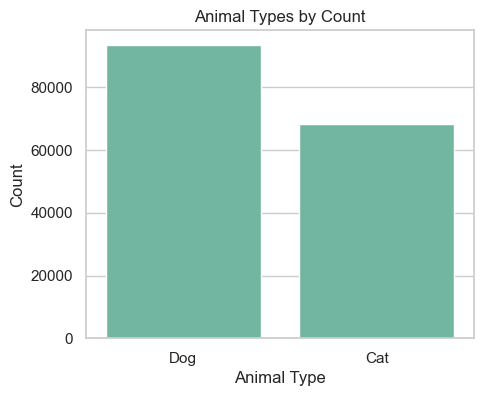

In [99]:
# Create a count plot again

plt.figure(figsize=(5, 4))
plt.title('Animal Types by Count')
plt.ylabel('Count')
plt.xlabel('Animal Type')

sns.countplot(
    data = aac,
    x = 'AnimalType'
)

plt.show()

Values and distribution evaluated, outliers dealt with, and on we go, with a slightly abbreviated dataset!

## Breed: Breed, IsMix

### Breed

#### Value Counts/More Cleaning

##### Dogs

So I happen to remember that there are a lot of breeds here--far too many to plot, right now. To start, let's separate the dogs, who likely have the highest number of breeds.

In [100]:
# Create a dataset copy of only dog entries
dog_aac = aac.loc[aac['AnimalType'] == 'Dog'].copy()

# Isolate those entries
dog_breeds = dog_aac['Breed']

# Print the value counts
print(dog_breeds.value_counts())
print()

# Check that dog dataset
dog_aac.head(3)

Breed
American Pit Bull Terrier       14996
Labrador Retriever              13369
Chihuahua                       10867
German Shepherd                  6932
Australian Cattle Dog            3396
                                ...  
Dutch Sheepdog                      1
Spanish Mastiff                     1
Bouvier des Flandres                1
Grand Basset Griffon Vendeen        1
Tosa                                1
Name: count, Length: 196, dtype: int64



,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
0,A521520,Nina,Dog,Border Terrier,True,White,White,Spayed Female,Female,Spayed Female,...,Adult,Stray,Normal,2013-10-01 07:51:00,0 days 07:48:00,0.000890,2013-10-01 15:39:00,Return to Owner,Positive,False
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,Gray,Intact Female,Female,Intact Female,...,Adult,Stray,Injured,2013-10-01 08:53:00,0 days 06:40:00,0.000761,2013-10-01 15:33:00,Euthanasia,Negative,False
6,A664234,Unnamed,Dog,Border Collie,True,Black/White,Black/White,Intact Male,Male,Intact Male,...,Senior,Stray,Injured,2013-10-01 10:37:00,0 days 08:32:00,0.000973,2013-10-01 19:09:00,Euthanasia,Negative,False


It looks, 1) like that worked, and 2) like there are a whole lot of breeds. 196 is far too many to graph, and arguably too many for a model. So, I will hone in on those which have the most entries and focus on them.

In [101]:
# Extract the top 100 dog breeds
top_100_dog_breeds = dog_aac['Breed'].value_counts().head(100)

# Print
print(top_100_dog_breeds)

Breed
American Pit Bull Terrier        14996
Labrador Retriever               13369
Chihuahua                        10867
German Shepherd                   6932
Australian Cattle Dog             3396
                                 ...  
Brittany                            59
Cavalier King Charles Spaniel       58
Tibetan Spaniel                     56
American Eskimo                     56
Havanese                            55
Name: count, Length: 100, dtype: int64


So all of these have over 50 entries. I wonder how many more breeds have over 50 entries...

In [102]:
# Grab all of those counts
dog_breed_counts = dog_aac['Breed'].value_counts()

# Isolate those with 50 or more entries
common_dog_breeds = dog_breed_counts[dog_breed_counts >= 50]

# Print
print(common_dog_breeds)

Breed
American Pit Bull Terrier    14996
Labrador Retriever           13369
Chihuahua                    10867
German Shepherd               6932
Australian Cattle Dog         3396
                             ...  
American Eskimo                 56
Havanese                        55
English Pointer                 53
Toy Fox Terrier                 52
Italian Greyhound               50
Name: count, Length: 103, dtype: int64


In [103]:
# What about those with over 100 entries?
more_common_dog_breeds = dog_breed_counts[dog_breed_counts >= 100]

# Print
print(more_common_dog_breeds)

Breed
American Pit Bull Terrier    14996
Labrador Retriever           13369
Chihuahua                    10867
German Shepherd               6932
Australian Cattle Dog         3396
                             ...  
Papillon                       108
Standard Poodle                107
Shiba Inu                      106
Saint Bernard                  102
Treeing Walker Coonhound       100
Name: count, Length: 82, dtype: int64


In [104]:
# Which ones would we miss if we only did breeds with over 100 entries?

excluded_dog_breeds = dog_breed_counts[(dog_breed_counts >= 50) & (dog_breed_counts < 100)]

# Print
print(excluded_dog_breeds)

Breed
American Foxhound                97
Norwich Terrier                  92
Alaskan Malamute                 90
Smooth Fox Terrier               88
Shetland Sheepdog                87
Petit Basset Griffon Vendeen     85
Greyhound                        85
English Coonhound                84
Brussels Griffon                 83
Pharaoh Hound                    71
Bloodhound                       70
Scottish Terrier                 60
Cane Corso                       59
Brittany                         59
Cavalier King Charles Spaniel    58
Tibetan Spaniel                  56
American Eskimo                  56
Havanese                         55
English Pointer                  53
Toy Fox Terrier                  52
Italian Greyhound                50
Name: count, dtype: int64


There are some interesting breeds (in my opinion) that would be left behind by only taking breeds with 100 or more entries, including the Greyhound, Bloodhound, Cane Corso, and Cavalier King Charles Spaniel; however, when working with a dataset of 170,000 rows and many categories, I'm not sure I can justify keeping breeds (particularly dog breeds) with under 100 entries. I will evaluate the cats before making this decision.

In [105]:
# Before I move on, how many rows actually correspond to dogs?

print(f"{len(dog_breeds)} rows correspond to dogs, out of {len(aac)} total rows.")
print(f"There are {len(aac) - len(dog_breeds)} rows of cats.")

93497 rows correspond to dogs, out of 161732 total rows.
There are 68235 rows of cats.


##### Cats

In [106]:
# Get some variables going

# Cat dataset
cat_aac = aac.loc[aac['AnimalType'] == 'Cat'].copy()

# Isolate cat breed rows
cat_breeds = cat_aac['Breed']

# Isolate cat breed counts
cat_breed_counts = cat_breeds.value_counts()

# Check cat_aac
cat_aac.head(3)

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:06:00,0.000240,2013-10-01 10:39:00,Transfer,Other,False
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False


In [107]:
# What do we have going on, on the cat side?

print(cat_breed_counts)

Breed
Domestic Shorthair         56902
Domestic Medium Hair        5401
Domestic Longhair           2458
Siamese                     2027
Snowshoe                     284
American Shorthair           282
Maine Coon                   162
Manx                         144
Russian Blue                 137
Ragdoll                       75
Himalayan                     63
Persian                       43
Bengal                        31
Abyssinian                    28
Turkish Angora                21
Balinese                      20
American Curl Shorthair       17
British Shorthair             15
Tonkinese                     13
Devon Rex                     11
Japanese Bobtail              11
Bombay                        10
Burmese                        9
Cymric                         8
Cornish Rex                    6
Havana Brown                   6
Turkish Van                    5
Scottish Fold                  5
Oriental Shorthair             5
Munchkin Shorthair             5
Pixi

It looks like about half of the cat breeds have over 10 entries, with the very large majority of cats belonging to just a few breeds. 10 entries is still very small of a sample size, though, so let's look at which breeds seem to be most significant, based both on my judgement and the numbers.

In [108]:
# How many breeds is that total?

print(len(cat_breed_counts))

42


In [109]:
# Cut out those with fewer than 10 entries, to start--very conservative for now

over_10_cat_breeds = cat_breed_counts.loc[cat_breed_counts >= 10]

print(over_10_cat_breeds)
print()
print(f"There are {len(over_10_cat_breeds)} cat breeds remaining.")

Breed
Domestic Shorthair         56902
Domestic Medium Hair        5401
Domestic Longhair           2458
Siamese                     2027
Snowshoe                     284
American Shorthair           282
Maine Coon                   162
Manx                         144
Russian Blue                 137
Ragdoll                       75
Himalayan                     63
Persian                       43
Bengal                        31
Abyssinian                    28
Turkish Angora                21
Balinese                      20
American Curl Shorthair       17
British Shorthair             15
Tonkinese                     13
Devon Rex                     11
Japanese Bobtail              11
Bombay                        10
Name: count, dtype: int64

There are 22 cat breeds remaining.


Tentatively, from looking at this list, I would be inclined to ignore breeds with under 75 entries. That leaves only a few cat breeds, of course, but since they are spread out far less than dog breeds and further make up a lesser portion of the dataset, I am less worried about it. Cat breeds are often even more approximated than dog breeds, as well.

##### Replacements

Now that we have basic thresholds for our breed IDs, I will change breeds with fewer entries to "Other". This will require a custom function, based on the one we made previously for color mapping.

In [110]:
# I'm going to create a function which takes a numerical threshold 
# and converts breeds outside of that threshold to "Other"

def alter_entries (df, column, threshold_dict, new_value):
    """
    Cycles through animal types using a dictionary of thresholds assigned to each,
    and converts values in the column to "Other" if they do not meet that threshold.

    Params: 
        df (pd.DataFrame): pandas DataFrame to reference and create a new column in.
        column (str): string indicating which column to apply function to.
        threshold_dict (dict): dictionary in the format {animal_type : threshold_number}.
        new_value (str): string to which values not meeting the threshold should be converted ("Other", "Unknown", etc).

    Returns:
        pd.DataFrame: the modified DataFrame, with the specified column altered.
    """
    df = df.copy()  # To avoid modifying the original DataFrame

    total_replacements = 0  # Keep track of replacements, for debugging and tracking

    for animal_type, threshold in threshold_dict.items():

        print(f"\nAnimal Type: {animal_type} | Threshold: {threshold}")  # Keeping track of where we are

        mask = df['AnimalType'] == animal_type  # Isolate the animal_type
        counts = df.loc[mask, column].value_counts()  # Find value_counts for the category, per animal_type
        valid_values = set(counts[counts >= threshold].index)  # Set which values meet or exceed the threshold to keep

        # Monitoring feedback
        excluded_counts = counts[counts < threshold]
        for value, count in excluded_counts.items():
            print(f"  '{value}' found {count} times — replaced with 'Other'")

        # Setting replacements
        
        replacements = ~df.loc[mask, column].isin(valid_values)  # Set aside values under the threshold

        # Keeping track of replacements for monitoring/debugging

        col_replacements = replacements.sum()  # Keep track of replacements per column
        total_replacements += col_replacements  # Keep track of total replacements, for end feedback

        df.loc[mask & replacements, column] = new_value  # Convert values to the specified new value

        # Debugging/monitoring feedback

        print(f"Total replacements for {animal_type}: {col_replacements}")
        n_vals = df.loc[df['AnimalType'] == animal_type, column].nunique()
        print(f"Values remaining for {animal_type}: {n_vals}")
        print("==========================================")

    print(f"\nTotal replacements across all types: {total_replacements}")
    return df

There, that should work for us now!

In [111]:
# Let's create a threshold dictionary: how many values should a breed have, per animal type?

breed_thresholds = {
    'Dog' : 75,  # This is where I have settled, after some thought
    'Cat' : 75
}

In [112]:
alter_entries(aac, 'Breed', breed_thresholds, 'Other')


Animal Type: Dog | Threshold: 75
  'Pharaoh Hound' found 71 times — replaced with 'Other'
  'Bloodhound' found 70 times — replaced with 'Other'
  'Scottish Terrier' found 60 times — replaced with 'Other'
  'Cane Corso' found 59 times — replaced with 'Other'
  'Brittany' found 59 times — replaced with 'Other'
  'Cavalier King Charles Spaniel' found 58 times — replaced with 'Other'
  'Tibetan Spaniel' found 56 times — replaced with 'Other'
  'American Eskimo' found 56 times — replaced with 'Other'
  'Havanese' found 55 times — replaced with 'Other'
  'English Pointer' found 53 times — replaced with 'Other'
  'Toy Fox Terrier' found 52 times — replaced with 'Other'
  'Italian Greyhound' found 50 times — replaced with 'Other'
  'Bernese Mountain Dog' found 49 times — replaced with 'Other'
  'Finnish Spitz' found 49 times — replaced with 'Other'
  'Airedale Terrier' found 47 times — replaced with 'Other'
  'Dogo Argentino' found 47 times — replaced with 'Other'
  'Bluetick Coonhound' found

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
0,A521520,Nina,Dog,Border Terrier,True,White,White,Spayed Female,Female,Spayed Female,...,Adult,Stray,Normal,2013-10-01 07:51:00,0 days 07:48:00,0.000890,2013-10-01 15:39:00,Return to Owner,Positive,False
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:06:00,0.000240,2013-10-01 10:39:00,Transfer,Other,False
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,Gray,Intact Female,Female,Intact Female,...,Adult,Stray,Injured,2013-10-01 08:53:00,0 days 06:40:00,0.000761,2013-10-01 15:33:00,Euthanasia,Negative,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171450,A928083,Unnamed,Dog,Great Pyrenees,True,White,White,Intact Female,Female,Intact Female,...,Infant,Owner Surrender,Sick,2025-04-07 14:18:00,0 days 02:27:00,0.000279,2025-04-07 16:45:00,Transfer,Other,False
171451,A928084,Unnamed,Dog,Great Pyrenees,True,White,White,Intact Female,Female,Intact Female,...,Infant,Owner Surrender,Sick,2025-04-07 14:18:00,0 days 02:27:00,0.000279,2025-04-07 16:45:00,Transfer,Other,False
171452,A928099,Zoey,Dog,Labrador Retriever,True,Blue,Gray,Spayed Female,Female,Spayed Female,...,Senior,Stray,Normal,2025-04-07 19:20:00,0 days 18:31:00,0.002112,2025-04-08 13:51:00,Return to Owner,Positive,False
171453,A928104,Bella,Dog,Anatolian Shepherd,True,Tan,Tan,Intact Female,Female,Intact Female,...,Young,Stray,Injured,2025-04-08 09:09:00,0 days 03:34:00,0.000407,2025-04-08 12:43:00,Return to Owner,Positive,False


#### Graphing

Now for the sake of graphing, we can't use the full breeds list. Let's cut it down for now to 15 breeds each.

##### Dogs

In [113]:
top_15_dog_breeds = dog_aac['Breed'].value_counts().index[0:15]
print(top_15_dog_breeds)

Index(['American Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua',
       'German Shepherd', 'Australian Cattle Dog', 'Dachshund',
       'Siberian Husky', 'Boxer', 'Border Collie', 'Great Pyrenees',
       'Miniature Poodle', 'Australian Shepherd', 'Catahoula Leopard Dog',
       'Beagle', 'German Shorthaired Pointer'],
      dtype='object', name='Breed')


In [114]:
# Grab those rows from the greater dataframe

top_15_dogs = aac.loc[aac['Breed'].isin(top_15_dog_breeds)]
top_15_dogs.head()

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,Gray,Intact Female,Female,Intact Female,...,Adult,Stray,Injured,2013-10-01 08:53:00,0 days 06:40:00,0.000761,2013-10-01 15:33:00,Euthanasia,Negative,False
6,A664234,Unnamed,Dog,Border Collie,True,Black/White,Black/White,Intact Male,Male,Intact Male,...,Senior,Stray,Injured,2013-10-01 10:37:00,0 days 08:32:00,0.000973,2013-10-01 19:09:00,Euthanasia,Negative,False
9,A664266,Unnamed,Dog,Chihuahua,True,Buff,Tan,Intact Female,Female,Intact Female,...,Young,Stray,Normal,2013-10-01 11:09:00,4 days 03:57:00,0.011402,2013-10-05 15:06:00,Transfer,Other,False
14,A651630,Heather,Dog,Labrador Retriever,True,Tan,Tan,Spayed Female,Female,Spayed Female,...,Adult,Owner Surrender,Injured,2013-10-01 11:23:00,91 days 03:50:00,0.249582,2013-12-31 15:13:00,Adoption,Positive,False
15,A664259,Petunia,Dog,American Pit Bull Terrier,True,Black,Black,Intact Female,Female,Intact Female,...,Adult,Stray,Normal,2013-10-01 11:25:00,16 days 22:11:00,0.046336,2013-10-18 09:36:00,Euthanasia,Negative,False


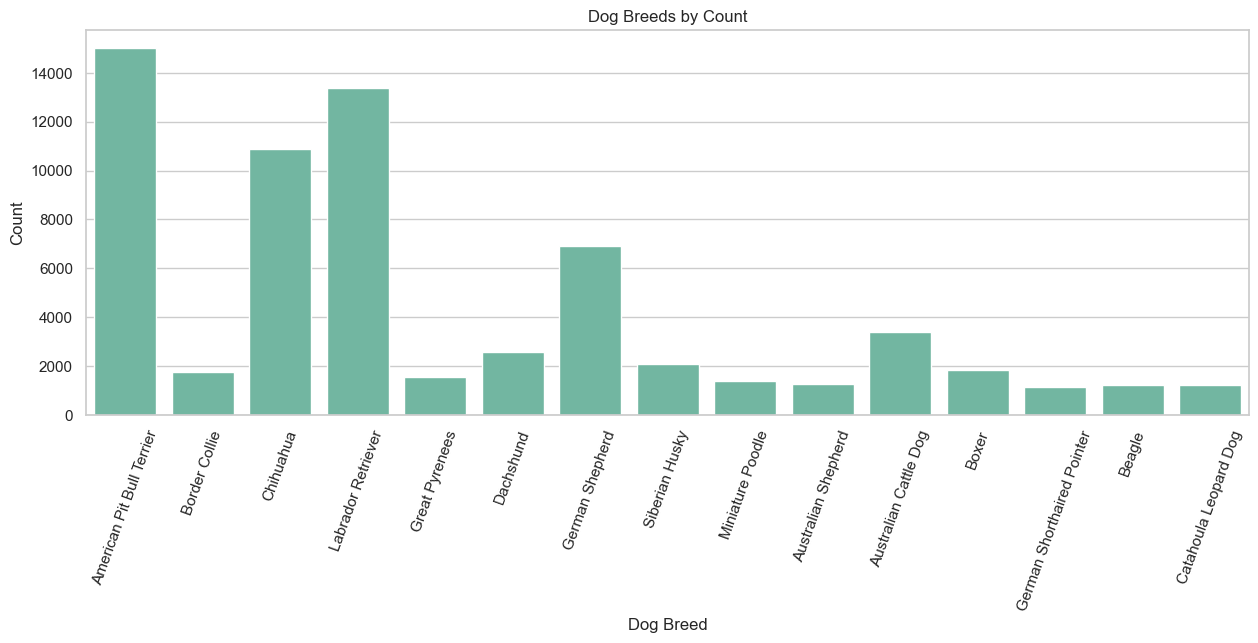

In [115]:
# Now to graph those

# Create a count plot again

plt.figure(figsize=(15, 5))
plt.title('Dog Breeds by Count')
plt.ylabel('Count')
plt.xlabel('Dog Breed')
plt.xticks(rotation=70)

sns.countplot(
    data = top_15_dogs,
    x = 'Breed'
)

plt.show()

What I see in that graph is that there is a big discrepancy between the top 4 or so breeds and the rest. The breeds that appear most often occur overwhelmingly most often. I suspect these are the "go-to" breeds when shelter employees are uncertain what a dog may actually be.

##### Cats

Onto cats--the top 15 variables are actually not needed, since there are fewer than 15 cat breeds anyway.

In [116]:
# List of cat breeds

print(cat_aac['Breed'].value_counts().index)

Index(['Domestic Shorthair', 'Domestic Medium Hair', 'Domestic Longhair',
       'Siamese', 'Snowshoe', 'American Shorthair', 'Maine Coon', 'Manx',
       'Russian Blue', 'Ragdoll', 'Himalayan', 'Persian', 'Bengal',
       'Abyssinian', 'Turkish Angora', 'Balinese', 'American Curl Shorthair',
       'British Shorthair', 'Tonkinese', 'Devon Rex', 'Japanese Bobtail',
       'Bombay', 'Burmese', 'Cymric', 'Cornish Rex', 'Havana Brown',
       'Turkish Van', 'Scottish Fold', 'Oriental Shorthair',
       'Munchkin Shorthair', 'Pixiebob Shorthair', 'Norwegian Forest Cat',
       'Sphynx', 'Exotic Shorthair', 'Colorpoint Shorthair', 'Chartreux',
       'Javanese', 'Munchkin Longhair', 'Birman', 'American Wirehair',
       'Ocicat', 'Savannah'],
      dtype='object', name='Breed')


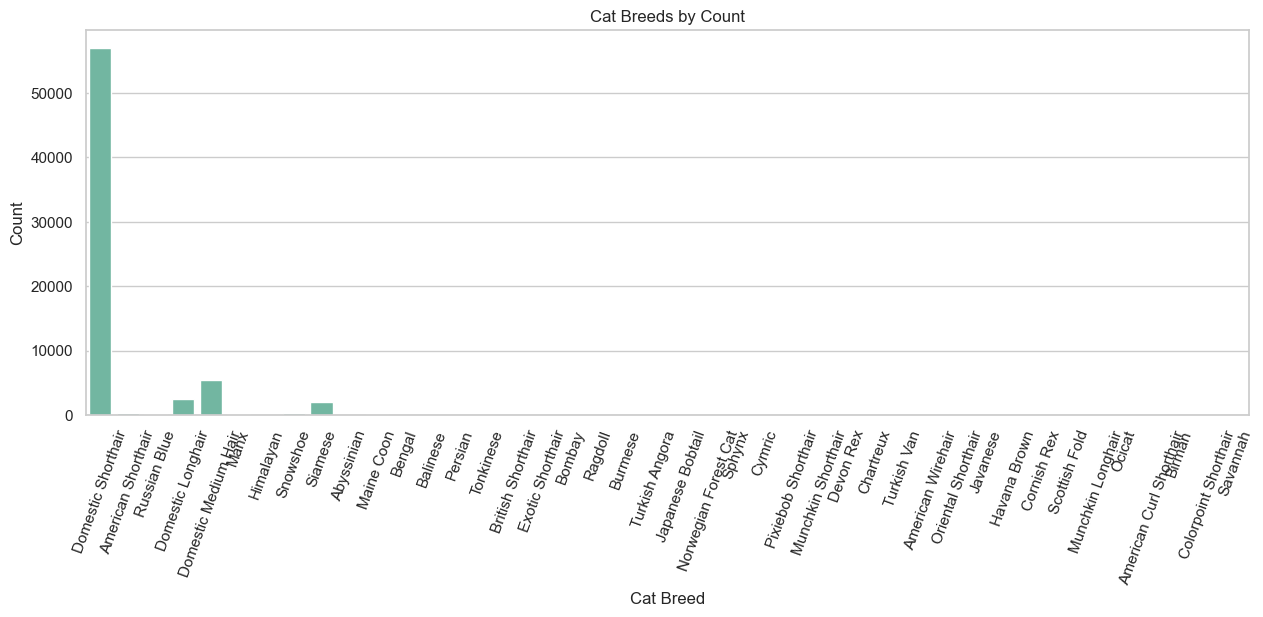

In [117]:
# Last countplot for this category

plt.figure(figsize=(15, 5))
plt.title('Cat Breeds by Count')
plt.ylabel('Count')
plt.xlabel('Cat Breed')
plt.xticks(rotation=70)

sns.countplot(
    data = cat_aac,
    x = 'Breed'
)

plt.show()

That graph is more telling. Compared to other breeds, almost all documented cats are Domestic Shorthairs. This is certainly something to keep in mind for our modeling later.

### IsMix

There is not too much to evaluate here; it is a very simple Boolean column. I will make a graph, nevertheless. How many animals are mixed-breed?

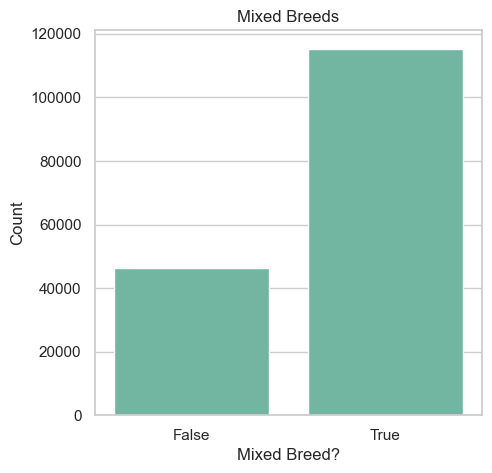

In [118]:
# Create a count plot again

plt.figure(figsize=(5, 5))
plt.title('Mixed Breeds')
plt.ylabel('Count')
plt.xlabel('Mixed Breed?')

sns.countplot(
    data = aac,
    x = 'IsMix'
)

plt.show()

Looks like a significant majority are mixed breeds, which is unsurprising to me.

## Color: Color, ColorGroup

### Color

#### Value Counts/Outliers

I know there are a lot of colors in Color, so this will also have to be cut down. Thankfully, we can recycle our functions from "Breed"!

In [119]:
# First, what are we looking at on colors? 
# Cats and dogs have significant differences, so I will start with dogs

dog_colors = aac.loc[aac['AnimalType'] == 'Dog', 'Color'].value_counts()
print(dog_colors)

Color
Black/White       14445
White             13528
Black             13337
Brown             12920
Tan               11121
Brown Brindle      4448
Tricolor           3882
Blue               3746
Red                3728
Chocolate          2199
Cream              1395
Fawn               1240
Sable              1187
Gray               1092
Yellow              956
Buff                884
Blue Merle          709
Black Brindle       564
Gold                381
Brown Merle         361
Blue Tick           347
Red Tick            228
Silver              161
Red Merle           160
Yellow Brindle      126
Apricot             112
Blue Tiger           61
Liver                47
Brown Tiger          37
Black Smoke          31
Liver Tick           18
Blue Cream           17
Orange               11
Blue Smoke            5
Black Tiger           5
Agouti                4
Calico                2
Ruddy                 1
Unknown               1
Name: count, dtype: int64


My judgement call here is eliminating any colors with under 100 entries; lower than that, they start getting particularly specific.

In [120]:
# And what about cats?

cat_colors = aac.loc[aac['AnimalType'] == 'Cat', 'Color'].value_counts()
print(cat_colors)

Color
Brown Tabby            16113
Black                   9011
Orange Tabby            7613
Black/White             7294
Blue                    4315
Blue Tabby              4069
Tortoiseshell           3362
Calico                  3227
White                   2824
Torbie                  2588
Cream Tabby             1855
Lynx Point              1024
Gray Tabby               731
Seal Point               694
Flame Point              452
Orange                   439
Gray                     401
Black Tabby              382
Black Smoke              280
Lilac Point              208
Tortoiseshell Point      199
Silver Tabby             186
Cream                    181
Blue Point               133
Brown                    119
Chocolate Point          112
Blue Cream                99
Calico Point              79
Chocolate                 39
Buff                      39
Silver Lynx Point         35
Agouti                    28
Blue Smoke                23
Silver                    21
Tan     

Really, the same threshold seems to fit the cat entries as well.

In [121]:
# Create threshold dictionary for our custom function

color_thresholds = {
    'Dog' : 100,
    'Cat' : 100
}

In [122]:
# Use the function from earlier 

alter_entries(aac, 'Color', color_thresholds, 'Other')


Animal Type: Dog | Threshold: 100
  'Blue Tiger' found 61 times — replaced with 'Other'
  'Liver' found 47 times — replaced with 'Other'
  'Brown Tiger' found 37 times — replaced with 'Other'
  'Black Smoke' found 31 times — replaced with 'Other'
  'Liver Tick' found 18 times — replaced with 'Other'
  'Blue Cream' found 17 times — replaced with 'Other'
  'Orange' found 11 times — replaced with 'Other'
  'Blue Smoke' found 5 times — replaced with 'Other'
  'Black Tiger' found 5 times — replaced with 'Other'
  'Agouti' found 4 times — replaced with 'Other'
  'Calico' found 2 times — replaced with 'Other'
  'Ruddy' found 1 times — replaced with 'Other'
  'Unknown' found 1 times — replaced with 'Other'
Total replacements for Dog: 240
Values remaining for Dog: 27

Animal Type: Cat | Threshold: 100
  'Blue Cream' found 99 times — replaced with 'Other'
  'Calico Point' found 79 times — replaced with 'Other'
  'Chocolate' found 39 times — replaced with 'Other'
  'Buff' found 39 times — replac

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
0,A521520,Nina,Dog,Border Terrier,True,White,White,Spayed Female,Female,Spayed Female,...,Adult,Stray,Normal,2013-10-01 07:51:00,0 days 07:48:00,0.000890,2013-10-01 15:39:00,Return to Owner,Positive,False
1,A664235,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:06:00,0.000240,2013-10-01 10:39:00,Transfer,Other,False
2,A664236,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False
3,A664237,Unnamed,Cat,Domestic Shorthair,True,Orange,Orange,Unknown,NaN,Unknown,...,Infant,Stray,Normal,2013-10-01 08:33:00,0 days 02:11:00,0.000249,2013-10-01 10:44:00,Transfer,Other,False
4,A664233,Stevie,Dog,American Pit Bull Terrier,True,Blue,Gray,Intact Female,Female,Intact Female,...,Adult,Stray,Injured,2013-10-01 08:53:00,0 days 06:40:00,0.000761,2013-10-01 15:33:00,Euthanasia,Negative,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171450,A928083,Unnamed,Dog,Great Pyrenees,True,White,White,Intact Female,Female,Intact Female,...,Infant,Owner Surrender,Sick,2025-04-07 14:18:00,0 days 02:27:00,0.000279,2025-04-07 16:45:00,Transfer,Other,False
171451,A928084,Unnamed,Dog,Great Pyrenees,True,White,White,Intact Female,Female,Intact Female,...,Infant,Owner Surrender,Sick,2025-04-07 14:18:00,0 days 02:27:00,0.000279,2025-04-07 16:45:00,Transfer,Other,False
171452,A928099,Zoey,Dog,Labrador Retriever,True,Blue,Gray,Spayed Female,Female,Spayed Female,...,Senior,Stray,Normal,2025-04-07 19:20:00,0 days 18:31:00,0.002112,2025-04-08 13:51:00,Return to Owner,Positive,False
171453,A928104,Bella,Dog,Anatolian Shepherd,True,Tan,Tan,Intact Female,Female,Intact Female,...,Young,Stray,Injured,2025-04-08 09:09:00,0 days 03:34:00,0.000407,2025-04-08 12:43:00,Return to Owner,Positive,False


27 colors each is much better.

In [123]:
# My paranoia-seeded test that it worked

print(aac.loc[aac['AnimalType'] == 'Dog', 'Color'].value_counts())

Color
Black/White       14445
White             13528
Black             13337
Brown             12920
Tan               11121
Brown Brindle      4448
Tricolor           3882
Blue               3746
Red                3728
Chocolate          2199
Cream              1395
Fawn               1240
Sable              1187
Gray               1092
Yellow              956
Buff                884
Blue Merle          709
Black Brindle       564
Gold                381
Brown Merle         361
Blue Tick           347
Red Tick            228
Silver              161
Red Merle           160
Yellow Brindle      126
Apricot             112
Blue Tiger           61
Liver                47
Brown Tiger          37
Black Smoke          31
Liver Tick           18
Blue Cream           17
Orange               11
Blue Smoke            5
Black Tiger           5
Agouti                4
Calico                2
Ruddy                 1
Unknown               1
Name: count, dtype: int64


This is still over 50 colors, which isn't ideal, but it is certainly better than before.

#### Graphing

I'll use my dog- and cat-specific datasets from earlier to graph these.

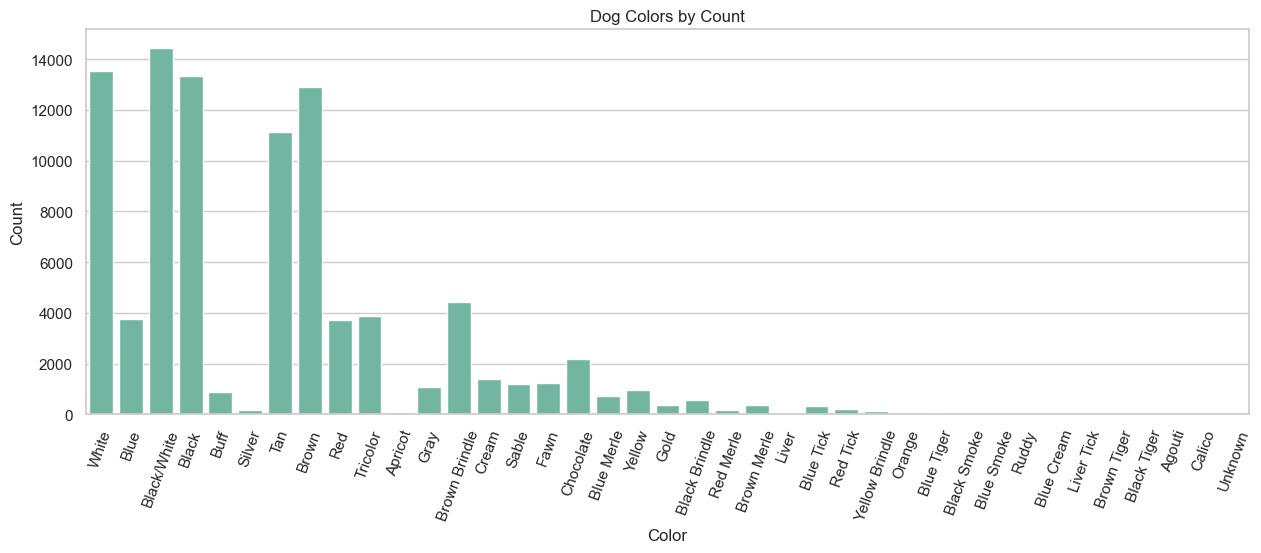

In [124]:
# First the dogs

plt.figure(figsize=(15, 5))
plt.title('Dog Colors by Count')
plt.ylabel('Count')
plt.xlabel('Color')
plt.xticks(rotation=70)

sns.countplot(
    data = dog_aac,
    x = 'Color'
)

plt.show()

As with the breeds, the top 5 or so colors dominate the distribution, with all others very firmly behind.

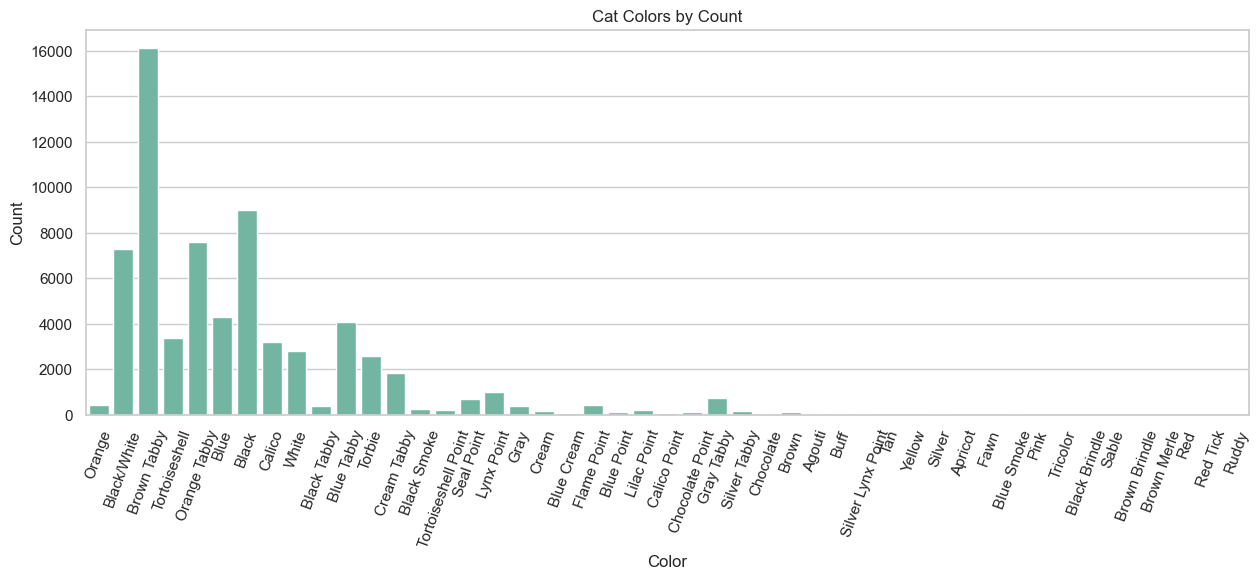

In [125]:
# And now for the cats

plt.figure(figsize=(15, 5))
plt.title('Cat Colors by Count')
plt.ylabel('Count')
plt.xlabel('Color')
plt.xticks(rotation=70)

sns.countplot(
    data = cat_aac,
    x = 'Color'
)

plt.show()

The cat colors are more spead out than the dogs, but still have many with quite few entries.

### ColorGroup

#### Value Counts/Outliers

In [126]:
# Starting the same way as usual; separate cats and dogs and evaluate value_counts

print(dog_aac['ColorGroup'].value_counts())

ColorGroup
Brown             15167
White             14923
Tan               14709
Black/White       14445
Black             13368
Brindle/Ticked     5834
Gray               5021
Tricolor           3884
Red                3728
Merle              1230
Sable              1187
Unknown               1
Name: count, dtype: int64


Already this is a much more succinct list, which I am drawn to. Despite losing some of the accuracy of the Color column, it narrows colors into far fewer categories. I will drop that "Unknown" entry, though, to avoid confusing an algorithm.

In [127]:
aac = aac.loc[~(aac['ColorGroup'] == 'Unknown')]

# Update our dog value counts to check it worked

print(dog_aac['ColorGroup'].value_counts())

ColorGroup
Brown             15167
White             14923
Tan               14709
Black/White       14445
Black             13368
Brindle/Ticked     5834
Gray               5021
Tricolor           3884
Red                3728
Merle              1230
Sable              1187
Unknown               1
Name: count, dtype: int64


In [128]:
# Onto the cats

print(cat_aac['ColorGroup'].value_counts())

ColorGroup
Brown Tabby      16115
Black             9011
Orange Tabby      7614
Black/White       7294
Gray Tabby        4986
Gray              4737
Tortoiseshell     3362
Calico            3237
White             3007
Point             2936
Torbie            2588
White Tabby       1855
Orange             453
Black Tabby        384
Smokey             303
Brown              160
Mottled            102
Tan                 91
Name: count, dtype: int64


I was surprised that cats had so many more categories, but since tabbies are separate from other colors, it does make sense. There is only one category with under 100 entries, so I am going to leave it alone for now.

#### Graphing

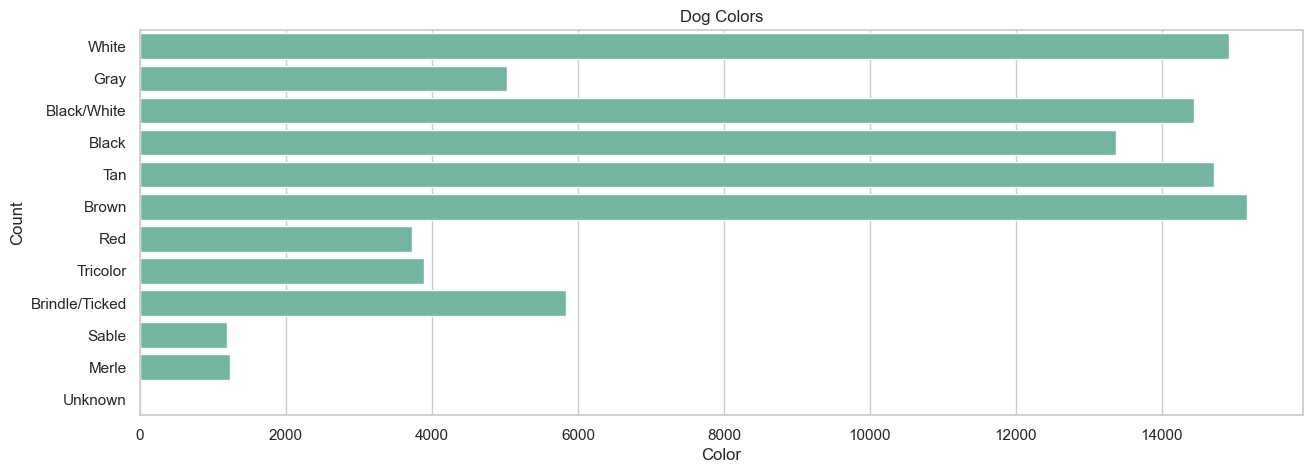

In [129]:
# With our variables from earlier, I will graph dogs first

plt.figure(figsize=(15, 5))
plt.title('Dog Colors')
plt.ylabel('Count')
plt.xlabel('Color')

sns.countplot(
    data = dog_aac,
    y = 'ColorGroup'
)

plt.show()

Once again, 5 colors dominate; there are few enough, though, and they all have enough entries that I think this is fine. Onto cats...

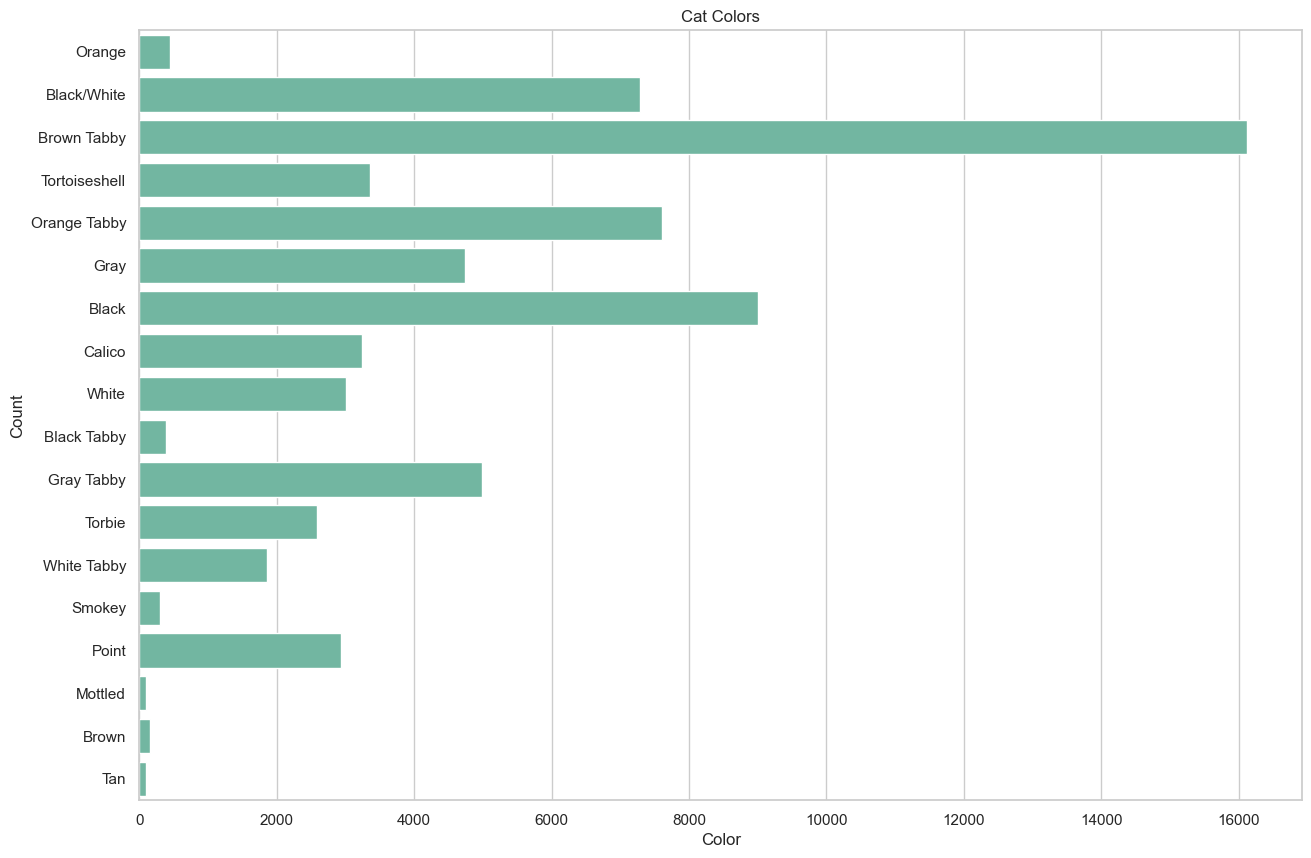

In [130]:
# Same plot, essentially

plt.figure(figsize=(15, 10))
plt.title('Cat Colors')
plt.ylabel('Count')
plt.xlabel('Color')

sns.countplot(
    data = cat_aac,
    y = 'ColorGroup',
)

plt.show()

The cat colors seem more spread out, but also have more tiny groups that may be removed later on.

## Sex: IntakeSex, OutcomeSex, Sex, ShelterFixed

### IntakeSex

#### Value Counts/Outliers

In [131]:
# For this, I know what the categories are; however, let's check them out again

print(aac['IntakeSex'].value_counts())

IntakeSex
Intact Male      57150
Intact Female    55105
Neutered Male    23888
Spayed Female    20048
Unknown           5540
Name: count, dtype: int64


The 5500 unknown do bother me somewhat, especially having already eliminated wildlife and other species of animals (which are where I would expect most of these unknowns to be). My suspicion would be very young animals.

In [132]:
# How many of these are cats versus dogs?

print(aac['AnimalType'].loc[aac['IntakeSex'] == 'Unknown'].value_counts())

AnimalType
Cat    4843
Dog     697
Name: count, dtype: int64


This does actually make sense to me; cats can be harder to sex than dogs.

In [133]:
# How many of those dogs are very young?

print(dog_aac['AgeCategory'].loc[(dog_aac['IntakeSex'] == 'Unknown')].value_counts())

AgeCategory
Infant     553
Young       90
Adult       29
Senior      25
Unknown      1
Name: count, dtype: int64


I don't know why there are 100-some reasonably-aged animals without listed sexes, but the 550 infant-aged dogs does make sense to me. Cats, I imagine, are all over the place. But for now, there isn't much to be done about unknown sexes.

#### Graphing

First, I'll do a shelter-wide plot.

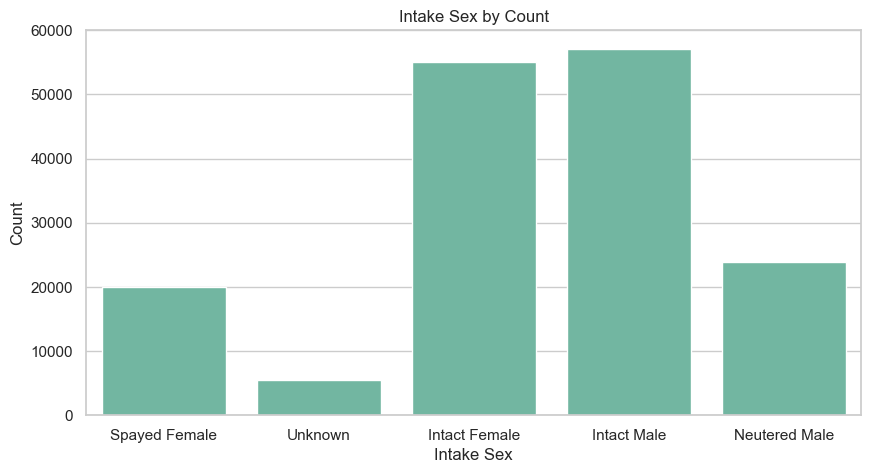

In [134]:
plt.figure(figsize=(10, 5))
plt.title('Intake Sex by Count')
plt.ylabel('Count')
plt.xlabel('Intake Sex')

sns.countplot(
    data = aac,
    x = 'IntakeSex'
)

plt.show()

I would actually like to see "Spayed Female" and "Intact Female" grouped, as well as "Intact Male" and "Neutered Male", for comparison later with OutcomeSex. "Fixing" animals is an important function of shelters, and I think a good thing to highlight. I do find it interesting that so many intaken animals are intact.

In [135]:
# For this, I will create a "sex" dataframe with the relevant columns.

# Create the new dataframe

aacSex = aac[['IntakeSex', 'OutcomeSex', 'Sex', 'ShelterFixed']].copy()

In [136]:
# Make a column representing whether an animal was fixed on intake

sex_map = {  # For a mapping function
    'Neutered Male': 'Fixed',
    'Spayed Female': 'Fixed',
    'Intact Male': 'Intact',
    'Intact Female': 'Intact',
    'Unknown': 'Unknown'  # Keeping *for now*
}

aacSex['IntakeFixed'] = aacSex['IntakeSex'].map(sex_map)

# Check it

print(aacSex['IntakeFixed'].value_counts())
    
aacSex.sample(10)

IntakeFixed
Intact     112255
Fixed       43936
Unknown      5540
Name: count, dtype: int64


,IntakeSex,OutcomeSex,Sex,ShelterFixed,IntakeFixed
111008,Intact Male,Intact Male,Male,False,Intact
131839,Intact Female,Intact Female,Female,False,Intact
49614,Intact Male,Neutered Male,Male,True,Intact
73551,Intact Female,Spayed Female,Female,True,Intact
91309,Intact Male,Intact Male,Male,False,Intact
36997,Intact Female,Spayed Female,Female,True,Intact
100208,Intact Female,Intact Female,Female,False,Intact
82375,Intact Male,Neutered Male,Male,True,Intact
86456,Neutered Male,Neutered Male,Male,False,Fixed
58651,Spayed Female,Spayed Female,Female,False,Fixed


In [137]:
# I must also extract the base sex from these for grouping within the graph

aacSex['IntakeSexSimple'] = aacSex['IntakeSex'].str.extract(r'(Male|Female)', expand=False)

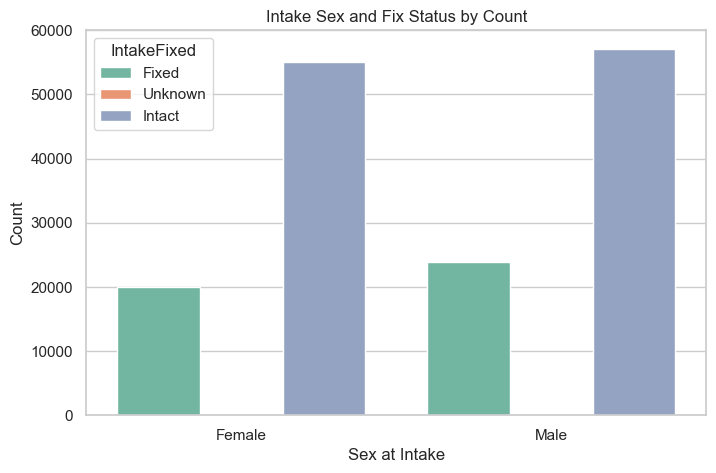

In [138]:
# Now we graph again

plt.figure(figsize=(8, 5))
plt.title('Intake Sex and Fix Status by Count')
plt.ylabel('Count')
plt.xlabel('Sex at Intake')

sns.countplot(
    data = aacSex,
    x = 'IntakeSexSimple',
    hue = 'IntakeFixed'
)

plt.show()

### OutcomeSex

#### Value Counts/Outliers

I expect fewer unknowns in this column, but let's see.

In [139]:
print(aac['OutcomeSex'].value_counts())

OutcomeSex
Neutered Male    60013
Spayed Female    54411
Intact Male      21024
Intact Female    20742
Unknown           5541
Name: count, dtype: int64


Surprisingly (to me), there are roughly the same number of unknowns. Judging by what we saw before, and by how many entries this dataset has, I am not too worried about these.

#### Graphing

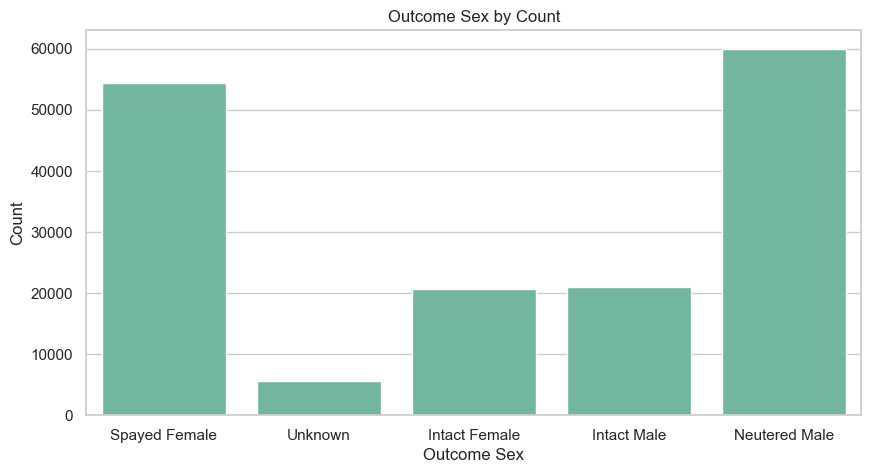

In [140]:
# Same graph as before, shelter-wide outcomes

plt.figure(figsize=(10, 5))
plt.title('Outcome Sex by Count')
plt.ylabel('Count')
plt.xlabel('Outcome Sex')

sns.countplot(
    data = aac,
    x = 'OutcomeSex'
)

plt.show()

Now, to highlight fixed versus intact animals. There are already tons more fixed entries in outcomes than there were at intake.

In [141]:
# Make another column in our offset dataframe representing whether an animal was fixed at outcome

sex_map = {  # For a mapping function
    'Neutered Male': 'Fixed',
    'Spayed Female': 'Fixed',
    'Intact Male': 'Intact',
    'Intact Female': 'Intact',
    'Unknown': 'Unknown'
}

aacSex['OutcomeFixed'] = aacSex['OutcomeSex'].map(sex_map)

# Check it

print(aacSex['OutcomeFixed'].value_counts())
    
aacSex.head(10)

OutcomeFixed
Fixed      114424
Intact      41766
Unknown      5541
Name: count, dtype: int64


,IntakeSex,OutcomeSex,Sex,ShelterFixed,IntakeFixed,IntakeSexSimple,OutcomeFixed
0,Spayed Female,Spayed Female,Female,False,Fixed,Female,Fixed
1,Unknown,Unknown,NaN,False,Unknown,NaN,Unknown
2,Unknown,Unknown,NaN,False,Unknown,NaN,Unknown
3,Unknown,Unknown,NaN,False,Unknown,NaN,Unknown
4,Intact Female,Intact Female,Female,False,Intact,Female,Intact
5,Unknown,Unknown,NaN,False,Unknown,NaN,Unknown
6,Intact Male,Intact Male,Male,False,Intact,Male,Intact
7,Neutered Male,Neutered Male,Male,False,Fixed,Male,Fixed
8,Intact Female,Spayed Female,Female,True,Intact,Female,Fixed
9,Intact Female,Intact Female,Female,False,Intact,Female,Intact


In [142]:
# Separate base sex for graphical grouping

aacSex['OutcomeSexSimple'] = aacSex['OutcomeSex'].str.extract(r'(Male|Female)', expand=False)

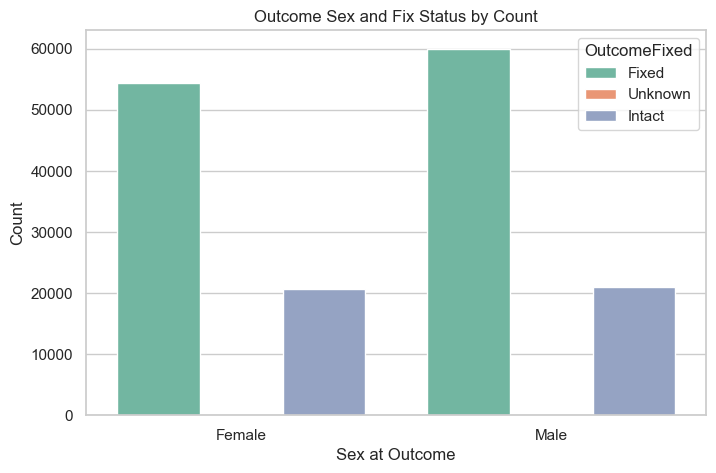

In [143]:
# And then the comparison graph

plt.figure(figsize=(8, 5))
plt.title('Outcome Sex and Fix Status by Count')
plt.ylabel('Count')
plt.xlabel('Sex at Outcome')

sns.countplot(
    data = aacSex,
    x = 'OutcomeSexSimple',
    hue = 'OutcomeFixed'
)

plt.show()

Those graphs seem to reflect that the shelter is doing a good job fixing animals which pass through. There are still many intact animals, but this graph ignores negative outcomes which may have occurred before the animal underwent surgery. I will look into that later, but for now leave this here.

### ShelterFixed

#### Value Counts/Outliers

This is a boolean column, so I already know what the values are. But let's check out the counts--how many animals were spayed or neutered in-shelter?

In [144]:
print(aac['ShelterFixed'].value_counts())

ShelterFixed
False    91239
True     70492
Name: count, dtype: int64


Actually, that is far fewer "True"s than I expected. But as far as this column goes, there is not too much to evaluate (at least, not on its own). It will be more important later, but for now I will leave it be.

## BirthDate

This one will be a bit different. Value_counts will be untenable, so I will skip straight to graphing.

In [145]:
# So I don't mess with the main dataset

aacBirth = aac[['BirthDate']].copy()

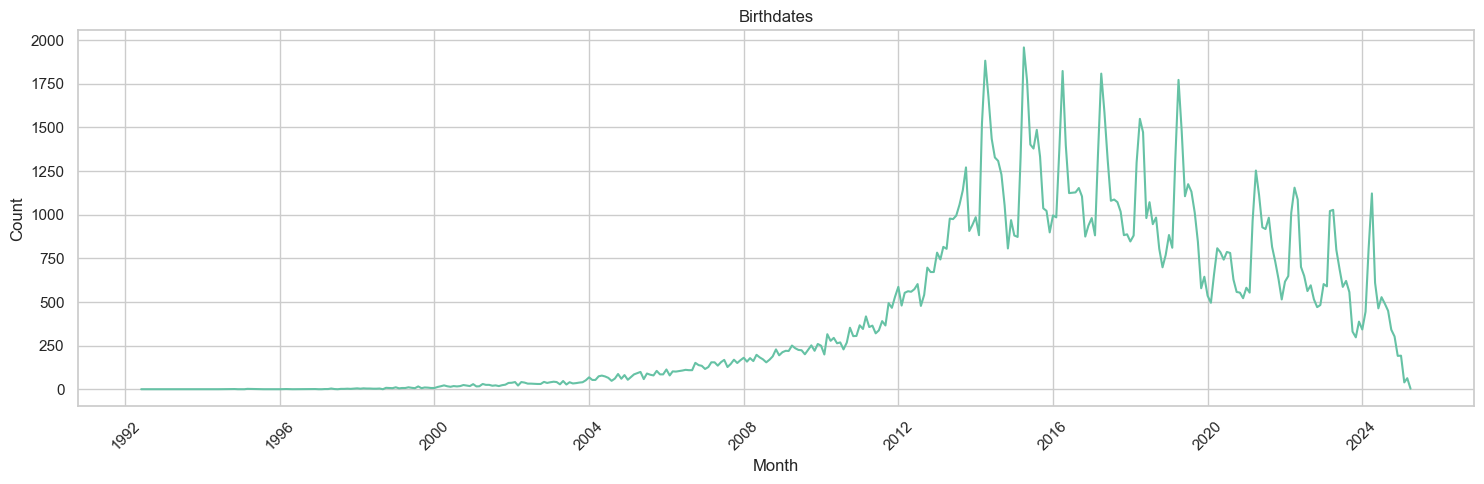

In [146]:
# Graphing

aacBirth['Month'] = aacBirth['BirthDate'].dt.to_period('M')  # Grab monthly periods
month_counts = aacBirth.groupby('Month').size().reset_index(name='Count')
month_counts['Month'] = month_counts['Month'].dt.to_timestamp()

plt.figure(figsize = (15,5))
sns.lineplot(data=month_counts, x='Month', y='Count')
plt.title('Birthdates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is good in that it shows strong seasonal trends. The range of dates is so wide, however, and the majority of them come after 2013, which makes this somewhat difficult to read. 

In [147]:
# Limit those dates

start_births = '2013-01-01'
end_births = '2025-04-30'

# Filter the DataFrame

births_mask = (aacBirth['BirthDate'] >= start_births) & (aacBirth['BirthDate'] <= end_births)
aacBirth_masked = aacBirth.loc[births_mask]

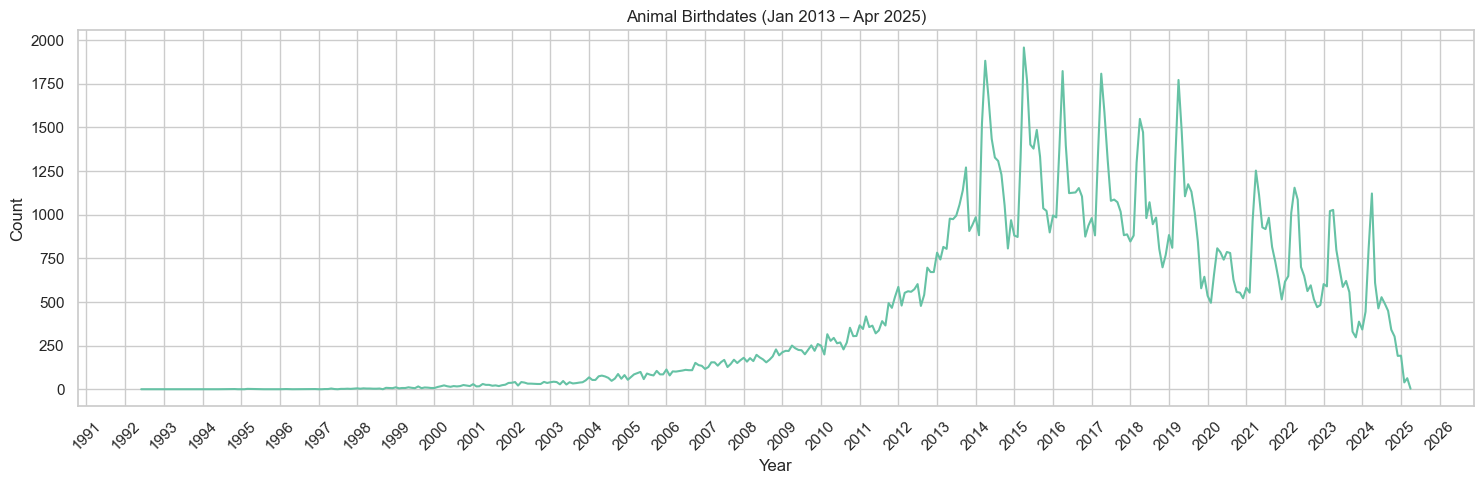

In [148]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=month_counts, x='Month', y='Count')

plt.title('Animal Birthdates (Jan 2013 – Apr 2025)')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.gca()

# ✅ Major ticks: every January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# ✅ Minor ticks: every 3 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
minor_locator = mdates.MonthLocator(interval=3, bymonthday=1)
ax.xaxis.set_minor_locator(minor_locator)

# Rotate labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Again, likely not the most helpful of columns, but this does show a strong seasonality in animal births, which is relevant for animal control purposes.

## Age: AgeYears, AgeCategory

### AgeYears

#### Value Counts/Outliers

Value counts won't help us much here, but we can check for outliers. Let's do so now. I know this is an integer-based column of rounded ages.

In [149]:
# Check out summary stats

aac['AgeYears'].describe()

count    161731.000000
mean          1.961473
std           2.905957
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          24.000000
Name: AgeYears, dtype: float64

In [150]:
# Setting up variables for calculation; 
# we have to get pretty specific with the quantiles, since the distribution is so very skewed

years_q1 = aac['AgeYears'].quantile(0.05)
years_q3 = aac['AgeYears'].quantile(0.95)
years_IQR = years_q3 - years_q1

# Outliers: values outside 1.5 * IQR from Q1 and Q3

years_outliers = aac[(aac['AgeYears'] < years_q1 - 1.5 * years_IQR) | (aac['AgeYears'] > years_q3 + 1.5 * years_IQR)]
years_outliers

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
83430,A773881,Shy Boy,Dog,German Shepherd,True,Red,Red,Neutered Male,Male,Neutered Male,...,Senior,Stray,Aged,2018-06-07 08:25:00,0 days 07:08:00,0.000814,2018-06-07 15:33:00,Return to Owner,Positive,False
119400,A498745,Peeps,Dog,Wolf Hybrid,True,White,White,Spayed Female,Female,Spayed Female,...,Senior,Stray,Injured,2020-08-31 07:46:00,0 days 04:50:00,0.000551,2020-08-31 12:36:00,Euthanasia,Negative,False


In [151]:
# I'm actually considering capping ages at 20; how many rows would that affect?

aac_old = aac.loc[aac['AgeYears'] > 20]
aac_old

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
12881,A682010,Babyblueeyes,Cat,Domestic Shorthair,True,Seal Point,Point,Neutered Male,Male,Neutered Male,...,Senior,Stray,Sick,2014-06-23 07:41:00,2 days 05:45:00,0.006132,2014-06-25 13:26:00,Return to Owner,Positive,False
37170,A712996,Unnamed,Cat,Siamese,True,Lilac Point,Point,Unknown,NaN,Unknown,...,Senior,Stray,Aged,2015-10-01 12:39:00,0 days 01:07:00,0.000127,2015-10-01 13:46:00,Return to Owner,Positive,False
45190,A723385,Sage,Cat,Domestic Shorthair,True,Tortoiseshell,Tortoiseshell,Spayed Female,Female,Spayed Female,...,Senior,Stray,Normal,2016-03-31 11:01:00,3 days 04:47:00,0.008759,2016-04-03 15:48:00,Return to Owner,Positive,False
61694,A744732,Prieta,Cat,Domestic Shorthair,True,Black,Black,Spayed Female,Female,Spayed Female,...,Senior,Owner Surrender,Normal,2017-03-06 16:31:00,0 days 00:38:00,0.000072,2017-03-06 17:09:00,Euthanasia,Negative,False
83430,A773881,Shy Boy,Dog,German Shepherd,True,Red,Red,Neutered Male,Male,Neutered Male,...,Senior,Stray,Aged,2018-06-07 08:25:00,0 days 07:08:00,0.000814,2018-06-07 15:33:00,Return to Owner,Positive,False
118833,A821351,Itty Bitty,Cat,Domestic Medium Hair,False,Tortoiseshell,Tortoiseshell,Spayed Female,Female,Spayed Female,...,Senior,Stray,Sick,2020-08-10 08:05:00,0 days 05:03:00,0.000576,2020-08-10 13:08:00,Return to Owner,Positive,False
119400,A498745,Peeps,Dog,Wolf Hybrid,True,White,White,Spayed Female,Female,Spayed Female,...,Senior,Stray,Injured,2020-08-31 07:46:00,0 days 04:50:00,0.000551,2020-08-31 12:36:00,Euthanasia,Negative,False
134341,A848731,Licorice,Cat,Domestic Shorthair,False,Blue,Gray,Spayed Female,Female,Spayed Female,...,Senior,Euthanasia Request,Injured,2021-12-27 15:13:00,0 days 00:39:00,0.000074,2021-12-27 15:52:00,Euthanasia,Negative,False


In [152]:
# Yes, let's cap those at 20

# List of row indexes

old_indices = aac_old.index.to_list()

# For loop

for i in old_indices:
    aac.loc[i, 'AgeYears'] = 20

In [153]:
# Check it worked

# Update aac_old

aac_old = aac.loc[aac['AgeYears'] > 20]
aac_old

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned


#### Graphing

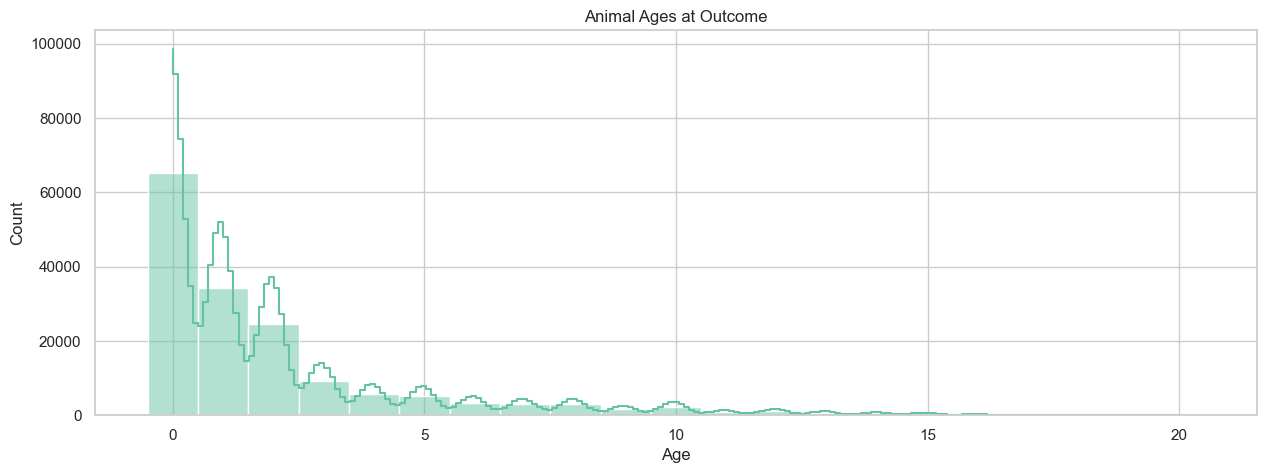

In [154]:
plt.figure(figsize=(15, 5))
plt.title('Animal Ages at Outcome')
plt.ylabel('Count')
plt.xlabel('Age')

sns.histplot(
    data = aac,
    x = 'AgeYears',
    discrete = True,
    kde = True,
    line_kws = {'ds' : 'steps'}
)

plt.show()

What we see here is a lot of neonates, with animal numbers consistently dwindling as age increases. Ages in this category were rounded to the nearest integer, which is why we see so many "0" year-old animals. There are so few animals above 16 years of age that they do not show up on the graph; however, they were within the outlier calculations, so I am not concerned about them. This distribution is very skewed; for now, I will leave it be.

### AgeCategory

#### Value Counts/Outliers

I don't expect any outliers in this one, since the categories were determined by myself and fairly broad. But checking out the value counts here can't hurt.

In [155]:
print(aac['AgeCategory'].value_counts())

AgeCategory
Infant     75149
Young      49050
Adult      26414
Senior     11112
Unknown        6
Name: count, dtype: int64


Somewhat disagreeing with our graph above, which is concerning. The previous graph showed roughly 90,000 infant animals, with this categorical column only counting 75,000 of them. Let's see how its graph corresponds.

#### Graphing

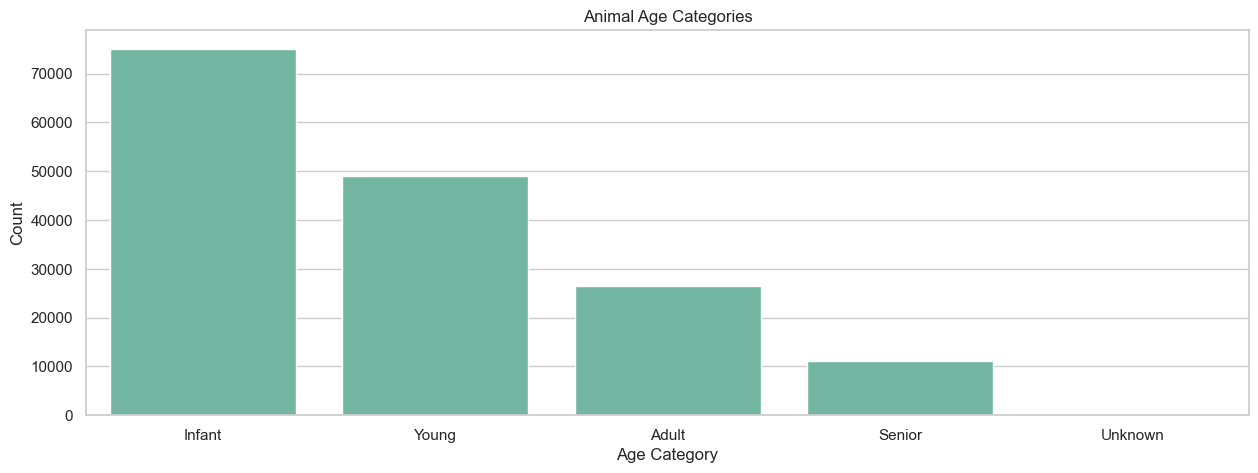

In [156]:
plt.figure(figsize=(15, 5))
plt.title('Animal Age Categories')
plt.ylabel('Count')
plt.xlabel('Age Category')

sns.countplot(
    data = aac,
    x = 'AgeCategory',
    order = ['Infant', 'Young', 'Adult', 'Senior', 'Unknown']
)

plt.show()

This does show the same trends, if not the same numbers, and since the age years were calculated directly from the original ages, and categories were inferred from the age years, I'm going to just assume some inexactness in categorical conglomeration. As a reminder, 'Infant' is comprised of ages 0-1, 'Young' is 1-2 (which is where I assume the numerical differences come in), 'Adult' is 3-7, and 'Senior' is 8 and above.

## Intake: IntakeType, IntakeCondition

### IntakeType

#### Value Counts/Outliers

In [157]:
# Starting with value counts, as usual

print(aac['IntakeType'].value_counts())

IntakeType
Stray                 115938
Owner Surrender        34004
Public Assist           9741
Abandoned               1804
Euthanasia Request       243
Wildlife                   1
Name: count, dtype: int64


That "Wildlife" intake should be no more. Let's check it out and delete it, if needed.

In [158]:
aac.loc[aac['IntakeType'] == 'Wildlife']

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned
131917,A844562,Red,Dog,Labrador Retriever,False,Red,Red,Neutered Male,Male,Neutered Male,...,Senior,Wildlife,Sick,2021-10-17 14:53:00,0 days 00:23:00,0.000044,2021-10-17 15:16:00,Return to Owner,Positive,False


I think this is just a mistake. It's a named dog who was returned to his owner, so I'm going to change that intake to "Stray".

In [159]:
# Set that value right

aac.loc[131917, 'IntakeType'] = 'Stray'

In [160]:
# Check it worked

print(aac['IntakeType'].value_counts())

IntakeType
Stray                 115939
Owner Surrender        34004
Public Assist           9741
Abandoned               1804
Euthanasia Request       243
Name: count, dtype: int64


#### Graphing

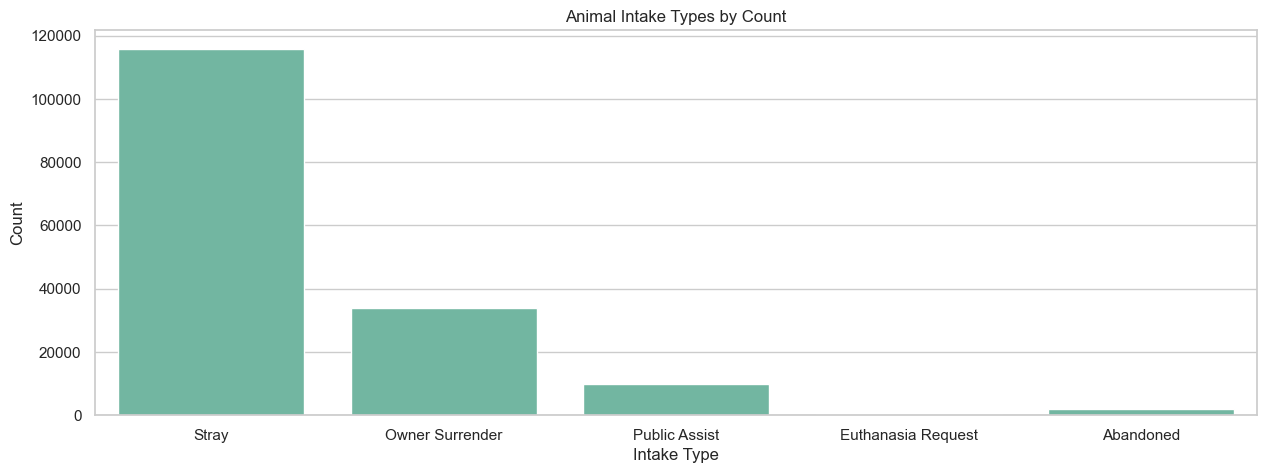

In [161]:
plt.figure(figsize=(15, 5))
plt.title('Animal Intake Types by Count')
plt.ylabel('Count')
plt.xlabel('Intake Type')

sns.countplot(
    data = aac,
    x = 'IntakeType'
)

plt.show()

### IntakeCondition

#### Value Counts/Outliers

In [162]:
print(aac['IntakeCondition'].value_counts())

IntakeCondition
Normal      139262
Injured       9103
Sick          5893
Nursing       3718
Neonatal      1814
Medical        683
Aged           518
Other          364
Pregnant       155
Feral          142
Behavior        79
Name: count, dtype: int64


Nothing particularly odd here; I'm going to call it good. I am uncertain how much use this will be in the final dataset, since so many entries are "Normal", but it may be useful for context in the final presentation.

#### Graphing

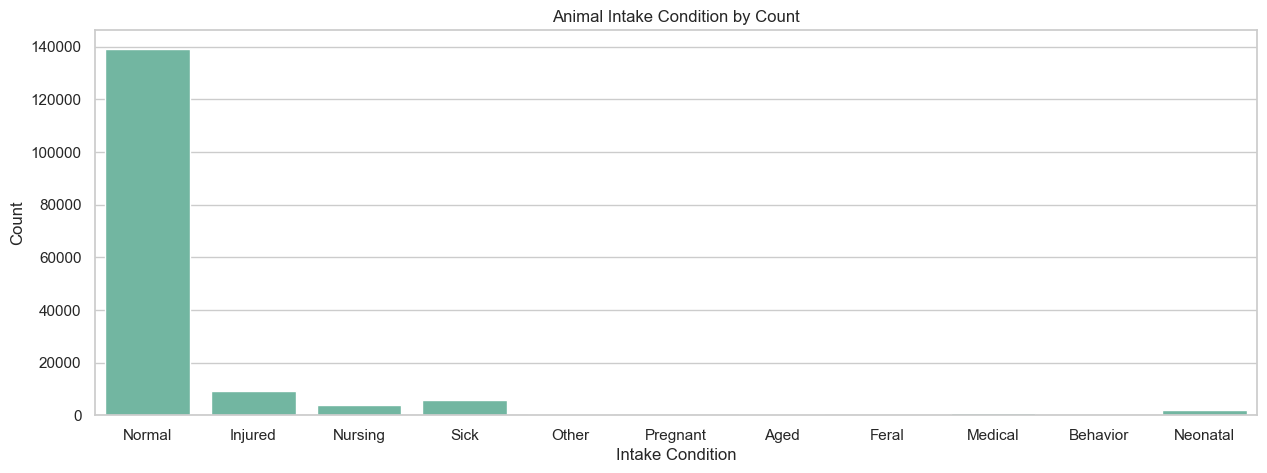

In [163]:
plt.figure(figsize=(15, 5))
plt.title('Animal Intake Condition by Count')
plt.ylabel('Count')
plt.xlabel('Intake Condition')

sns.countplot(
    data = aac,
    x = 'IntakeCondition'
)

plt.show()

As I judged above, the overwhelming majority of entries are "Normal", and the other categories have so few counts that they hardly show up on the graph. I am surprised "Neonatal" isn't a larger category, since so many of the ages are rounded to 0.

## Datetimes: IntakeDT, OutcomeDT

### IntakeDT

Straight to graphing, again, for the datetimes. What times of year are busiest on the intake side? I wonder if they will align with outcome busy seasons.

In [164]:
# Copy so I don't mess with the original dataset in my datetime manipulations

aacTimes = aac[['IntakeDT', 'OutcomeDT']].copy()

In [165]:
# Setting aside data to graph

aacTimes['IntakeMonth'] = aacTimes['IntakeDT'].dt.to_period('M')  # Grab monthly periods
intake_month_counts = aacTimes.groupby('IntakeMonth').size().reset_index(name='Count')
intake_month_counts['Month'] = intake_month_counts['IntakeMonth'].dt.to_timestamp()

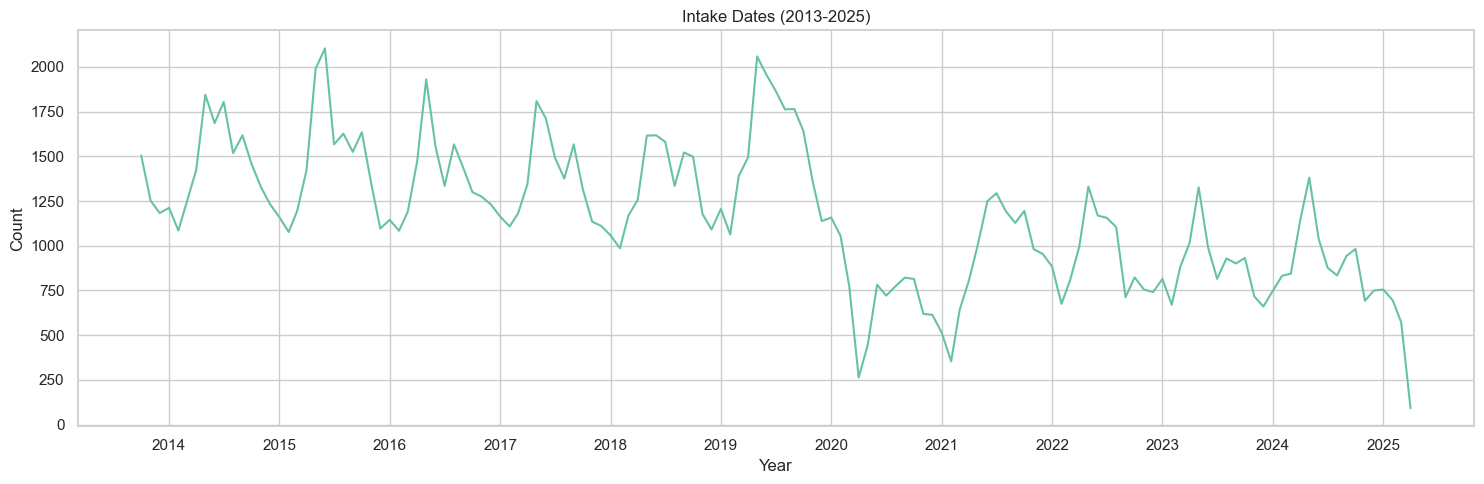

In [166]:
# Graphing

plt.figure(figsize = (15, 5))
sns.lineplot(data = intake_month_counts, x = 'Month', y = 'Count')

plt.title('Intake Dates (2013-2025)')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.gca()

# ✅ Major ticks: every January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# ✅ Minor ticks: every 3 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 3))
minor_locator = mdates.MonthLocator(interval = 3, bymonthday = 1)
ax.xaxis.set_minor_locator(minor_locator)

plt.tight_layout()
plt.show()

So it looks like there is some seasonality here, too--mostly around the peak birthing times, which I suspect is not a coincidence. There does seem to be a decrease in intakes around and after COVID, which may have something to do with intake levels or some other factor.

### OutcomeDT

This column I actually do hold hope for, since the project revolves around adoptions. What times are key adoption times, and why?

In [167]:
aacTimes['OutcomeMonth'] = aacTimes['OutcomeDT'].dt.to_period('M')  # Grab monthly periods
outcome_month_counts = aacTimes.groupby('OutcomeMonth').size().reset_index(name='Count')
outcome_month_counts['Month'] = outcome_month_counts['OutcomeMonth'].dt.to_timestamp()

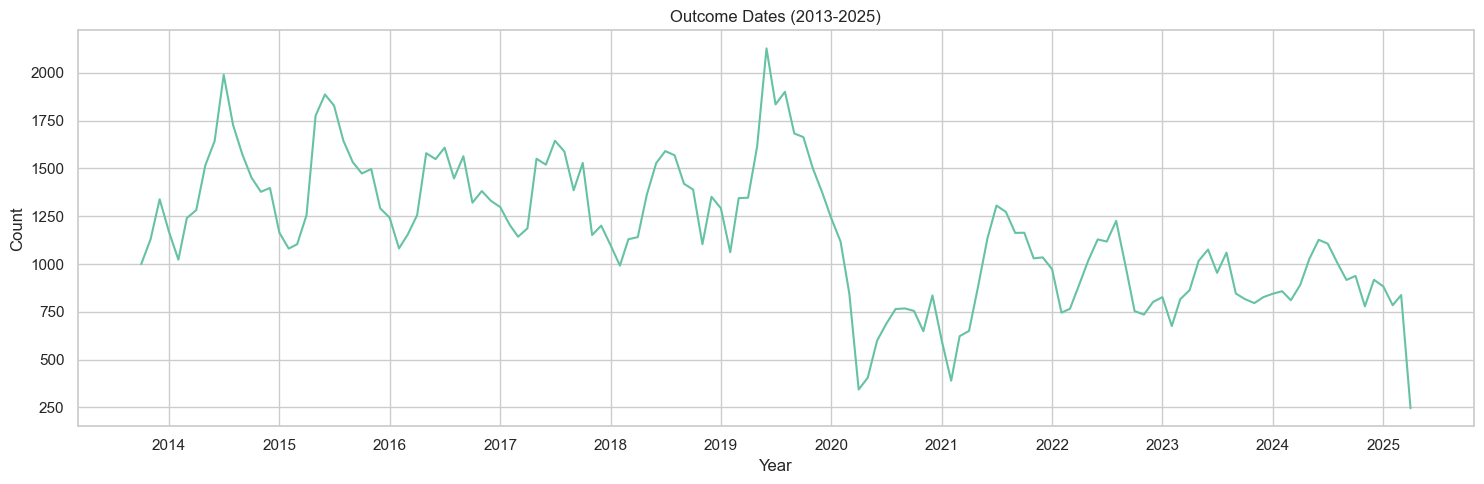

In [168]:
# Graphing

plt.figure(figsize = (15, 5))
sns.lineplot(data = outcome_month_counts, x = 'Month', y = 'Count')

plt.title('Outcome Dates (2013-2025)')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.gca()

# ✅ Major ticks: every January
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# ✅ Minor ticks: every 3 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 3))
minor_locator = mdates.MonthLocator(interval = 3, bymonthday = 1)
ax.xaxis.set_minor_locator(minor_locator)

plt.tight_layout()
plt.show()

It looks like peak times are in the middle of each year, during the summer. This also seems to be right after peak birth and intake times. Possibly this is a result of families being off of school, or summer weather making people want to get outside more. Whatever the case, there is relatively strong seasonality here. The plummet in 2020 is almost certainly a result of COVID, although I don't quite know what the spike in the summer of 2019 is. After COVID, adoptions seem to have picked up somewhat, but levels are definitely still lower than before.

## Shelter Stay: VisitLength, VisitYears, Returned

### VisitLength

This column is an odd datatype (numpy timedelta), so I will have to convert it into a numerical form first. I think I will transfer it to days. Let's first take a look at the stats.

In [169]:
print(aac['VisitLength'].describe())

count                        161731
mean     21 days 23:53:23.443001032
std      49 days 09:41:16.977545793
min                 0 days 00:00:00
25%                 2 days 09:41:30
50%                 6 days 04:58:00
75%                21 days 06:35:00
max              1912 days 22:31:00
Name: VisitLength, dtype: object


In [170]:
# Add a new column to graph this

aac['VisitDays'] = aac['VisitLength'] / np.timedelta64(1, 'D')

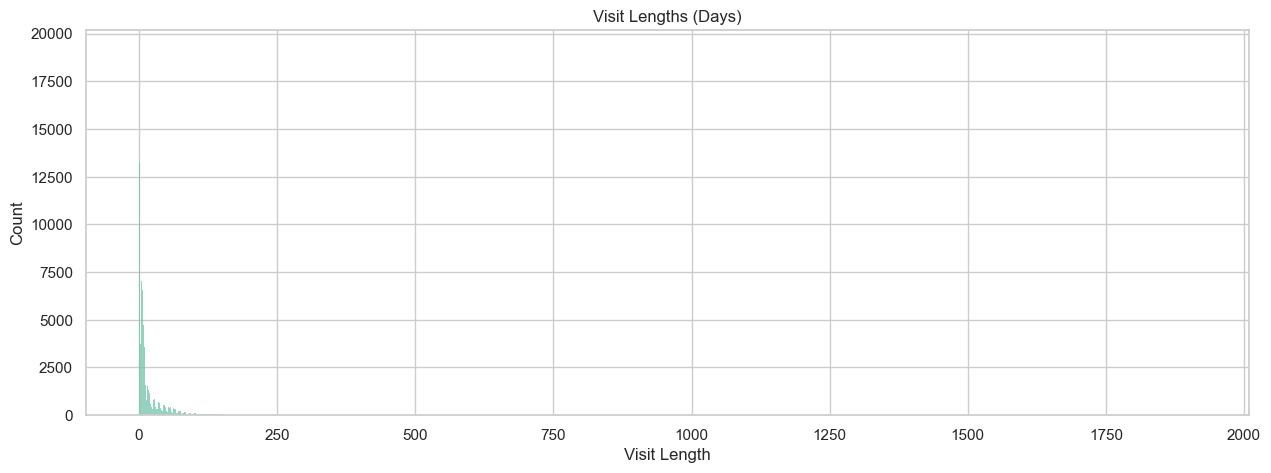

In [171]:
# And now to graph

plt.figure(figsize = (15, 5))
plt.title('Visit Lengths (Days)')
plt.ylabel('Count')
plt.xlabel('Visit Length')

sns.histplot(
    data = aac,
    x = 'VisitDays'
)

plt.show()

Okay, so it appears we have some outliers. Let's take a look at those.

In [172]:
visitdays_q1 = aac['VisitDays'].quantile(0.05)
visitdays_q3 = aac['VisitDays'].quantile(0.95)
visitdays_IQR = visitdays_q3 - visitdays_q1

# Outliers: values outside 1.5 * IQR from Q1 and Q3

visitdays_outliers = aac[(aac['VisitDays'] < visitdays_q1 - 1.5 * visitdays_IQR) | (aac['VisitDays'] > visitdays_q3 + 1.5 * visitdays_IQR)]
visitdays_outliers

,AnimalID,Name,AnimalType,Breed,IsMix,Color,ColorGroup,IntakeSex,Sex,OutcomeSex,...,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned,VisitDays
299,A637539,Puddles,Cat,Domestic Shorthair,True,Black/White,Black/White,Spayed Female,Female,Spayed Female,...,Owner Surrender,Normal,2013-10-06 12:26:00,405 days 03:38:00,1.109244,2014-11-15 16:04:00,Died,Negative,False,405.151389
490,A664895,Silkie,Dog,Blue Lacy,True,Blue,Gray,Intact Female,Female,Spayed Female,...,Stray,Normal,2013-10-10 15:23:00,417 days 20:58:00,1.144076,2014-12-02 12:21:00,Adoption,Positive,False,417.873611
649,A665094,O'Malley,Dog,American Pit Bull Terrier,True,Black/White,Black/White,Intact Male,Male,Neutered Male,...,Stray,Normal,2013-10-13 15:24:00,297 days 03:05:00,0.813493,2014-08-06 18:29:00,Adoption,Positive,False,297.128472
714,A665173,Hardy,Dog,American Pit Bull Terrier,True,Chocolate,Brown,Intact Male,Male,Neutered Male,...,Stray,Normal,2013-10-14 16:25:00,231 days 20:18:00,0.634759,2014-06-03 12:43:00,Adoption,Positive,False,231.845833
754,A613821,Rosie,Dog,American Pit Bull Terrier,True,Tan,Tan,Spayed Female,Female,Spayed Female,...,Owner Surrender,Normal,2013-10-15 12:31:00,331 days 19:47:00,0.908485,2014-09-12 08:18:00,Adoption,Positive,False,331.824306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164902,A910829,Avocado,Dog,Carolina Dog,True,Black/White,Black/White,Neutered Male,Male,Neutered Male,...,Public Assist,Normal,2024-08-05 13:35:00,234 days 10:25:00,0.641845,2025-03-28 00:00:00,Transfer,Other,False,234.434028
164903,A910830,Pumpkin,Dog,Black Mouth Cur,True,Brown,Brown,Neutered Male,Male,Neutered Male,...,Public Assist,Normal,2024-08-05 13:35:00,234 days 10:25:00,0.641845,2025-03-28 00:00:00,Transfer,Other,False,234.434028
165283,A911710,Minny,Dog,Australian Kelpie,False,Black,Black,Spayed Female,Female,Spayed Female,...,Stray,Sick,2024-08-20 10:31:00,219 days 02:48:00,0.599909,2025-03-27 13:19:00,Adoption,Positive,False,219.116667
165309,A911750,Ms. Jackson,Dog,Boxer,True,Tan,Tan,Intact Female,Female,Spayed Female,...,Public Assist,Normal,2024-08-20 15:03:00,224 days 21:06:00,0.615686,2025-04-02 12:09:00,Adoption,Positive,False,224.879167


So, that's a lot of outliers, and unfortunately they are rather important. Instead of culling or changing them, I am going to plot on a log scale for clarity (for now). I may need to remove, cap, or log them later, for modeling, but for now I'd like to keep as much data as possible. Animals that stayed several years are important to note, given the goal of this project.

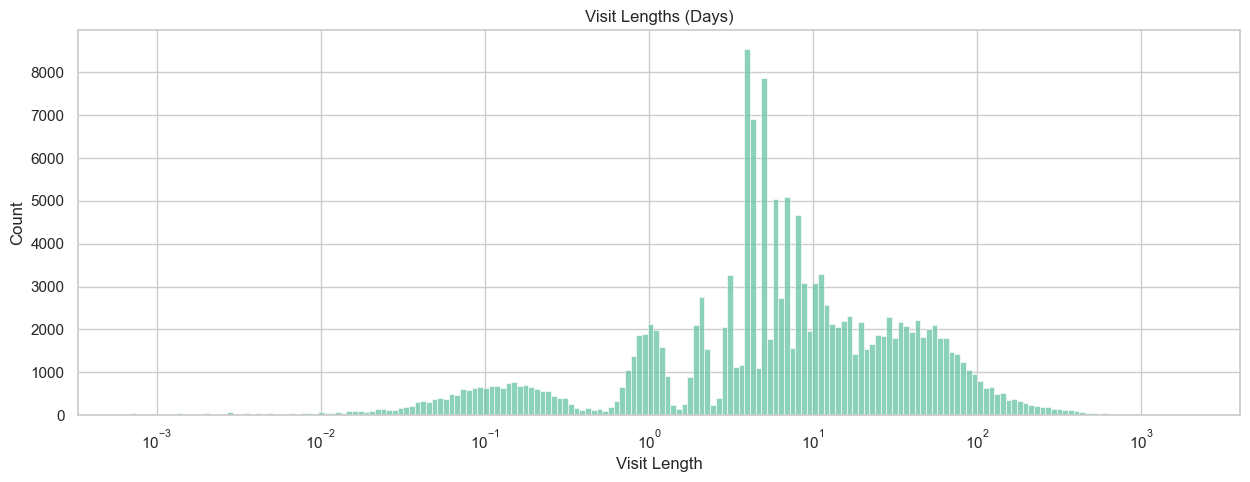

In [173]:
# Graphing again

plt.figure(figsize = (15, 5))
plt.title('Visit Lengths (Days)')
plt.ylabel('Count')
plt.xlabel('Visit Length')

sns.histplot(
    data = aac,
    x = 'VisitDays',
    log_scale = True
)

plt.show()

This is complicated and interesting. There is a small peak at under a day, where there seem to be very quick outcomes. There is another peak around one day, another around a week, and then a long right-skewed tail indicating the animals who stayed 100 days or longer. This is a pretty complicated distribution, with several peaks at different points. I will be interested in seeing how this interacts with other variables.

### VisitYears

Since I plotted visit lengths as days, I am going to leave this one be, aside from some summary stats.

In [174]:
print(aac['VisitYears'].describe())

count    161731.000000
mean          0.060220
std           0.135260
min           0.000000
25%           0.006581
50%           0.016994
75%           0.058246
max           5.237339
Name: VisitYears, dtype: float64


### Returned

This is a Boolean column, so the values are very simple. I am going to print out a value count of this column for reference, but not plot this one.

In [175]:
print(aac['Returned'].value_counts())

Returned
False    144495
True      17236
Name: count, dtype: int64


## Outcome: OutcomeType, OutcomeSuccess

### OutcomeType

#### Value Counts/Outliers

In [176]:
print(aac['OutcomeType'].value_counts())

OutcomeType
Adoption           82235
Transfer           46488
Return to Owner    26608
Euthanasia          4912
Died                1361
Missing              127
Name: count, dtype: int64


To me, this is a satisfactory lineup. I will plot it quickly, and then figure out later how it interacts with others.

#### Graphing

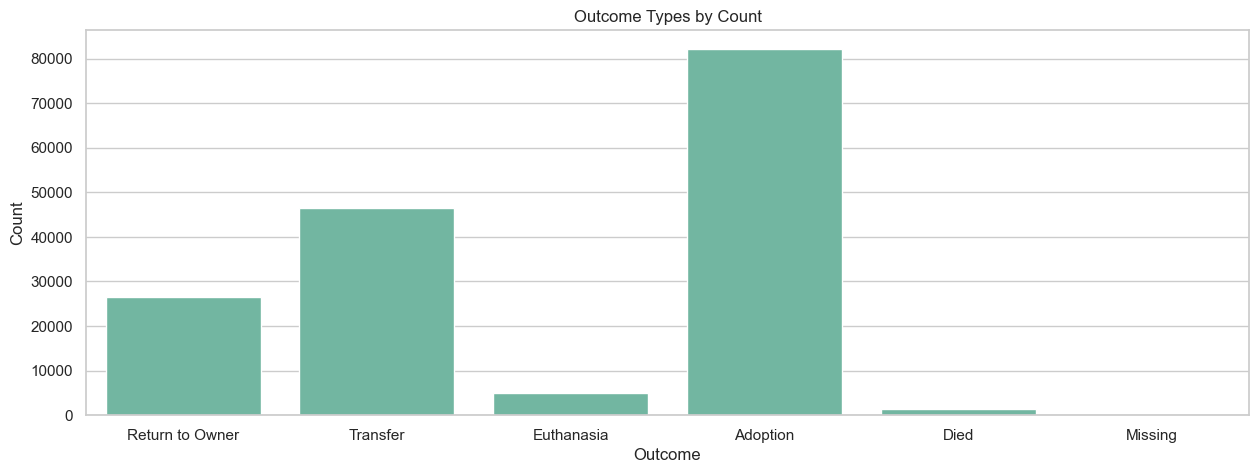

In [177]:
plt.figure(figsize=(15, 5))
plt.title('Outcome Types by Count')
plt.ylabel('Count')
plt.xlabel('Outcome')

sns.countplot(
    data = aac,
    x = 'OutcomeType'
)

plt.show()

"Died" and "Missing" have very few entries, but that's from my point of view a good thing. Adoption is the most common outcome, which is great.

### OutcomeSuccess

This is also a very simple column, with just three categories. Instead of plotting, I will just print the value counts here again.

In [178]:
print(aac['OutcomeSuccess'].value_counts())

OutcomeSuccess
Positive    108843
Other        46488
Negative      6400
Name: count, dtype: int64


Positive is by far the most common outcome. Since Austin is a no-kill city, this makes sense; however, the goal of this project is to speed up the adoption process so the city does not have to turn away intakes.

# Multivariate Analysis

In [179]:
# Print columns again, for reference

print(aac.columns)

Index(['AnimalID', 'Name', 'AnimalType', 'Breed', 'IsMix', 'Color',
       'ColorGroup', 'IntakeSex', 'Sex', 'OutcomeSex', 'ShelterFixed',
       'BirthDate', 'AgeYears', 'AgeCategory', 'IntakeType', 'IntakeCondition',
       'IntakeDT', 'VisitLength', 'VisitYears', 'OutcomeDT', 'OutcomeType',
       'OutcomeSuccess', 'Returned', 'VisitDays'],
      dtype='object')


The categories I expect to be of most use here are:

* for animal characteristics: AnimalType, Breed, IsMix, Color/ColorGroup, OutcomeSex, AgeYears/AgeCategory
* for calculations and deductions: VisitLength, OutcomeType, Returned

I will look at the Intake and other unmentioned columns; however, these are the ones I expect will be most helpful.

In [180]:
# Find dtypes for plotting and correlation calculations

print(aac.dtypes)

AnimalID                    object
Name                        object
AnimalType                  object
Breed                       object
IsMix                         bool
Color                       object
ColorGroup                  object
IntakeSex                   object
Sex                         object
OutcomeSex                  object
ShelterFixed                  bool
BirthDate           datetime64[ns]
AgeYears                     int64
AgeCategory                 object
IntakeType                  object
IntakeCondition             object
IntakeDT            datetime64[ns]
VisitLength        timedelta64[ns]
VisitYears                 float64
OutcomeDT           datetime64[ns]
OutcomeType                 object
OutcomeSuccess              object
Returned                      bool
VisitDays                  float64
dtype: object


In [181]:
# Set aside columns that will not be analyzed

aac_flavor = aac[['AnimalID', 'Name', 'IntakeSex', 'ShelterFixed', 'BirthDate']]

# And drop those from the base dataframe

aac = aac.drop(columns = aac_flavor.columns)

# Set aside Datetimes

aac_dt = aac[['IntakeDT', 'OutcomeDT']]

# And numerical columns--this excludes VisitLength, since it is not a datatype that is easy to work with in graphing

aac_num = aac[['AgeYears', 'VisitDays', 'VisitYears']]

# String and boolean columns

aac_obj = aac[['AnimalType', 'Breed', 'IsMix', 'Color', 'ColorGroup', 'OutcomeSex', 'Sex', 'AgeCategory', 
               'IntakeType', 'IntakeCondition', 'OutcomeType', 'OutcomeSuccess', 'Returned']]

# Finally, choosing which categorical columns to include, excluding columns with too many categories such as "Breed" and "Color"
categorical_columns = ['AnimalType', 'IntakeType', 'IntakeCondition', 'AgeCategory', 'Sex', 
                       'OutcomeSex', 'OutcomeType', 'OutcomeSuccess', 'Returned', 'IsMix']

I have left out certain categories, namely 'AnimalID', 'Name', 'IntakeSex', 'ShelterFixed', and 'VisitLength'. Some of these are identifier or storytelling columns, some are only tangentially related to our goal, and some are intermediary or redundant columns from which I have derived other information. Whatever the case, they won't be as useful here, so I have decided to exclude them.

## Preliminary/Overall Investigation

To begin, I'm going to use plotly to plot the categorical variables against each other.

In [182]:
# Create dropdowns and output
x_dropdown = widgets.Dropdown(options = categorical_columns, description = 'X Axis:')
color_dropdown = widgets.Dropdown(options = categorical_columns, description = 'Hue:')
out = widgets.Output()

#Updata function
def on_change(change):
    with out:
        out.clear_output()
        fig = px.histogram(aac_obj, x = x_dropdown.value, color = color_dropdown.value, barmode = 'group')
        fig.update_layout(title = f'{x_dropdown.value} vs {color_dropdown.value}', bargap = 0.2)
        fig.show()

# Attach observers and display
x_dropdown.observe(on_change, names = 'value')
color_dropdown.observe(on_change, names = 'value')
display(widgets.HBox([x_dropdown, color_dropdown]), out)

Output()

I can make some observations from these plots now. 

* First, the vast majority of dogs are mixed-breeds, and while most cats were also mixed-breed, the margin between mixed and purebred is thinner. 
* The majority of animals exiting the shelter were fixed, though again, the margin for cats is thinner than that for dogs, who were overwhelmingly fixed.
* The number of infant cats made up far more than all other age categories combined, whereas there were more young dogs than infants. Adults and seniors were the sparsest category of both cats and dogs.
* Most intakes were strays by a large margin, followed by owner surrenders. This holds for both cats and dogs.
* More cats were transferred out of shelter than dogs, and more dogs were adopted (but there were more of them to begin with). Cats were rarely returned to owners, whereas it was the second most common outcome for dogs.
* Negative outcomes are uncommon for both cats and dogs, and positive outcomes are the most common by far.
* Both cats and dogs appear to have similarly-proportioned rates of return to shelter.
* Unfortunately, the breed graphs are too difficult to make out in this set of figures, and colors/color groups are similar.
* Sexes across age groups appear to be fairly equally proportioned, although there do seem to be more males generally.
* Young animals seem to be the most returned, which makes sense; they have the body of an adult and the brain of an adolescent, and usually have energy to match.
* Animals that are returned to shelter are most often owner surrenders.

With these in mind, I am preliminarily most interested in:
* Returns: they seem to be most commonly owner surrenders and young.
* The categories that are difficult to see in these graphs: Breed, Color/ColorGroup, and mixes of large categories.

I am also going to make plots of these as percentages. It can be difficult to make observations based on raw numbers, so percentages can help identify differences between categories more clearly.

In [183]:
# Similar graph as above, but using category percentages instead of raw numbers

# Create dropdowns and output--these are the same as before, but for the sake of clear code, I'm going to clarify them again
x_dropdown = widgets.Dropdown(options = categorical_columns, description = 'X Axis:')
color_dropdown = widgets.Dropdown(options = categorical_columns, description = 'Color by:')
out = widgets.Output()

# Update function
# Since each graph is slightly different, I will have to define this each time as well
def on_change(change):
    with out:
        out.clear_output()
        
        # Skip if same variable is selected for both
        if x_dropdown.value == color_dropdown.value:
            print("Please select different variables for X Axis and Color.")
            return
            
        # Calculate percentages and create plot
        crosstab = pd.crosstab(aac[x_dropdown.value], aac[color_dropdown.value], normalize = 'index') * 100
        plot_data = crosstab.reset_index().melt(id_vars = [x_dropdown.value], var_name = color_dropdown.value, value_name = 'Percentage')
        
        fig = px.bar(
            plot_data, x = x_dropdown.value, y = 'Percentage', color = color_dropdown.value,
            title = f'{x_dropdown.value} vs {color_dropdown.value} (by %)',
            barmode = 'group', height = 500
        )
        fig.update_layout(bargap = 0.2, xaxis_tickangle = -45)
        fig.show()

# Attach observers and display
x_dropdown.observe(on_change, names = 'value')
color_dropdown.observe(on_change, names = 'value')
display(widgets.HBox([x_dropdown, color_dropdown]), out)

Output()

Now, going through these one at a time...:

**AnimalType**: *(Cat, Dog)*  
***+ IntakeType***: There seem to be more stray cats, and fewer owner surrenders and public assists. Abandoned animals are about equal.  
***+ IntakeCondition***: There are more neonatal and nursing cats than dogs, as well as more sick cats.  
***+ AgeCategory***: There are far more infant cats than dogs, more dogs of each other age.  
***+ Sex***: Cats seem fairly equally male and female, whereas there seem to be more male dogs.  
***+ OutcomeSex***: Unfortunately over 7% of the cats are "Unknown". About 1/3 of cats are intact males and females, whereas far more dogs (comparatively) were fixed by the end of their stay. I account this to the high number of infant cats. There are far fewer "Unknown" dogs--dogs are, in general, also easier to sex. I don't want to cut that many cats from the dataset, but I think since I am trying to predict the outcome for a given animal and not what animals may come in to the shelter, it could be okay to remove those. I am unsure of any other way to recover this sex data.   
***+ OutcomeType***: Far more cats are transferred from the shelter, and far more dogs are returned to owners. Cats also have a slightly higher rate of euthanasia and death. Both still are mostly adopted.  
***+ OutcomeSuccess***: Dogs have far more positive outcomes than do cats. Cats are moderately more likely to receive a neutral result, and slightly more likely to have a negative result.  
***+ Returned***: Cats are returned to the shelter less than dogs.  
***+ IsMix***: Dogs are mixed-breed more often than cats (although I take this with a grain of salt, as cat breeds are often difficult to identify and/or somewhat irrelevant.  

**IntakeType**: *(Abandoned, Euthanasia Request, Owner Surrender, Public Assist, Stray)*  
***+ IntakeCondition***: There are far fewer normally-conditioned animals brought in as a euthanasia request; instead, these animals are most often sick, aged, or injured. Strays are also more likely to be injured.  
***+ AgeCategory***: There are a few significant differences here. Most infant animals are abandoned or strays at intake, and a significant but lesser number are owner surrenders. The vast majority of euthanasia requests are seniors (this makes sense), and in fact seniors are overwhelmingly brought in as euthanasia requests. Adults and young animals are most often public assists.  
***+ Sex***: Public assists seem to be distinctly more male--I wonder why! Otherwise, distributions are fairly even, particularly owner surrenders.  
***+ OutcomeSex***: The main things which stand out here are the high number of fixed animals (reminder: these are fixed upon *exiting* the shelter) which are owner surrenders (although, considering this intake type, it is possible these animals are largely fixed upon entering the shelter as well). "Unknown"s are scattered across all five types. I also notice that public assists appear to be mostly neutered males, with a far lower rate of females in general.  
***+ OutcomeType***: Most abandoned and owner-surrendered animals are adopted, as well as most strays (to a lesser degree). Animals brought in with a euthanasia request are almost always euthanized. Strays are transferred most often (likely because they are slightly more difficult to adopt out), but not to a massive degree. They are also second-most returned to owners, with public assist intakes being (by far) the most common returns.  
***+ OutcomeSuccess***: Most intakes follow the same trends in this regard, except for euthanasia requests, which are completely flipped (mostly negative and least positive outcomes). These follow the observations above (since the column is directly derived from OutcomeType).  
***+ Returned***: Most animals returning to shelter are owner surrenders (this makes sense). The next-highest category is public assist intakes, which I would imagine is escaped and lost pets.  
***+ IsMix***: This is both cats and dogs, so I take this hesitantly. However, it seems euthanasia requests are most often mixed, whereas abandoned animals are least mixed. This could be due to irresponsible puppy- or kitten breeding or purchasing, but also could be circumstantial. Owner surrenders, public assists, and strays are almost exactly equivalent. I evaluate this combination with some skepticism.  

**IntakeCondition**: *(Aged, Behavior, Feral, Injured, Medical, Neonatal, Normal, Nursing, Other, Pregnant, Sick)*  
***+ AgeCategory***: Aged animals are obviously mostly seniors; however, there are some young and infant animals in this category, which seems incorrect. Behavioral intakes are mostly young and adult animals, with some infants (which is odd to me--possibly this is related to completely feral kittens and puppies). There are relatively few senior intakes in general. Neonatal and nursing animals are overwhelmingly infants (I am skeptical of those which are not). Pregnant animals are mostly young, and secondarily infants (the infant age range is set as 0-1 year, with ages rounded to the nearest year for simplicity--I suspect these are just very young animals which have unfortunately not wasted any time in their reproductive life). Medical intakes and sick animals are mostly infants. Overall, infants and young animals dominate most categories, with adults following behind, whereas seniors are relatively uncommon (except as Aged intakes). These mostly make sense to me (with the exception of some outliers, particularly Aged infants and Neonatal or Nursing adults).  
***+ Sex***: Concerningly, there are 12% pregnant males. This seems very incorrect. Males also significantly dominate feral and behavioral intakes, which is a bit interesting. They are also the majority (slightly) of medical and injured intakes. In fact, the only categories that female animals dominate are nursing (barely) and pregnant (overwhelmingly) intakes.  
***+ OutcomeSex***: The most striking thing (to me) in this graph is that there are "Pregnant" males--in fact, about 12% of the pregnant entries are listed as intact or neutered (*especially* concerning) males. There are also 4.5% which are "Unknown". While I'm not sure how these errors quite occurred (my assumption is that some chonky boys came in and were not identified as such until they left), they are rather funny. I did double-check how many entries were taken in pregnant, which was 155. So, 16% of 155 is about 25 animals which were misidentified in some way--at least it is quite a small number. Since I do have data for these animals (supposedly one of those pieces of information are true), and it is such a few number, I think I will leave them (except for possibly the unknowns, as I mentioned above); they are strange entries, though, and do make me laugh. Moving on, though, neutered males dominate most of the categories (aged, behavior, feral, injured, medical, normal, other, and sick--barely), to variable degrees--particularly behavioral and feral intakes. There are quite a lot of unknown nursing and neonatal animals, which makes sense; very young animals can be quite difficult to sex. Spayed female animals (exiting the shelter) were most likely to come in aged, normal, pregnant, or in some other condition. Sick animals are the most uniform, with all four sexes being almost equally proportioned in that category.  
***+ OutcomeType***: Aged animals are mostly returned to owners (this makes sense in context of what we have seen earlier). The most adopted animals were intaken in normal, other, or medical-need condition, somewhat interestingly. Feral, neonatal, nursing, pregnant, and sick animals were transferred more often than adopted; almost all others were mostly adopted (though by not as large of margins as I had expected). Euthanasias were most common in aged, behavioral, injured, and sick cases, which makes sense. Most animals returned to owners were in normal or aged condition, or had been brought in for behavioral reasons. The only intake condition with a significant number of missing animals was behavioral intakes--I'm not totally sure what that is about.  
***+ OutcomeSuccess***: The first thing that stands out to me is that aged animals have a significantly higher success rate than senior animals had (as far as age categories went). I'm not sure what to make of this discrepancy, aside from possibly different thresholds for what counted as "Aged". No intake category has more negative outcomes than positive or other, although some (feral, neonatal, nursing, pregnant, and sick) have more "other" outcomes than positive. I suspect the shelter does not have enough resources to deal with these cases and transfers them to somewhere that does.   
***+ Returned***: By far, behavioral intakes are returned more often compared to others. This makes sense. Feral, neonatal, and nursing animals are very rarely returned--I suspect this is due to the high rate of transfers from the shelter that these groups experience.  
***+ IsMix***: I treat this combination of categories with suspicion as well. However, evaluating it at face-value, the only categories that are *not* mostly mixed are medical and neonatal intakes (though not nursing). As far as neonatal goes, I suspect those animals are simply far too young to tell breed. I am unsure why medical shows this difference. Normal and nursing animals seem to have the most mixes (again uncertain why).  

**AgeCategory**: *(Infant, Young, Adult, Senior, Unknown)*  
***+ Sex***: Males are the majority of all of these, but they are particularly dominant in adults.  
***+ OutcomeSex***: Most "Unknown" animals are the infants, which makes sense--they are the hardest to identify. Neutered males dominate every category, and otherwise the distributions follow relatively close distributions (except for infants, which have a higher proportion of intact animals but are still largely fixed).  
***+ OutcomeType***: These correspond well to things we have seen previously. Infants have the highest rate of transfer, although young animals are next in line. Senior animals are most returned to owners, with adult animals secondarily. The highest rate of adoption appears in infants as well, with young animals following. Deaths are about equal among infants and seniors, although seniors are more likely to be euthanized. The "Unknown" age group has 6 entries, and I am going to disregard it.  
***+ OutcomeSuccess***: These follow the same general trend, with infants and young animals having the highest rate of neutral outcomes (likely transfers). Seniors have the highest likelihood of euthanasia.  
***+ Returned***: Adult animals are the most returned, with young and senior animals following at roughly equal rates. Infants rarely return (again, many of these are transferred, so this does not necessarily mean a successful adoption).  
***+ IsMix***: Another combination I treat with suspicion, and in this case, not one which exhibits anything particularly differentiating.  

**Sex**: *(Male, Female)*
***+ OutcomeSex***: It looks like over 2/3 of animals are spayed and/or neutered, which is great!  
***+ OutcomeType***: These distributions look *remarkably* even, actually.  
***+ OutcomeSuccess***: Just as above!  
***+ Returned***: Males do seem to be returned slightly more often, but it is not a huge difference.  
***+ IsMix***: These also are incredibly even, with a little under 1/3 of each sex being purebred.  

**OutcomeSex**: *(Spayed Female, Intact Female, Neutered Male, Intact Male, Unknown)*  
***+ OutcomeType***: There are some interesting trends here, actually, and mostly these are differences between fixed and intact animals. Intact animals have significantly higher death and euthanasia rates than spayed and neutered animals do. Spayed and neutered animals also had a *far* higher rate of adoption, whereas intact and unknown animals were far more likely to be transferred from the shelter. I suspect that it is shelter policy to spay or neuter animals before they are adopted, and therefore very few intact animals are adopted out. Males also typically had a (slightly) higher chance of euthanasia or death.  
***+ OutcomeSuccess***: Given the high rate of transfer that intact animals have, as well as the higher rate of death or euthanasia when compared to fixed animals, their outcomes were mostly neutral. Negative outcomes are still the minority, but they are certainly more common for intact (or unknown) animals than for fixed animals. Notably, unknown animals have a very low positive outcome rate (which may be why they are unknown).  
***+ Returned***: Interestingly, these results seem counter-intuitive, considering the outcome success rates we just saw. Fixed animals have a far higher shelter return rate than do intact or unknown animals (almost none of which returned). It is difficult to relate these to outcome success, since returning is typically not a positive, but a returned animal also likely did not experience a negative outcome on its last visit (AKA, euthanized animals will not be returning to shelter).  
***+ IsMix***: The percentages here are quite even, with all four (five) sexes having relatively equal chances of being mixed-breed.  

**OutcomeType**: *(Adoption, Died, Euthanasia, Missing, Return to Owner, Transfer)*  
***+ OutcomeSuccess***: This category was created using OutcomeType. I am mostly disregarding the "Missing" outcome type, as it is unhelpful and quite minimal anyway.  
***+ Returned***: This grouping is a bit weird, as it evaluates the outcome of an animal's second or further visits to the shelter. Owner returns are most common, which makes sense--this likely includes runaways and lost pets. Otherwise, little stands out to me here.  
***+ IsMix***: This is the first combination including the column IsMix that I consider significant. However, it is not terribly revealing. All categories are more mixed-breed than not. Animals who died have the smallest margin between mixed and purebred, and animals returned to owner seem to be the most commonly mixed. I would have expected the opposite of animals returned to owners, actually.  

**OutcomeSuccess**: *(Positive, Other, Negative)*  
***+ Returned***: Animals which returned to shelter had mostly positive outcomes, although they were about half as likely to have a negative outcome (and less so to get a neutral outcome).  
***+ IsMix***: These are all fairly even.  

**Returned**: *(True, False)*  
***+ IsMix***: *(True, False)* Animals who had returned to the shelter are overwhelmingly mixed-breed. Animals which are purebred seem to return to the shelter somewhat less.

Here I take a brief detour to examine the "Unknown" category of the AgeCategory column and the "Missing" category of the OutcomeType category. Neither of these will be helpful during modeling. From my findings, I don't think I will be using 'OutcomeSex' in the final model, so I am not as worried about the 'Unknown's there.

In [184]:
aac.loc[aac['AgeCategory'] == 'Unknown']

,AnimalType,Breed,IsMix,Color,ColorGroup,Sex,OutcomeSex,AgeYears,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned,VisitDays
170066,Dog,Otterhound,True,Black,Black,Male,Intact Male,3,Unknown,Stray,Normal,2025-02-04 14:15:00,16 days 21:42:00,0.046281,2025-02-21 11:57:00,Euthanasia,Negative,False,16.904167
170370,Dog,Finnish Spitz,False,Brown,Brown,Male,Intact Male,1,Unknown,Stray,Normal,2025-02-16 14:29:00,51 days 23:15:00,0.142283,2025-04-09 13:44:00,Euthanasia,Negative,False,51.968750
170415,Dog,Great Pyrenees,False,White,White,Male,Neutered Male,1,Unknown,Public Assist,Normal,2025-02-18 17:40:00,8 days 21:45:00,0.024384,2025-02-27 15:25:00,Euthanasia,Negative,False,8.906250
171443,Cat,Domestic Shorthair,False,Gray Tabby,Gray Tabby,Female,Spayed Female,8,Unknown,Stray,Injured,2025-04-05 14:31:00,0 days 01:01:00,0.000116,2025-04-05 15:32:00,Euthanasia,Negative,False,0.042361
171445,Dog,Labrador Retriever,True,Black,Black,Male,Intact Male,1,Unknown,Stray,Normal,2025-04-06 12:44:00,2 days 04:43:00,0.006014,2025-04-08 17:27:00,Transfer,Other,False,2.196528
171458,Cat,Domestic Shorthair,False,Silver Tabby,Gray Tabby,Female,Intact Female,1,Unknown,Stray,Injured,2025-04-09 07:26:00,0 days 04:58:00,0.000567,2025-04-09 12:24:00,Euthanasia,Negative,False,0.206944


I am somewhat interested in these six entries because most of them have an OutcomeType of "Euthanasia", which is already a small category and could be somewhat affected by the loss of this data, and they do have valid AgeYears entries (I suspect these are the ones I calculated based on birthdates). So, I will change their AgeCategory entries to correspond correctly with their listed ages.

In [185]:
# Change those entries

aac.loc[170066, 'AgeCategory'] = 'Young'
aac.loc[170370, 'AgeCategory'] = 'Infant'
aac.loc[170415, 'AgeCategory'] = 'Infant'
aac.loc[171443, 'AgeCategory'] = 'Adult'
aac.loc[171445, 'AgeCategory'] = 'Infant'
aac.loc[171458, 'AgeCategory'] = 'Infant'

In [186]:
# Check that the "Unknown" category has been eliminated

print(aac['AgeCategory'].value_counts())

AgeCategory
Infant    75153
Young     49051
Adult     26415
Senior    11112
Name: count, dtype: int64


In [187]:
# How is our dataset looking?

print(aac.shape)

(161731, 19)


And now I'm going to check out "Missing" outcomes.

In [188]:
aac.loc[aac['OutcomeType'] == 'Missing']

,AnimalType,Breed,IsMix,Color,ColorGroup,Sex,OutcomeSex,AgeYears,AgeCategory,IntakeType,IntakeCondition,IntakeDT,VisitLength,VisitYears,OutcomeDT,OutcomeType,OutcomeSuccess,Returned,VisitDays
789,Cat,Domestic Shorthair,True,White,White,Male,Intact Male,0,Infant,Stray,Normal,2013-10-15 17:52:00,51 days 15:35:00,0.141408,2013-12-06 09:27:00,Missing,Negative,False,51.649306
2479,Dog,American Pit Bull Terrier,True,Blue,Gray,Female,Spayed Female,4,Adult,Stray,Injured,2013-11-19 17:45:00,18 days 22:40:00,0.051867,2013-12-08 16:25:00,Missing,Negative,False,18.944444
4587,Dog,Labrador Retriever,True,Black/White,Black/White,Female,Spayed Female,3,Adult,Stray,Normal,2014-01-10 17:54:00,133 days 13:35:00,0.365684,2014-05-24 07:29:00,Missing,Negative,False,133.565972
7542,Cat,Domestic Shorthair,True,Brown Tabby,Brown Tabby,Female,Intact Female,1,Young,Owner Surrender,Normal,2014-03-20 13:13:00,26 days 02:06:00,0.071424,2014-04-15 15:19:00,Missing,Negative,False,26.087500
11851,Cat,Domestic Shorthair,True,Black,Black,Male,Neutered Male,0,Infant,Stray,Normal,2014-06-04 16:17:00,42 days 03:17:00,0.115364,2014-07-16 19:34:00,Missing,Negative,False,42.136806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169193,Dog,American Pit Bull Terrier,True,Black/White,Black/White,Female,Spayed Female,1,Young,Stray,Medical,2024-12-31 12:30:00,73 days 03:46:00,0.200293,2025-03-14 16:16:00,Missing,Negative,False,73.156944
170048,Dog,West Highland White Terrier,True,White,White,Male,Intact Male,1,Infant,Stray,Injured,2025-02-04 07:53:00,4 days 04:01:00,0.011410,2025-02-08 11:54:00,Missing,Negative,False,4.167361
170554,Dog,American Pit Bull Terrier,True,Fawn,Tan,Female,Spayed Female,5,Adult,Stray,Normal,2025-02-24 14:12:00,42 days 04:31:00,0.115505,2025-04-07 18:43:00,Missing,Negative,True,42.188194
170702,Dog,German Shepherd,False,Brown,Brown,Male,Neutered Male,9,Senior,Stray,Injured,2025-02-28 14:19:00,28 days 02:16:00,0.076918,2025-03-28 16:35:00,Missing,Negative,False,28.094444


127 is too many to go through manually, but not enough to significantly affect the dataset. I am almost certain that I will be using OutcomeType in my final model, at least to some extent, and I think this category is just unhelpful. The entries look pretty normal, from the first and last five entries. I am going to drop them.

In [189]:
# Drop those rows

aac = aac.loc[aac['OutcomeType'] != 'Missing'].copy()

In [190]:
# Check that category is no more

print(aac['OutcomeType'].value_counts())

OutcomeType
Adoption           82235
Transfer           46488
Return to Owner    26608
Euthanasia          4912
Died                1361
Name: count, dtype: int64


Great. Now that that is done, I'm also going to create a lineplot to evaluate whether visit days were affected by age (my two numerical columns).

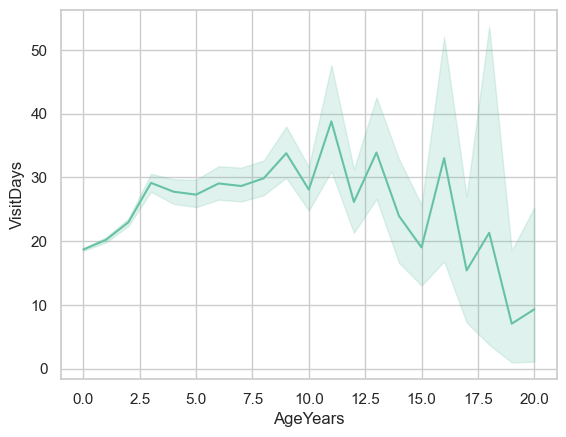

In [191]:
# Let's start with a lineplot

sns.lineplot(aac_num, x = 'AgeYears', y = 'VisitDays')
plt.show()

I actually expected age to have a stronger effect on adoptability than it appears to have. It seems that the very old animals are quite scattered across the board, which I contribute to different outcomes (likely many of the deaths and/or euthanizations would be due to old age). Otherwise, the slight peak around 9-15 years old makes sense to me; shelters often have difficulty getting senior animals adopted. The relatively low stay of very young animals also makes sense, since puppies and kittens are often very popular.

Now for some correlation calculations and a heatmap; let's see how many of these relationships are significant, statistically.

In [192]:
def cate_corr(df, cols, rounding = 2):
    """
    Calculates p-value from the chi-squared test and Cramer's V value
    to calculate correlations between each categorical variable in a dataframe.
    Rounds results to the specified number of decimal places (or 2).
    Prints feedback for monitoring and debugging, for each evaluated pair of columns.

    Params:
        df (pd.DataFrame): A dataframe including categorical variables.
        cols (list): List of column names to evaluate.
        rounding (int): An integer representing the number of decimal places to round to.

    Returns:
        df.DataFrames: Two matrices of column names and corresponding p- and v-values.
    """
    # Create empty square dataframes to hold v- and p-values
    # Using categorical columns as both column and row names
    v_mat = pd.DataFrame(index = cols, columns = cols, dtype = float)
    p_mat = pd.DataFrame(index = cols, columns = cols, dtype = float)

    # Loop over columns
    for col1 in cols:
        for col2 in cols:

            # Debugging feedback
            print(f"\n🔎 Evaluating pair: ({col1}, {col2})")
            
            # Create a contingency table, showing how often combinations occur
            tbl = pd.crosstab(df[col1], df[col2])

            # More debugging feedback
            print(f"Contingency table shape: {tbl.shape}")

            # Defensive step: if the table would be too small (only one category in either column),
            # save as NaN and move on
            if tbl.shape[0] < 2 or tbl.shape[1] < 2:
                # With more debugging feedback
                print("Skipped due to insufficient unique values.")
                v_mat.loc[col1, col2] = np.nan
                p_mat.loc[col1, col2] = np.nan
                continue

            # Defensive "try"
            try:
                # Chi-Squared Test
                # Returns chi-squared value and p-value test statistics
                chi2, p, _, _ = chi2_contingency(tbl)

                # Calculate Cramer's V
                n = tbl.sum().sum()
                min_dim = min(tbl.shape) - 1

                # More feedback
                print(f"chi2 = {chi2:.2f}, p = {p}, n = {n}, min_dim = {min_dim}")

                # More debugging/defensive coding
                if min_dim <= 0:
                    v = np.nan
                else:
                    v = np.sqrt(chi2 / (n * min_dim))

                # Store computed p and v in the proper matrix cells
                v_mat.loc[col1, col2] = round(v, rounding)
                p_mat.loc[col1, col2] = round(p, rounding)

            # Debugging code continued
            except Exception as e:
                print(f"❌ Error computing stats for ({col1}, {col2}): {e}")  # Feedback
                v_mat.loc[col1, col2] = np.nan  # Handling errors
                p_mat.loc[col1, col2] = np.nan

    # Return matrices
    return v_mat, p_mat

The matrix of Cramer's V will show how strongly related each column is to another, and the matrix of p-values will show whether that association is statistically significant. Between these two, we can select columns to focus on here and later, during modeling.

In [193]:
# Updated list of columns

corr_cols = ['AnimalType', 'Breed', 'IsMix', 'Color', 'ColorGroup', 'OutcomeSex', 'AgeCategory', 
             'IntakeType', 'IntakeCondition', 'OutcomeType', 'OutcomeSuccess', 'Returned']

# Run the function

v_matrix, p_matrix = cate_corr(aac, corr_cols, 10)


🔎 Evaluating pair: (AnimalType, AnimalType)
Contingency table shape: (2, 2)
chi2 = 161599.90, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, Breed)
Contingency table shape: (2, 238)
chi2 = 161604.00, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, IsMix)
Contingency table shape: (2, 2)
chi2 = 7196.83, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, Color)
Contingency table shape: (2, 57)
chi2 = 98727.83, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, ColorGroup)
Contingency table shape: (2, 23)
chi2 = 98452.06, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, OutcomeSex)
Contingency table shape: (2, 5)
chi2 = 6563.39, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, AgeCategory)
Contingency table shape: (2, 4)
chi2 = 17866.03, p = 0.0, n = 161604, min_dim = 1

🔎 Evaluating pair: (AnimalType, IntakeType)
Contingency table shape: (2, 5)
chi2 = 3659.40, p = 0.0, n = 161604, min_dim

In [194]:
# View p-scores 

print("Chi-squared p-values:")
p_matrix

Chi-squared p-values:


,AnimalType,Breed,IsMix,Color,ColorGroup,OutcomeSex,AgeCategory,IntakeType,IntakeCondition,OutcomeType,OutcomeSuccess,Returned
AnimalType,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Breed,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
IsMix,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000369,0.0
Color,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ColorGroup,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
OutcomeSex,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AgeCategory,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
IntakeType,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
IntakeCondition,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
OutcomeType,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


According to p values alone, it appears all combinations of categories are related in some significant way. I suspect this may be the product of using a very large dataset with the chi-squared test, and is why I thankfully included Cramer's V.

In [195]:
# View Cramer's V

print("Cramer's V:")
v_matrix

Cramer's V:


,AnimalType,Breed,IsMix,Color,ColorGroup,OutcomeSex,AgeCategory,IntakeType,IntakeCondition,OutcomeType,OutcomeSuccess,Returned
AnimalType,0.999987,1.000000,0.211030,0.781617,0.780524,0.201529,0.332497,0.150480,0.130900,0.302977,0.202646,0.172089
Breed,1.000000,1.000000,0.252564,0.229348,0.317259,0.126453,0.245112,0.104641,0.067448,0.180521,0.167977,0.207581
IsMix,0.211030,0.252564,0.999985,0.184815,0.182340,0.060762,0.072060,0.072622,0.164480,0.058829,0.009891,0.078182
Color,0.781617,0.229348,0.184815,1.000000,0.991928,0.163686,0.164427,0.068759,0.044519,0.125545,0.113859,0.138495
ColorGroup,0.780524,0.317259,0.182340,0.991928,1.000000,0.159307,0.159645,0.065176,0.040336,0.120819,0.110442,0.135536
OutcomeSex,0.201529,0.126453,0.060762,0.163686,0.159307,1.000000,0.103747,0.096630,0.122549,0.323865,0.426341,0.174961
AgeCategory,0.332497,0.245112,0.072060,0.164427,0.159645,0.103747,1.000000,0.129537,0.163511,0.205573,0.086030,0.203744
IntakeType,0.150480,0.104641,0.072622,0.068759,0.065176,0.096630,0.129537,1.000000,0.096269,0.206451,0.134141,0.282734
IntakeCondition,0.130900,0.067448,0.164480,0.044519,0.040336,0.122549,0.163511,0.096269,1.000000,0.173682,0.237806,0.084829
OutcomeType,0.302977,0.180521,0.058829,0.125545,0.120819,0.323865,0.205573,0.206451,0.173682,1.000000,1.000000,0.148206


Those results are far more helpful; however, that table is rather dense and difficult to read. I will plot it into a heatmap for easier comprehension.

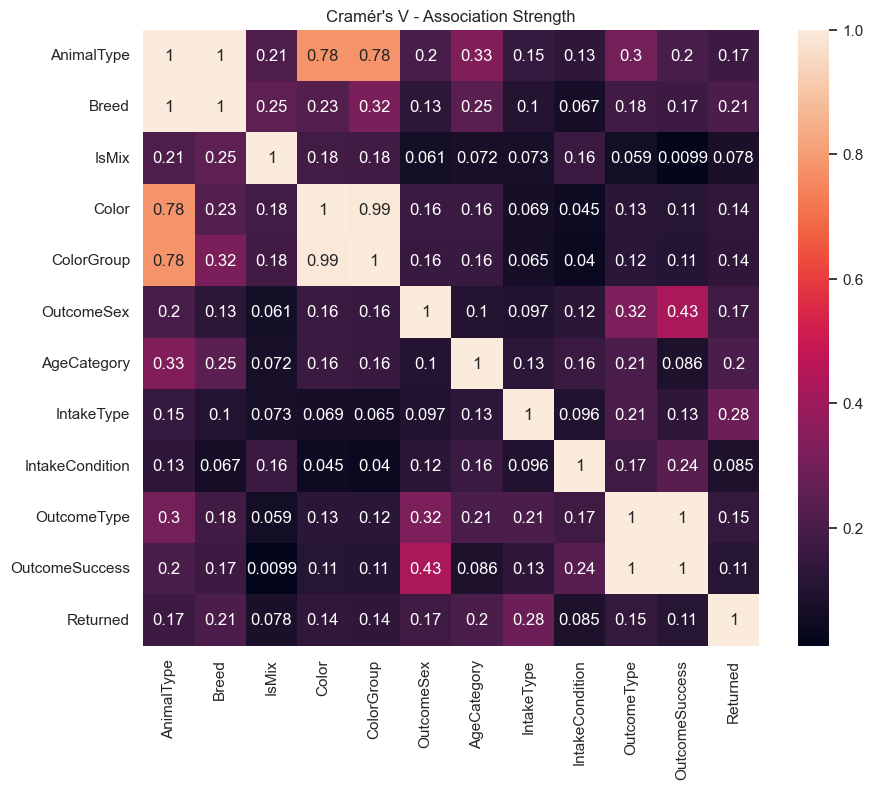

In [196]:
# Plot to examine results more clearly

plt.figure(figsize = (10, 8))
sns.heatmap(v_matrix.astype(float), annot = True, square = True)
plt.title("Cramér's V - Association Strength")
plt.show()

Most of the strong correlations are to be expected: for example, AnimalType and Breed, Color, and ColorGroup. OutcomeSuccess and OutcomeType are perfectly correlated, since the former was directly derived from the latter. 

0.2 - 0.39 Slight:
- **AnimalType & OutcomeSuccess (0.2)** (Outcomes are what we are looking for, after all)
- **AnimalType & OutcomeType (0.3)** (Similar to the above, but a slightly more detailed, and apparently correlated, column)
- AnimalType & AgeCategory (0.33)
- AnimalType & OutcomeSex (0.2)
- AnimalType & IsMix (0.21)
- **Breed & Returned (0.2)** (Which breeds have higher return rates?)
- Breed & AgeCategory (0.21)
- Breed & ColorGroup (0.31)
- Breed & Color (0.24)
- **Breed & IsMix (0.25)** (Maybe adoption trends are different for a given breed because it is more likely to be mixed)
- **OutcomeSex & OutcomeType (0.32)** (How does fixing animals affect adoption?)
- **AgeCategory & Returned (0.2)** (Are young animals returned more often?)
- IntakeType & Returned (0.28)
- **IntakeType & OutcomeType (0.21)** (Does IntakeType affect Outcome?)
- **IntakeCondition & OutcomeSuccess (0.24)** (Similar to above)

0.4 - 0.59 Moderate:
- **OutcomeSex & OutcomeSuccess (0.43)** (Spaying and neutering animals seems to relate to adoptions)

0.6 - 0.79 Strong:
- AnimalType & Color (0.78)
- AnimalType & ColorGroup (0.78)

0.8 - 1 Very Strong:
- AnimalType & Breed (1)
- Color & ColorGroup (0.98)
- OutcomeType and OutcomeSuccess (1)

Those that I want to use and/or look into more are bolded.

The strongest correlations are things which are irrelevant, or simply because the columns are closely related; therefore, I am focusing more on the slightly lower correlations, particularly those in the 0.2-0.4 range. And according to p values, it seems all of these correlations were statistically significant. Some others that I would like to investigate, despite smaller Cramer's V associations, are:
- **Returned & AnimalType**
- **Breed & OutcomeType/Success**
- **Color/ColorGroup & OutcomeType/Success/Returned**
- **AgeCategory & OutcomeType/Success**
- **AgeYears & OutcomeType/Success**

I'll be focusing on categories which were difficult to evaluate with the above graphs, or haven't been evaluated at all (datetimes in particular, to begin).

## Datetimes (IntakeDate and OutcomeDate)

In [197]:
# Using the aacTimes dataset from above

aacTimes['OutcomeMonth'] = aacTimes['OutcomeDT'].dt.to_period('M')  # Grab monthly periods
intake_month_counts = aacTimes.groupby('IntakeMonth').size().reset_index(name = 'Count')

# Merge those columns into the main dataset

aac['IntakeMonth'] = aacTimes['IntakeMonth'].copy()
aac['OutcomeMonth'] = aacTimes['OutcomeMonth'].copy()

In [198]:
# Convert Intake and Outcome datetimes to month strings

intake_months = pd.to_datetime(aac['IntakeDT']).dt.to_period('M').astype(str)
outcome_months = pd.to_datetime(aac['OutcomeDT']).dt.to_period('M').astype(str)

# Create ordered list of valid months

month_order = [f"{y:04d}-{m:02d}" for y in range(2013, 2026) for m in range(1, 13)]

# Assign to DataFrame as ordered categorical

aac['IntakeMonth'] = pd.Categorical(intake_months, categories = month_order, ordered = True)
aac['OutcomeMonth'] = pd.Categorical(outcome_months, categories = month_order, ordered = True)

In [199]:
# Create dropdowns and output
dates_dropdown = widgets.Dropdown(options=['IntakeMonth', 'OutcomeMonth'], description='Dates')
y_dropdown = widgets.Dropdown(options=categorical_columns, description='Variable')
out = widgets.Output()

# Update function, again
def on_change(change):
    with out:
        out.clear_output()
        fig = px.histogram(aac, x=dates_dropdown.value, color=y_dropdown.value, barmode='group')
        fig.update_layout(title=f'{dates_dropdown.value} vs {y_dropdown.value}', bargap=0.2)
        fig.show()

# Attach observers and display
dates_dropdown.observe(on_change, names='value')
y_dropdown.observe(on_change, names='value')
display(widgets.HBox([dates_dropdown, y_dropdown]), out)
on_change(None)  # Show initial plot

Output()

Interesting--while dogs seem to have relatively steady intakes and outcomes throughout the year, cats seem to be cyclical: they are taken in during spring to early summer and adopted (at peak) during mid- to late summer. The other things of note are that dogs massively dominated intake and outcomes from 2013-2020, but after 2020, cats seem to have taken over somewhat (not by as large a margin, but they have become--cyclically--the dominant intake and adoption). I believe this is because as dog numbers stayed low after Covid, cat numbers (while also lower) retained their cycle, and have more extreme spikes than dogs seem to. 

## AgeYears

In [200]:
# Create dropdown and output, as usual
color_dropdown = widgets.Dropdown(options = categorical_columns, description = 'Variable')
out = widgets.Output()

# Update function, as usual
def on_change(change):
    with out:
        out.clear_output()
        fig = px.histogram(aac, x = 'AgeYears', color = color_dropdown.value, barmode = 'group')
        fig.update_layout(title = f'Age in Years vs {color_dropdown.value}', bargap = 0.2)
        fig.show()

# Attach observer and display
color_dropdown.observe(on_change, names = 'value')
display(widgets.HBox([color_dropdown]), out)
on_change(None)  # Show initial plot

Output()

Something I'd noticed earlier is confirmed here--there are far more very young cats than dogs. Most of the dogs are around the ages 0-2, whereas the large majority of cats are 0 years old (rounded to the nearest integer). In general, there are more young animals than adults and seniors as well. The other main thing of interest is that animals aged 1-2 were returned most often, despite there being fewer of them adopted out compared to very young animals. There also is a higher rate of "Return to Owner" outcomes involved with those ages--apparently people lose young animals much more frequently!

Otherwise, though there are significantly more young animals in general, the variables often follow the same general trends and don't appear to show much variation. However, I want to look at percentages to confirm or deny this.

In [201]:
# Create a function to prevent repetition and use now and later

def get_pcts(df, group_col, target_col):
    """
    Calculate percentage distribution of target values within groups.
    Groups data by a specified column and calculates the distribution
    of values in the target column as percentages within each group.
    
    Params:
        df (pandas.DataFrame): The input DataFrame containing the data to analyze.
        group_col (str): The name of the column to group by.
        target_col (str): The name of the column whose value distribution to calculate within each group.
        
    Returns:
    pandas.DataFrame:
        A DataFrame with group_col values as index and target_col unique values
        as columns. 
        Each cell contains the percentage of that target value 
        within the corresponding group.
        
    Notes:
        The function handles categorical and numeric data types for both columns
    """
    return df.groupby(group_col)[target_col].value_counts(normalize = True).unstack(fill_value = 0) * 100

In [202]:
# Create a dictionary of percentages using above function

age_pcts = {var: get_pcts(aac, 'AgeYears', var) for var in categorical_columns}

# And our list of columns to evaluate--fewer than before

cols_for_age = ['AnimalType', 'OutcomeType', 'OutcomeSuccess', 'IntakeType', 'IntakeCondition', 'Returned']

In [203]:
# And then we graph those

# Create dropdown and output
color_dropdown = widgets.Dropdown(options = cols_for_age, description = 'Variable')
out = widgets.Output()

# Update function
def on_change(change):
    with out:
        out.clear_output()
        age_pct_df = age_pcts[color_dropdown.value].loc[aac['AgeYears'].value_counts().index].reset_index()
        age_melted = age_pct_df.melt(
            id_vars = ['AgeYears'], 
            var_name = color_dropdown.value, 
            value_name = 'Percentage'
        )
        fig = px.bar(
            age_melted, 
            x = 'AgeYears', 
            y = 'Percentage',
            color = color_dropdown.value,
            title = f'Age (in Years) vs {color_dropdown.value} (%)',
            barmode = 'group',
            labels = {'value': 'Percentage', 'variable': color_dropdown.value}
        )
        fig.update_layout(bargap=0.2)
        fig.update_xaxes(dtick=1)
        fig.show()

# Attach observer and display
color_dropdown.observe(on_change, names='value')
display(widgets.HBox([color_dropdown]), out)
on_change(None)  # Show initial plot

Output()

This is much more revealing. I'll go through them one by one.

After year 0, the percentage of dogs in the shelter remains roughly the same, decreasing a bit in the later years; however, cats spike in year 0, then fall drastically and slowly grow as age increases.

Adoptions pretty steadily fall as animals age, but returns to owners steadily increase. Transfers decline slightly as animals get older, but not as significantly. Euthanasias increase steadily as age increases as well.

Outcome successes remain somewhat steady, although negative outcomes increase some as age increases, and other outcomes decrease a little bit as age increases (as animals are transferred less, and as euthanasias become more common due to age).

IntakeTypes are interesting, because some of them seem to slightly follow a bell curve. Strays remain somewhat steady. Owner Surrenders peak around age 9-11, decreasing as ages decrease and increase. Euthanasia requests increase as age does, starting around age 9.

As age increases, the percentage of "Normal" condition intakes decreases. Instead, "Aged" and "Sick" intakes increase. The most significant "Medical" intakes are around ages 18-20. Injured numbers remain relatively steady.

The percentage of animals returning to the shelter is significant through ages 1-11, and after it falls steadily but slowly. 

## Breed

This one is difficult to graph, since there are about a hundred breeds in the final dataset. For graphing purposes, I'm going to separate dog and cat breeds and limit the number that we are evaluating at the moment, using the top_15_dogs/cats datasets we created earlier.

### Cats

In [204]:
# Setting aside the columns I want to use

cols_for_breed = ['Returned', 'IsMix', 'OutcomeType', 'OutcomeSuccess'] 

In [205]:
# Now to graph--let's start with the cats

# Create dropdown and output--using just a few columns (the ones I feel most likely to be significant)
color_dropdown = widgets.Dropdown(options=['Returned', 'IsMix', 'OutcomeType', 'OutcomeSuccess'], description='Variable')
out = widgets.Output()

# Update function, using the cat_aac dataframe from earlier (there are fewer than 15 cat breeds anyway)
def on_change(change):
    with out:
        out.clear_output()
        fig = px.histogram(cat_aac, x = 'Breed', color = color_dropdown.value, barmode = 'group')
        fig.update_layout(title = f'Cat Breed vs {color_dropdown.value}', bargap = 0.2)
        fig.show()

# Attach observer and display
color_dropdown.observe(on_change, names = 'value')
display(widgets.HBox([color_dropdown]), out)
on_change(None)  # Show initial plot

Output()

From this, there's not a ton that stands out to me. Most animals are mixes, most outcomes are positive (specifically adoptions), and the large majority of animals are not returned to the shelter after adoption. Since Domestic Shorthairs dominate the cat breed numbers so massively, it is hard to glean any significant insights regarding the other breeds. Hopefully the dogs are more revealing! I have one more approach to use, though: let's look at percentages of each breed versus these columns, instead of raw numbers.

In [206]:
# Create a dictionary of percentages using get_pcts function from earlier (Age category)

cat_breed_pcts = {var: get_pcts(cat_aac, 'Breed', var) for var in cols_for_breed}

# Get a list of those cat breeds

cat_breeds_list = cat_aac['Breed'].value_counts().index

In [207]:
# Now graph those, instead

# Create dropdown and output
y_dropdown = widgets.Dropdown(options = cols_for_breed, description = 'Variable')
out = widgets.Output()

# Update function
def on_change(change):
    with out:
        out.clear_output()
        breed_pct_df = cat_breed_pcts[y_dropdown.value].loc[cat_breeds_list].reset_index()
        y_cols = [col for col in breed_pct_df.columns if col != 'Breed']

        # Create plot
        fig = px.bar(
            breed_pct_df, x='Breed', y = y_cols,
            title = f'Top 15 Cat Breeds vs {y_dropdown.value} (%)',
            barmode = 'group',
            labels = {'value': 'Percentage', 'variable': y_dropdown.value}
        )
        fig.update_layout(bargap = 0.2)
        fig.update_xaxes(tickangle = 45)
        fig.show()

# Attach observer and display
y_dropdown.observe(on_change, names = 'value')
display(widgets.HBox([y_dropdown]), out)
on_change(None)  # Show initial plot

Output()

This is indeed a bit easier to parse; with cats, though, other than fairly unique breeds lke Manx, Maine Coon, and Ragdoll, I'm not sure that cat breeds are identified distinctly enough for this to be of significant use. Still, it is helpful to know. The main curious notes are that American Shorthairs (likely also Domestic Shorthairs misidentified) are actually transferred more often than they are adopted, and Maine Coon cats seem to be adopted at a higher rate versus transfer, compared to other breeds. "Other" cats and Maine Coons do seem to have higher "Return to Owner" rates, though. Other cats also seem to return more often, but they have one of the highest positive outcome rates, along with Maine Coons. American Shorthairs have almost equivalent Positive to Neutral outcomes, unlike any of the others.

### Dogs

In [208]:
# Now for the dogs

# Dropdowns for categorical variable
y_dropdown = widgets.Dropdown(options = cols_for_breed, description = 'Variable')
# Output widget for the plot
out = widgets.Output()

# Update function
def update_plot(change = None):
    with out:
        out.clear_output()
        fig = px.histogram(top_15_dogs, x = 'Breed', color = y_dropdown.value, barmode = 'group')
        fig.update_layout(title = f'Dog Breed vs {y_dropdown.value}', bargap = 0.2)
        fig.show()

# Attach listeners
y_dropdown.observe(update_plot, names = 'value')

# Display widgets and initial plot
display(widgets.HBox([y_dropdown]), out)
update_plot()

Output()

In [209]:
# Create a dictionary of percentages again, but for dogs

dog_breed_pcts = {var: get_pcts(top_15_dogs, 'Breed', var) for var in cols_for_breed}

# Get a list of those cat breeds

dog_breeds_list = top_15_dogs['Breed'].value_counts().index

In [210]:
# And percentages, as before

# Dropdowns for categorical variable
y_dropdown = widgets.Dropdown(options=cols_for_breed, description='Variable')
# Output widget for the plot
out = widgets.Output()

def update_plot(change = None):
    with out:
        out.clear_output()
        breed_pct_df = dog_breed_pcts[y_dropdown.value].loc[dog_breeds_list].reset_index()
        y_cols = [col for col in breed_pct_df.columns if col != 'Breed']
        
        fig = px.bar(
            breed_pct_df, 
            x='Breed', 
            y=y_cols,
            title=f'Top 15 Dog Breeds vs {y_dropdown.value} (%)',
            barmode='group',  # Side-by-side bars instead of stacked
            labels={'value': 'Percentage', 'variable': y_dropdown.value}
        )
        fig.update_layout(bargap=0.2)
        fig.update_xaxes(tickangle=45)
        fig.show()

# Attach listener
y_dropdown.observe(update_plot, names='value')
# Display widgets and initial plot
display(widgets.HBox([y_dropdown]), out)
update_plot()

Output()

Again, this is a little better. Siberian Huskies seem to be the least mixed-breed, whereas all other breeds are pretty significantly mixed. Labs, German Shepherds, Cattle Dogs, Huskies, Border Collies, and Catahoulas seem to be the most adopted; Pit Bulls, Huskies, Boxers, Beagles, and (strangely) Mini Poodles seem to be the most commonly Returned to Owners. Pit Bulls definitely have the highest euthanasia rate, by a decent margin. Huskies seem to have the best luck getting a positive outcome, followed by German Shepherds, Border Collies, and Catahoula Leopard dogs.

What this tells me is that there are indeed differences that seem to be related by breed, though they are smaller than I would have expected.

## Color/ColorGroup

In [211]:
# I need to separate cats and dogs again, for this one

aac_cats = aac.loc[aac['AnimalType'] == 'Cat', :]
aac_dogs = aac.loc[aac['AnimalType'] == 'Dog', :]

# Separate columns to evaluate alongside color--not many of these are very useful

cols_for_color = ['OutcomeType', 'OutcomeSuccess']

### Cats

In [212]:
# Dropdowns for date and categorical variable
x_dropdown = widgets.Dropdown(options = ['Color', 'ColorGroup'], description = 'Color:')
color_dropdown = widgets.Dropdown(options = cols_for_color, description = 'Outcome:')
# Output widget for the plot
out = widgets.Output()

# Update function
def update_plot(change):
    with out:
        out.clear_output()
        fig = px.histogram(aac_cats, x = x_dropdown.value, color = color_dropdown.value, barmode = 'group')
        fig.update_layout(
            title=f'{x_dropdown.value} by {color_dropdown.value}'
        )
        fig.show()

# Attach listeners
x_dropdown.observe(update_plot, names = 'value')
color_dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([x_dropdown, color_dropdown]), out)
update_plot(None)

Output()

Past efforts have shown that percentage graphs can be more useful than figures of the raw numbers, and I believe this is one such case. I do also suspect the "Color" column will be generally less helpful, since it has a higher dimensionality and more colors with very few entries. I believe I may end up excluding it from the model.

In [213]:
# Create a dictionary of percentages, using my get_pcts function again from earlier

cat_color_pcts = {var: get_pcts(aac_cats, 'ColorGroup', var) for var in cols_for_color}

# Get a list of those cat colors

cat_color_list = aac_cats['ColorGroup'].value_counts().index

In [214]:
# Dropdowns for categorical variable
y_dropdown = widgets.Dropdown(options = cols_for_color, description = 'Outcome')
# Output widget for the plot
out = widgets.Output()

def update_plot(change):
    with out:
        out.clear_output()
        color_pct_df = cat_color_pcts[y_dropdown.value].loc[cat_color_list].reset_index()
        y_cols = [col for col in color_pct_df.columns if col != 'ColorGroup']
        
        fig = px.bar(
            color_pct_df, 
            x='ColorGroup', 
            y=y_cols,
            title=f'Color Groups vs {y_dropdown.value} (%)',
            barmode='group',  # Side-by-side bars instead of stacked
            labels={'value': 'Percentage', 'variable': y_dropdown.value}
        )
        fig.update_layout(bargap=0.2)
        fig.update_xaxes(tickangle=45)
        fig.show()

# Attach listener
y_dropdown.observe(update_plot, names='value')
# Display widgets and initial plot
display(widgets.HBox([y_dropdown]), out)
update_plot(None)

Output()

This is still a lot of categories to show in one graph, but it is definitely better than using the full Color column. There are a couple of notable differences: orange cats (not orange tabbies, though) are adopted far less often, and are actually transferred more often than aduopted. Black tabbies (but not fully black cats) and tan cats are also less likely to be adopted compared to other colors. Tan, mottled, and orange cats also have the highest likelyhood of a death outcome, as well as euthanasia (joined by brown cats). Corroborating this, it seems orange cats are the only color more likely to receive a neutral outcome than a positive one, and also have one of the highest percentages of negative outcomes (along with, again, brown, tan, and mottled cats).

### Dogs

First, a graph of raw data.

In [215]:
# Dropdowns for date and categorical variable
x_dropdown = widgets.Dropdown(options = ['Color', 'ColorGroup'], description = 'Color:')
color_dropdown = widgets.Dropdown(options = cols_for_color, description = 'Outcome:')
# Output widget for the plot
out = widgets.Output()

# Update function
def update_plot(change = None):
    with out:
        out.clear_output()
        fig = px.histogram(aac_dogs, x = x_dropdown.value, color = color_dropdown.value, barmode = 'group')
        fig.update_layout(title=f'{x_dropdown.value} by {color_dropdown.value}')
        fig.show()

# Attach listeners
x_dropdown.observe(update_plot, names = 'value')
color_dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([x_dropdown, color_dropdown]), out)
update_plot()

Output()

Once again, ColorGroup comes to the rescue here (that column was a good decision, indeed). It's hard to tell very much from this graph, given the discrepancy between some colors and their raw numbers. I'll look into percentages.

In [216]:
# Getting those percentages again

dog_color_pcts = {var: get_pcts(aac_dogs, 'ColorGroup', var) for var in cols_for_color}

# Get a list of those cat breeds

dog_color_list = aac_dogs['ColorGroup'].value_counts().index

In [217]:
# Dropdowns for categorical variable
y_dropdown = widgets.Dropdown(options = cols_for_color, description = 'Outcome')
# Output widget for the plot
out = widgets.Output()

def update_plot(change = None):
    with out:
        out.clear_output()
        color_pct_df = dog_color_pcts[y_dropdown.value].loc[dog_color_list].reset_index()
        y_cols = [col for col in color_pct_df.columns if col != 'ColorGroup']
        
        fig = px.bar(
            color_pct_df, 
            x = 'ColorGroup', 
            y = y_cols,
            title = f'Color Groups vs {y_dropdown.value} (%)',
            barmode = 'group',  # Side-by-side bars instead of stacked
            labels = {'value': 'Percentage', 'variable': y_dropdown.value}
        )
        fig.update_layout(bargap = 0.2)
        fig.update_xaxes(tickangle = 45)
        fig.show()

# Attach listener
y_dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([y_dropdown]), out)
update_plot()

Output()

Much easier to read!. The colors here show a bit less inequality. In fact, the only OutcomeType of particular note is that sable animals seem to have a higher rate of transfer than returns to owners, unlike all other colors. Looking at OutcomeSuccess, colors seem quite equal! Gray animals have a slightly higher rate of negative outcomes than others, but not by a significant margin (looking at this graph). 

## OutcomeType/OutcomeSuccess

To summarize all these and re-centralize them around our main goal, I will do graphs for each category I consider most relevant versus outcome types and success. I will have to do VisitLength and AgeCategory separately, since they are not categorical columns. I will leave the datetime columns as above.

In [218]:
# Select some columns

outcome_vars = ['IsMix', 'Sex', 'OutcomeSex', 'AgeCategory', 'IntakeType', 'IntakeCondition']
outcome_nvars = ['VisitDays', 'AgeYears']

In [219]:
# First, graphs of the raw numbers

# Create dropdowns
x_dropdown = widgets.Dropdown(options = ['OutcomeType', 'OutcomeSuccess'], description = 'Outcome:')
color_dropdown = widgets.Dropdown(options = outcome_vars, description = 'Variable:')
# Output widget for the plot
out = widgets.Output()

# Function to update the plot
def update_plot(change = None):
    with out:
        out.clear_output()
        fig = px.histogram(aac, x = x_dropdown.value, color = color_dropdown.value, barmode = 'group')
        fig.update_layout(title = f'{x_dropdown.value} vs {color_dropdown.value}', bargap = 0.2)
        fig.show()

# Attach listeners
x_dropdown.observe(update_plot, names = 'value')
color_dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([x_dropdown, color_dropdown]), out)
update_plot()

Output()

It's difficult to tell with raw counts, but the things I gather from this are as follows. I suspect it is shelter policy to only adopt out spayed and neutered animals, so most intact animals have seen outcomes such as transfer, or negative outcomes. A higher proportion of animals that are returned to owners are young (compared to other outcome types). Animals which are returned to owners are often public assists (again, as compared to other intake types). I believe transfers have a higher proportion of animals coming in injured, nursing, and sick than the other outcomes. 

I'm not convinced OutcomeSuccess provides enough information to be useful, so I am going to simplify and stick with OutcomeType.

In [220]:
# Dropdowns for date and categorical variable
dropdown = widgets.Dropdown(options = outcome_nvars, description = 'Variable')
# Output widget for the plot
out = widgets.Output()

# Update function
def update_plot(change = None):
    with out:
        out.clear_output()
        fig = px.histogram(aac, x = dropdown.value, color = 'OutcomeType', barmode = 'group')
        fig.update_layout(title = f'{dropdown.value} by OutcomeType', 
                          bargap = 0.2,
                          xaxis=dict(range=[0, 20])  # Limit the x-axis for ease of reading
                         )
        fig.show()

# Attach listeners
dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([dropdown]), out)
update_plot()

Output()

Since this one includes so many days (VisitDays), it is somewhat difficult to read. I did find that numbers only declined, at a very small rate, after 20 or so days, so I limited the graph to that for readability purposes (this also was a convenient number for the age graph). The main interesting points are that animals at the shelter for 0-3 days experience a range of outcomes, beginning with transfer and followed by owner returns. Adoptions are relatively rare until day 4, when they spike dramatically. After that, the number of adoptions falls with each day, but it and the other outcome types do follow similar trends.

Adoptions dominate almost every age range, with owner returns (seemingly) growing in proportion as ages increase. Since the number of animals dwindles as age increases, this graph is difficult to read beyond a few years.

And now, let's look at percentages. I'm going to stick with OutcomeType, since I think it just provides a good amount of information compared to OutcomeSuccess.

In [221]:
# Create a dictionary of percentages

# var_cols = ['Returned', 'IsMix', 'OutcomeType', 'OutcomeSuccess'] 
out_pcts = {var: get_pcts(aac, 'OutcomeType', var) for var in outcome_vars}

# Get a list of those cat breeds

out_list = aac['OutcomeType'].value_counts().index

In [222]:
# Dropdowns for categorical variable
dropdown = widgets.Dropdown(options = outcome_vars, description = 'Variable')
# Output widget for the plot
out = widgets.Output()

def update_plot(change = None):
    with out:
        out.clear_output()
        out_pct_df = out_pcts[dropdown.value].loc[out_list].reset_index()
        y_cols = [col for col in out_pct_df.columns if col != 'OutcomeType']
        
        fig = px.bar(
            out_pct_df, 
            x = 'OutcomeType', 
            y = y_cols,
            title = f'Outcome Type vs {dropdown.value} (by %)',
            barmode = 'group',  # Side-by-side bars instead of stacked
            labels = {'value': 'Percentage', 'variable': dropdown.value}
        )
        fig.update_layout(bargap = 0.2)
        fig.update_xaxes(tickangle = 45)
        fig.show()

# Attach listener
dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([dropdown]), out)
update_plot()

Output()

It seems, again, like the shelter's policy is only adopting out fixed animals (except in seemingly rare cases). Otherwise, a couple of sexes have interesting outcome percentages. Intact females are the most transferred, followed by intact males--supposedly, the shelter did not have enough resources to fix these animals, so sent them somewhere else for management. Neutered male animals were the most returned to owners (do males escape more often?), followed by spayed females. This is likely due to the fact that most people fix their animals, so most of the animals that are returned are therefore fixed. Euthanasia and death follow the same trend, to slightly different degrees. Capping both are intact males, followed by intact females. After that, fixed males and females follow accordingly. I suspect if the animals received this outcome, there was simply no need or ability for the shelter to neuter or spay them. 

Dominating all but two outcome types are infant animals, by far making up the most deaths (this could also account for the relatively high number of intact animals in that category), and to some lesser degree, adoptions and transfers. Euthanasias are roughly equal, with a slightly higher percentage of young animals. Animals returned to owner are most often young or adult animals. Overall, after infant animals, young animals constitute the highest percentage of outcomes.

By far, most intakes are strays, across all categories. Secondarily in almost every category are owner surrenders, with returns to owner instead being often public assists (public assists are common for owner returns and euthanasias, but rare in other cases). Relatively few euthanasias are actually by request, but I suspect there are simply very few cases of that. 

Animals are most often in normal condition upon intake. In fact, injured and sick animals are only common in euthanasia and death cases. The other intake conditions are relatively rare across the board.


Now we look at those numerical variables again.

In [223]:
# Dropdowns for numerical variable
y_dropdown = widgets.Dropdown(options = outcome_nvars, description = 'Variable')
# Output widget for the plot
out = widgets.Output()

def update_plot(change = None):
    with out:
        out.clear_output()
        
        # Create box plot for numerical data
        fig = px.box(
            aac, 
            x = 'OutcomeType', 
            y = y_dropdown.value,
            title = f'Distribution of {y_dropdown.value} by Outcome Type',
            labels = {y_dropdown.value: y_dropdown.value, 'OutcomeType': 'Outcome Type'}
        )
        
        # Set different y-axis limits based on the variable
        if y_dropdown.value == 'AgeYears':
            fig.update_yaxes(range = [0, 20])  # Limit AgeYears to 0-10
            fig.update_layout(height = 500)  # Change height for readability
        elif y_dropdown.value == 'VisitDays':
            fig.update_yaxes(range = [0, 50])  # Limit VisitDays to 50
            fig.update_layout(height = 600)  # Change height for readability
        
        fig.update_layout(bargap=0.2)
        fig.update_xaxes(tickangle=45)
        fig.show()

# Attach listener
y_dropdown.observe(update_plot, names='value')
# Display widgets and initial plot
display(widgets.HBox([y_dropdown]), out)
update_plot()

Output()

The graph of VisitDays has values extending into the hundreds, so I had to limit to y-axis for readability. However, this gets us the most important details. It seems owner returns are most likely to occur within a week, and become less common after that. Euthanasias usually occur within 8 days or so, and become rarer as time passes. Transfers have a slightly longer typical time range, and deaths even more so. However, adoption is most likely to occur between 5 and 45 or so days, which is a far greater range than the others. The maximum number of days an animal has stayed is near 2,000, but the median is 14--2 weeks. 

It shows in this graph that most animals taken in are young. Most deaths are infant or very young animals, though euthanasias are more likely to be older animals than any other outcome. Transferred and adopted animals seem to be largely the same age, and owner returns typically are a bit older.

## Visit Length

In [224]:
# Useful columns for these graphs

cols_for_visit = ['AnimalType', 'IsMix', 'OutcomeSex', 'Sex', 'AgeCategory', 'IntakeType', 'IntakeCondition', 
                  'OutcomeType', 'OutcomeSuccess', 'Returned', 'IntakeMonth', 'OutcomeMonth']

In [225]:
# Dropdowns
x_dropdown = widgets.Dropdown(options = cols_for_visit, description = 'X Axis:')
y_dropdown = widgets.Dropdown(options = ['VisitDays', 'VisitYears'], description = 'Visit Length')
# Output widget for the plot
out = widgets.Output()

# Update function
def update_plot(change):
    with out:
        out.clear_output()
        
        # Create box plot for numerical data
        fig = px.box(
            aac, 
            x = x_dropdown.value, 
            y = y_dropdown.value,
            title = f'{x_dropdown.value} vs Visit Length ({y_dropdown.value})',
            # labels={y_dropdown.value: y_dropdown.value, 'OutcomeType': 'Outcome Type'}
        )
        
        # Set different y-axis limits based on the variable
        if y_dropdown.value == 'VisitDays':
            fig.update_yaxes(range=[0, 50])  # Limit VisitDays to 50
            fig.update_layout(height = 500)
        elif y_dropdown.value == 'VisitYears':
            fig.update_yaxes(range = [0, 0.25])  # Limit years to 0.25 (about 3 months)
            fig.update_layout(height = 600)        
        # fig.update_xaxes(tickangle=45)
        fig.show()

# Attach listener
x_dropdown.observe(update_plot, names = 'value')
y_dropdown.observe(update_plot, names = 'value')
# Display widgets and initial plot
display(widgets.HBox([x_dropdown, y_dropdown]), out)
update_plot(None)

Output()

Overall, cats seem to have a longer stay time than dogs do. Their median stay is not that much higher than the median for dogs (nearly 9 compared to 6), but their third quartile is much higher than that of the dogs. It seems their stays range much more; whereas dog stays typically stick between 3 to 15 days, cats range anywhere from 3 to 34. 

Surprisingly to me, it seems that mixed-breeds actually have (on average) a shorter shelter stay time, whereas the length of stay of purebred animals ranges more widely. I am going to disclaim that since the very large majority of cats are just labeled "Domestic Shorthair," this may be the result of many "purebred" animals just happening to be cats. The medians of these are very similar, however.

As far as sexes go, intact animals appear to have much shorter average stays. Most of these pets are transferred out of the shelter, which could be why. Neutered and spayed animals do seem to have longer stays overall; I wonder whether this is because of the surgery itself. Scheduling, enacting, and recovering from surgery all could take time before the animal is able to leave. Male and female animals seem to have very even stay times, it seems (corroborated by the "Sex" column). 

Infants appear to have the greatest range of stay lengths, although their median stay is relatively even with other categories. Seniors seem to have the shortest stays overall, which is likely because many of these animals are owner returns or euthanasias. 

The intake types that stand out to me are public assists and euthanasia requests. Public assists have the second-shortest stay lengths (judging by quartiles), but not median--the median stay of strays is shorter, interestingly. Public assists correspond mostly to owner returns, which do appear to have shorter stay times, though, so this makes sense. Euthanasia requests tend to have the shortest stays by a fairly wide margin, with the median being a couple of hours and the third quartile being just over a day. There are outliers, of course, and a relatively smaller number of euthanasia requests compared to other categories, but there is a large difference in stay times between it and the other intake categories.

As far as intake conditions, I will take "Normal" intakes as the baseline, since the vast majority of intakes are in normal condition. Compared to that, the median stays of injured, nursing, "other", feral, and medical intakes are roughly equivalent. Animals who were sick, pregnant, aged, and neonatal had variably lower stay medians, with neonatal animals having the shortest median by far (but one of the greatest interquartile ranges). Behavioral intakes had the highest stay median by a significant margin. Nursing animals have the greatest interquartile range, extending past 50 days. 

Most outcome types actually seem to be on the shorter side generally; adoption is the one with the largest range and longest stay time, actually. This makes sense--a large part of a shelter's job is getting animals adopted, so it makes sense that it takes more time. This does make certain aspects of management important, to move animals through the shelter as quickly as possible. Reducing adoption times is critical to the efficient running of a shelter. Going along with this, it seems that in general, positive outcomes take longer than neutral or negative ones (which seem roughly even).

Animals which have returned to the shelter seem to generally have a shorter (second or beyond) stay than animals who are there for the first time. Animals experiencing their first visit also have a slightly greater range of stay times compared to animals returning. I suspect that the animals who have returned are often returned to owners, which would align with a shorter stay time as well.

The graphs of intake and outcome months are pretty hectic and difficult to read, but do seem to follow the seasonality trends seen earlier.

# Target Variable Selection

In [226]:
# Let's look at our final columns

aac.columns

Index(['AnimalType', 'Breed', 'IsMix', 'Color', 'ColorGroup', 'Sex',
       'OutcomeSex', 'AgeYears', 'AgeCategory', 'IntakeType',
       'IntakeCondition', 'IntakeDT', 'VisitLength', 'VisitYears', 'OutcomeDT',
       'OutcomeType', 'OutcomeSuccess', 'Returned', 'VisitDays', 'IntakeMonth',
       'OutcomeMonth'],
      dtype='object')

My target variables will be **OutcomeType** and **VisitLength** (likely in the form of **VisitDays**, although I must keep in mind the very high degree of skewedness of that column). OutcomeType does not have an exorbidant number of categories but maintains a solid base of information, and visit length is the second important thing to be able to predict, for shelter expediency.

Of the rest, from my investigation above, I believe the most worthwhile columns to include are **AnimalType, Breed, ColorGroup,** and **AgeYears** (unfortunately our only numerical "y" column, which can therefore be replaced if needed to lesser effect with **AgeCategory**).  
'IsMix' does not have enough information on its own or show enough significant differences to earn its place (likely because of the breed differences between dogs and cats). 'Color' simply has too many entries, and 'ColorGroup' covers the same thing well enough. Oddly to me, 'Sex' did not seem to have nearly as much influence on adoption trends as I expected, and 'OutcomeSex' appears to be more a result of outcome than a cause. 'IntakeType' and 'IntakeCondition' did not seem to have a hugely significant effect, so I leave them out to reduce dimensionality. The datetime columns ('IntakeDT', 'OutcomeDT', 'IntakeMonth', and 'OutcomeMonth') were more an indicator of when the shelter would be busy than adoptions (although we did see a spike each summer), and I fear would be a difficult extra category for my model to handle. 'OutcomeSuccess' did not have enough information or detail to be a target variable, and 'Returned' did not have enough information or influence to make the lineup, either. The other categories can be removed, for the final dataset before creating the model.

In [227]:
# The dataset that will be used going into modeling

aac_final = aac[['OutcomeType', 'VisitLength', 'VisitDays', 'AnimalType', 'Breed', 'ColorGroup', 'AgeYears', 'AgeCategory']].reset_index(drop = True)

# Save it

aac_final.to_csv('../Data/Final/aac_final.csv', index = False)

# Also saving the full dataset, since I have made alterations here

aac.to_csv('../Data/Final/aac_full_final.csv', index = False)

In [228]:
# Check out the final, limited dataset

aac_final.head()

,OutcomeType,VisitLength,VisitDays,AnimalType,Breed,ColorGroup,AgeYears,AgeCategory
0,Return to Owner,0 days 07:48:00,0.325000,Dog,Border Terrier,White,7,Adult
1,Transfer,0 days 02:06:00,0.087500,Cat,Domestic Shorthair,Orange,0,Infant
2,Transfer,0 days 02:11:00,0.090972,Cat,Domestic Shorthair,Orange,0,Infant
3,Transfer,0 days 02:11:00,0.090972,Cat,Domestic Shorthair,Orange,0,Infant
4,Euthanasia,0 days 06:40:00,0.277778,Dog,American Pit Bull Terrier,Gray,3,Adult


I do also want to check the final categories in each column, to make sure it is ready to be modeled. (VisitLength and VisitDays are an exception, since they are continuous variables, and AgeYears contains integers.) 

In [229]:
print(aac_final['OutcomeType'].value_counts())

OutcomeType
Adoption           82235
Transfer           46488
Return to Owner    26608
Euthanasia          4912
Died                1361
Name: count, dtype: int64


In [230]:
print(aac_final['AnimalType'].value_counts())

AnimalType
Dog    93429
Cat    68175
Name: count, dtype: int64


In [231]:
print(aac_final['Breed'].value_counts())

Breed
Domestic Shorthair           56852
American Pit Bull Terrier    14970
Labrador Retriever           13362
Chihuahua                    10866
German Shepherd               6928
                             ...  
Borzoi                           1
Scottish Deerhound               1
Ocicat                           1
Savannah                         1
Tosa                             1
Name: count, Length: 238, dtype: int64


I do believe that each of those categories does have enough entries to be model-able, although I am tempted to cut breeds with fewer than 100 entries, based on how well the model performs.

In [232]:
print(aac_final['ColorGroup'].value_counts())

ColorGroup
Black             22361
Black/White       21716
White             17924
Brown Tabby       16103
Brown             15320
Tan               14789
Gray               9741
Orange Tabby       7611
Brindle/Ticked     5830
Gray Tabby         4984
Tricolor           3881
Red                3727
Tortoiseshell      3357
Calico             3234
Point              2932
Torbie             2583
White Tabby        1854
Merle              1230
Sable              1187
Orange              452
Black Tabby         384
Smokey              302
Mottled             102
Name: count, dtype: int64


In [233]:
print(aac_final['AgeCategory'].value_counts())

AgeCategory
Infant    75090
Young     49009
Adult     26398
Senior    11107
Name: count, dtype: int64


Looks great!

# Insights & Next Steps

Shelter suggestions:

* Set list of dog breeds/cat breeds/etc to choose from
* Primary breed, secondary breed columns/mix column
* Color standardization

Up next:
* Pre-processing and modeling!